In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns 

# Loding data

In [2]:

feature_data = pd.read_csv("C:/Users/usrva/OneDrive/Desktop/Projects/Retail_Sales_Prediction/Features_data_set.csv")
sales_data = pd.read_csv("C:/Users/usrva/OneDrive/Desktop/Projects/Retail_Sales_Prediction/sales_data_set.csv")
stores_data = pd.read_csv("C:/Users/usrva/OneDrive/Desktop/Projects/Retail_Sales_Prediction/stores_data_set.csv")

# Merging df

In [3]:
feature_data.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05-02-2010        42.31       2.572        NaN        NaN   
1      1  12-02-2010        38.51       2.548        NaN        NaN   
2      1  19-02-2010        39.93       2.514        NaN        NaN   
3      1  26-02-2010        46.63       2.561        NaN        NaN   
4      1  05-03-2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [4]:
feature_data.shape

(8190, 12)

In [5]:
feature_data.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [6]:
feature_data.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [7]:
sales_data.head(200)

Store  Dept        Date  Weekly_Sales  IsHoliday
0        1     1  05/02/2010      24924.50      False
1        1     1  12/02/2010      46039.49       True
2        1     1  19/02/2010      41595.55      False
3        1     1  26/02/2010      19403.54      False
4        1     1  05/03/2010      21827.90      False
..     ...   ...         ...           ...        ...
195      1     2  04/02/2011      46829.12      False
196      1     2  11/02/2011      47595.35       True
197      1     2  18/02/2011      49202.06      False
198      1     2  25/02/2011      46165.25      False
199      1     2  04/03/2011      53035.54      False

[200 rows x 5 columns]

In [8]:
sales_data.shape

(421570, 5)

In [9]:
sales_data.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [10]:
sales_data["Date"] = pd.to_datetime(sales_data["Date"], format='mixed')

In [11]:
sales_data.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
dtype: object

In [12]:
sales_data.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [13]:
stores_data.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [14]:
stores_data.shape

(45, 3)

In [15]:
stores_data.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [16]:
final = pd.merge(feature_data, stores_data, on='Store', how='inner')

In [17]:
final.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  05-02-2010        42.31       2.572        NaN        NaN   
1      1  12-02-2010        38.51       2.548        NaN        NaN   
2      1  19-02-2010        39.93       2.514        NaN        NaN   
3      1  26-02-2010        46.63       2.561        NaN        NaN   
4      1  05-03-2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday Type  \
0        NaN        NaN        NaN  211.096358         8.106      False    A   
1        NaN        NaN        NaN  211.242170         8.106       True    A   
2        NaN        NaN        NaN  211.289143         8.106      False    A   
3        NaN        NaN        NaN  211.319643         8.106      False    A   
4        NaN        NaN        NaN  211.350143         8.106      False    A   

     Size  
0  151315  
1  151315  
2  151315  
3  151315  
4  151315

In [18]:
final.shape

(8190, 14)

In [19]:
final.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
Type             object
Size              int64
dtype: object

In [20]:
final["Date"] = pd.to_datetime(final["Date"], format='mixed')

In [21]:
final.dtypes

Store                    int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
Type                    object
Size                     int64
dtype: object

In [22]:
final.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Type               0
Size               0
dtype: int64

In [23]:
final_one = pd.merge(sales_data, final, on=['Store', 'Date'], how='inner')

In [24]:
final_one.head()


Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-05-02      24924.50        False        42.31       2.572   
1      1     2 2010-05-02      50605.27        False        42.31       2.572   
2      1     3 2010-05-02      13740.12        False        42.31       2.572   
3      1     4 2010-05-02      39954.04        False        42.31       2.572   
4      1     5 2010-05-02      32229.38        False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.096358   
2        NaN        NaN        NaN        NaN        NaN  211.096358   
3        NaN        NaN        NaN        NaN        NaN  211.096358   
4        NaN        NaN        NaN        NaN        NaN  211.096358   

   Unemployment  IsHoliday_y Type    Size  
0         8.106        False    A  151315  
1         8.106        False    A  151315  
2         8.106        False    A  151315  
3         8.106        False    A  151315  
4         8.106        False    A  151315

In [25]:
# final_one.to_excel('output.xlsx', index=False)

In [26]:
final_one.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64

In [27]:
final_one.shape

(421570, 17)

# Exploratory Data Analysis

In [28]:
a = final_one[["Date", "Store", "Weekly_Sales"]].groupby(["Store", "Date"]).sum()

In [29]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(a)

                  Weekly_Sales
Store Date                    
1     2010-01-10    1453329.50
      2010-02-04    1594968.28
      2010-02-07    1492418.14
      2010-02-19    1611968.17
      2010-02-26    1409727.59
      2010-03-09    1540163.53
      2010-03-12    1548033.78
      2010-03-19    1472515.79
      2010-03-26    1404429.92
      2010-04-06    1615524.71
      2010-04-16    1466058.28
      2010-04-23    1391256.12
      2010-04-30    1425100.71
      2010-05-02    1643690.90
      2010-05-03    1554806.68
      2010-05-11    1551659.28
      2010-05-14    1494251.50
      2010-05-21    1399662.07
      2010-05-28    1432069.95
      2010-06-08    1605491.78
      2010-06-18    1503284.06
      2010-06-25    1422711.60
      2010-07-05    1603955.12
      2010-07-16    1448938.92
      2010-07-23    1385065.20
      2010-07-30    1371986.60
      2010-08-10    1508239.93
      2010-08-13    1508237.76
      2010-08-20    1513080.49
      2010-08-27    1449142.92
      20

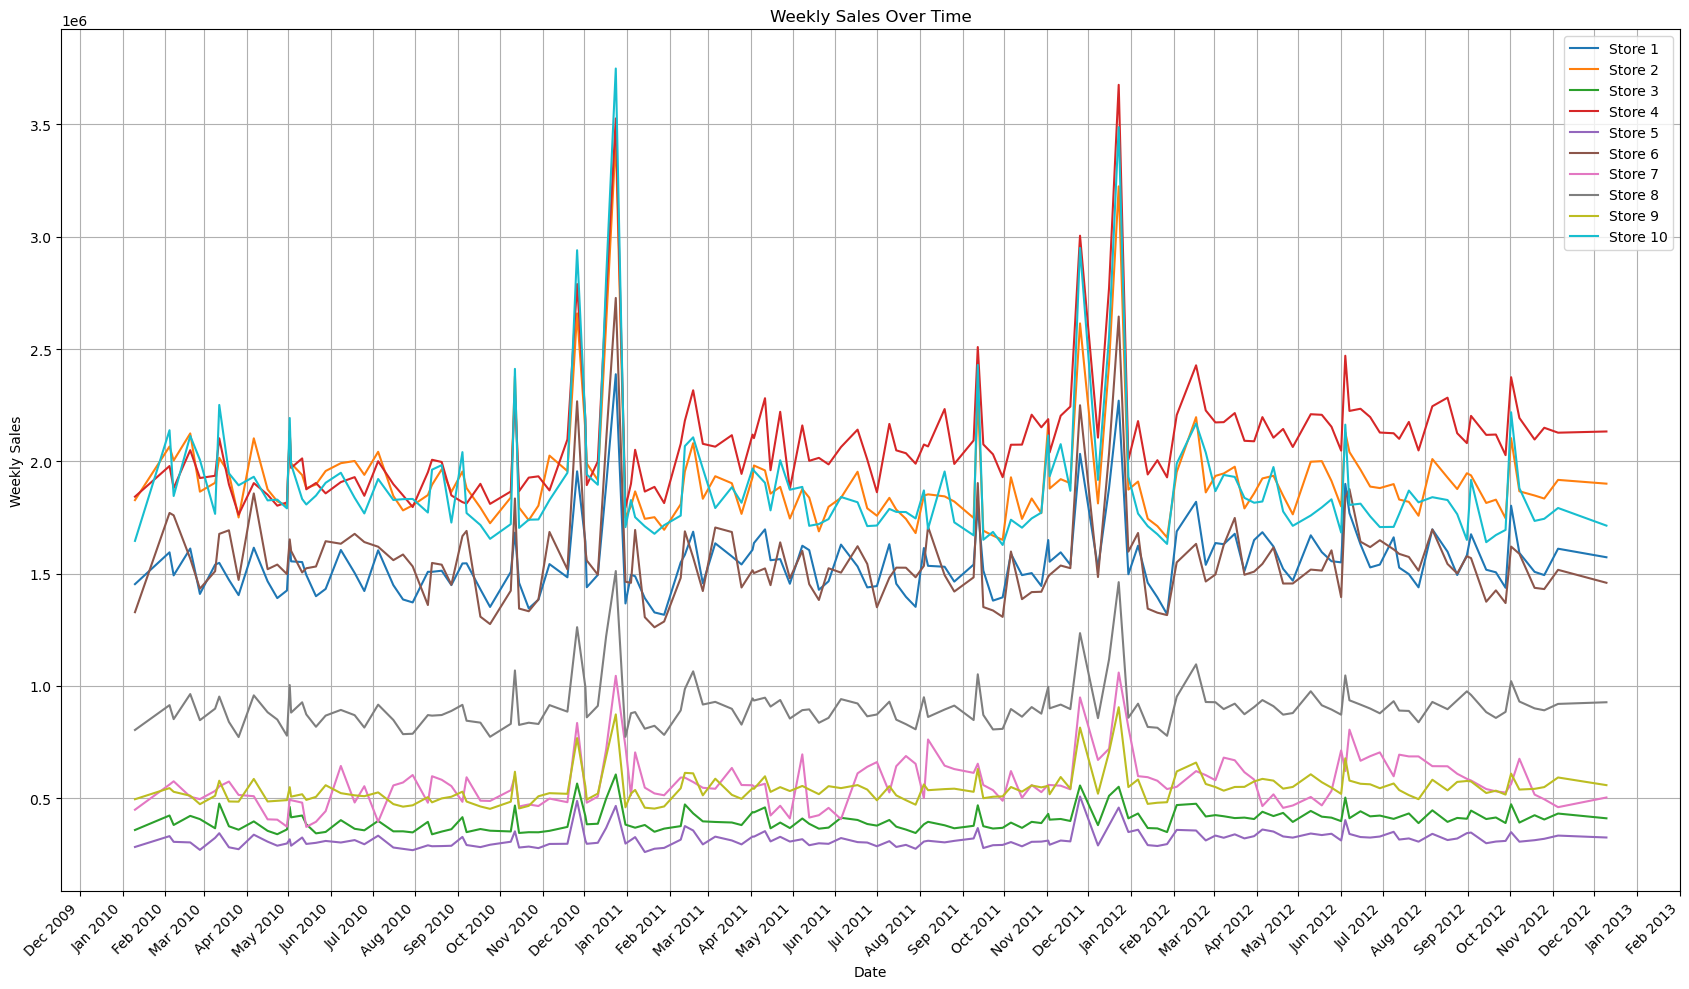

In [30]:

plt.figure(figsize=(17, 10))

# Iterate over stores and plot their sales with different colors
for store_id in range(1, 11):
    a.loc[store_id]['Weekly_Sales'].plot(label=f'Store {store_id}')

plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Over Time')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)

# Formatting x-axis to show only months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.tight_layout()
plt.show()

### We can see seasonal pattern; spike in sales for every store in dec, jan month

In [31]:
b = final_one[["Date", "Temperature", "Store", "Weekly_Sales"]].groupby(["Store", "Date"]).agg({"Temperature": "first", "Weekly_Sales": "sum"}).sort_values(by="Temperature")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(b)

                  Temperature  Weekly_Sales
Store Date                                 
7     2011-04-02        -2.06     558027.77
26    2011-01-28         5.54     817485.14
17    2011-07-01         6.23    1083071.14
7     2012-01-13         7.46     593875.46
40    2011-01-28         9.51     775910.43
26    2010-05-02         9.55    1034119.21
7     2011-07-01        10.09     661163.94
      2011-01-28        10.11     513372.17
      2011-11-02        10.24     559903.13
      2010-05-02        10.53     496725.44
23    2011-01-28        10.91    1083657.61
26    2011-04-02        11.17     911807.02
7     2011-09-12        11.17     653845.45
17    2011-04-02        11.29     816603.05
7     2011-01-14        11.32     547384.90
      2011-12-23        12.19    1059715.27
16    2011-07-01        12.39     573545.96
26    2011-01-21        12.98     809833.21
40    2011-04-02        13.29     904261.65
16    2011-04-02        13.64     479263.15
7     2010-12-31        13.76   

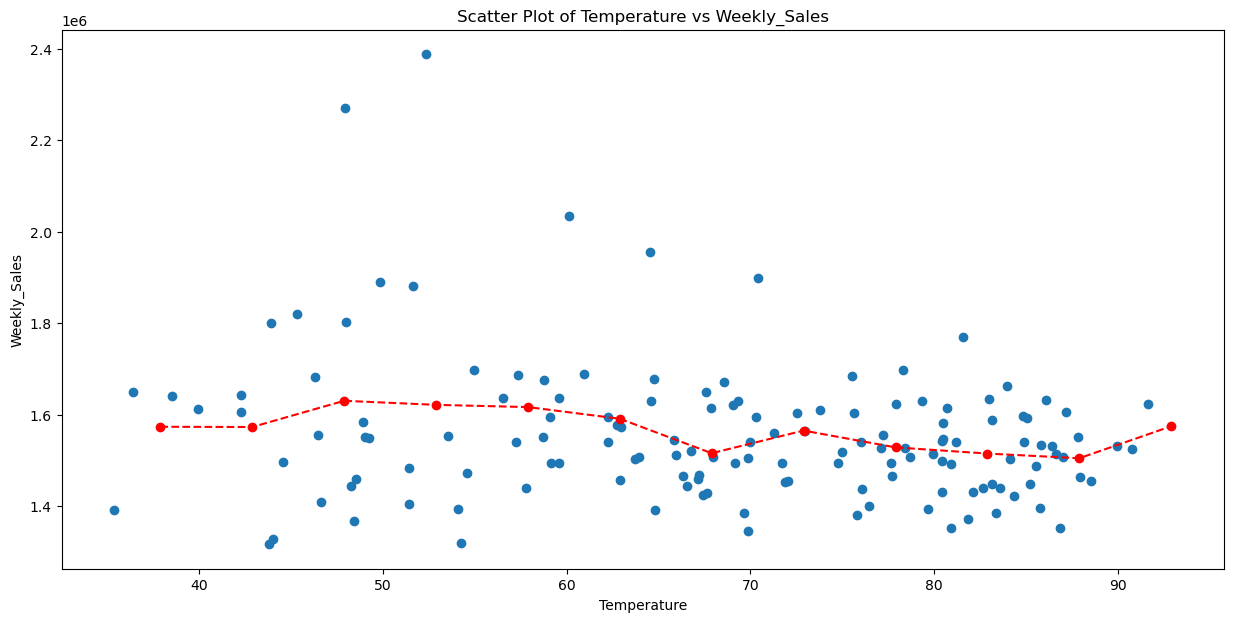

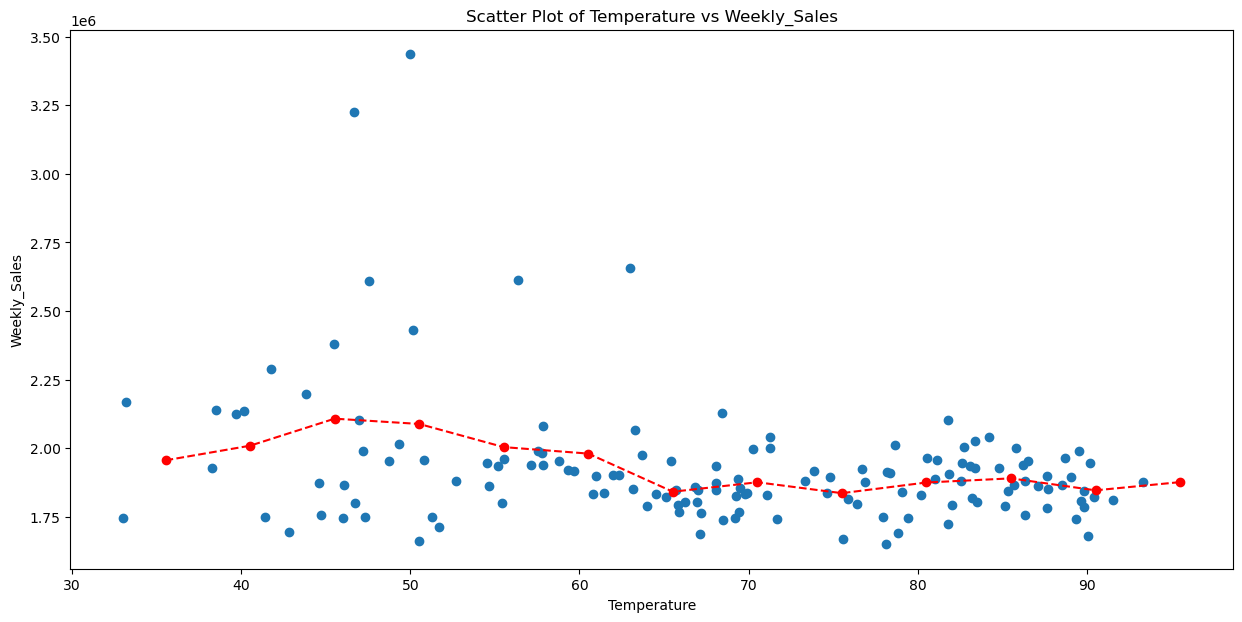

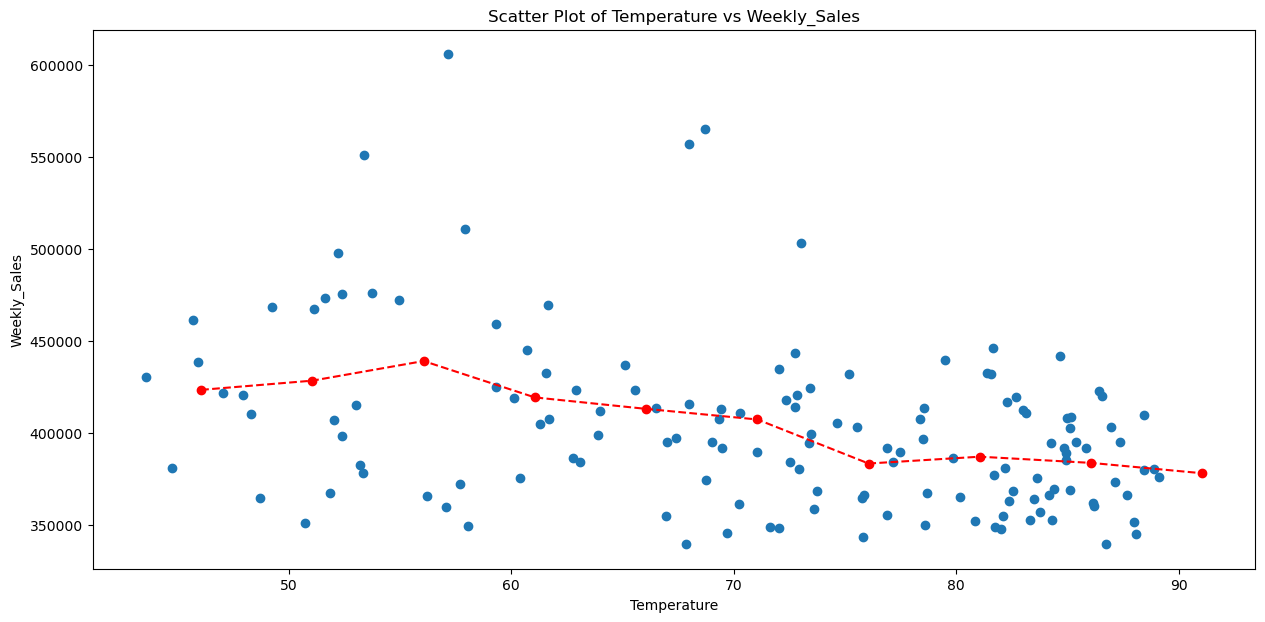

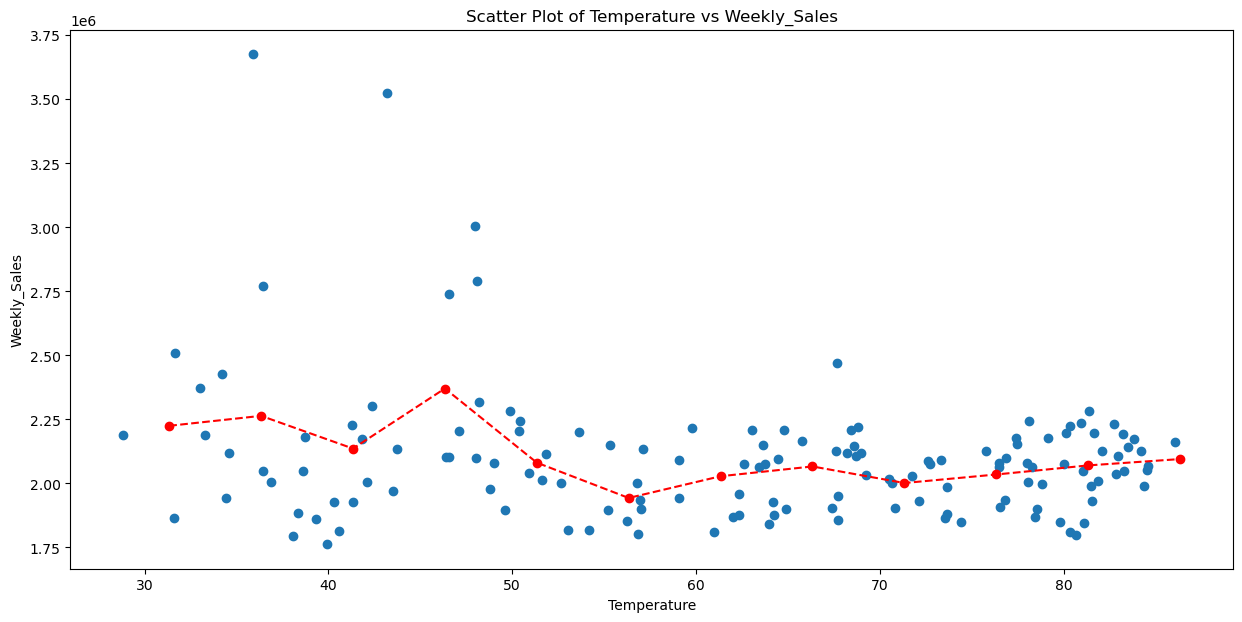

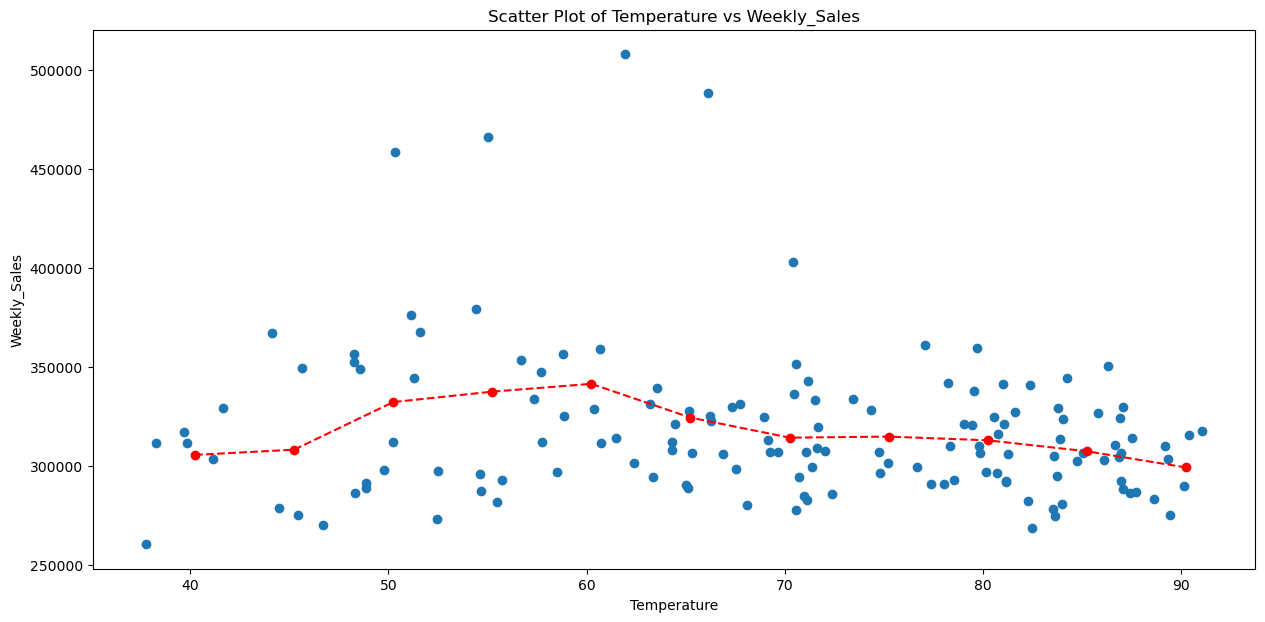

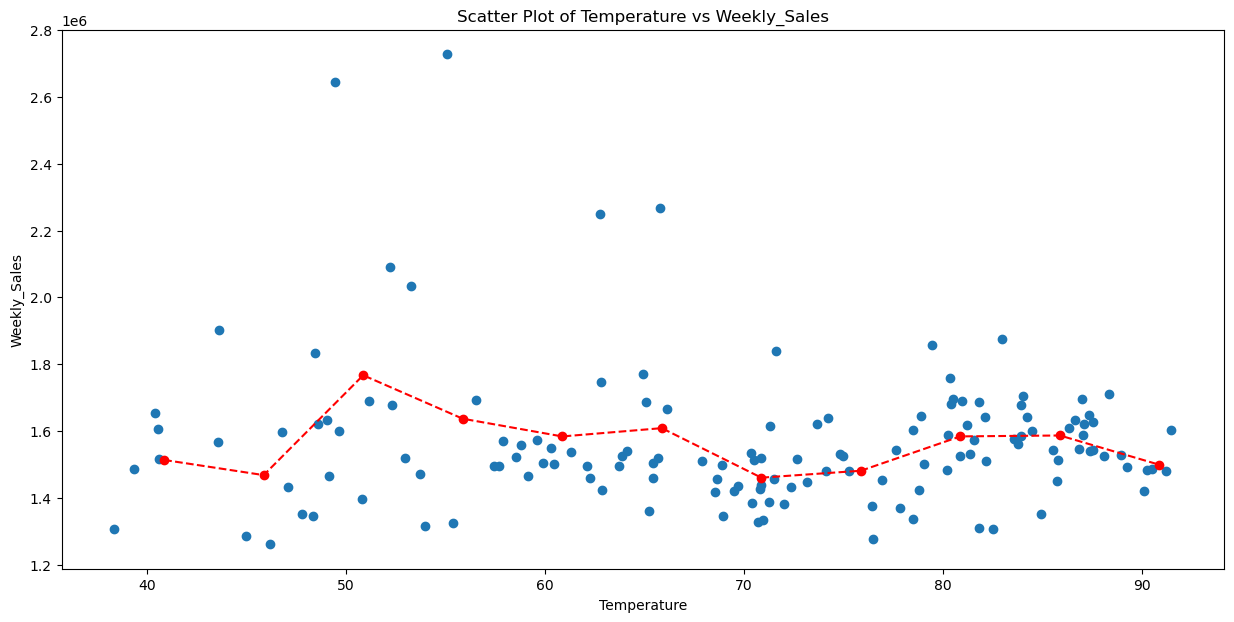

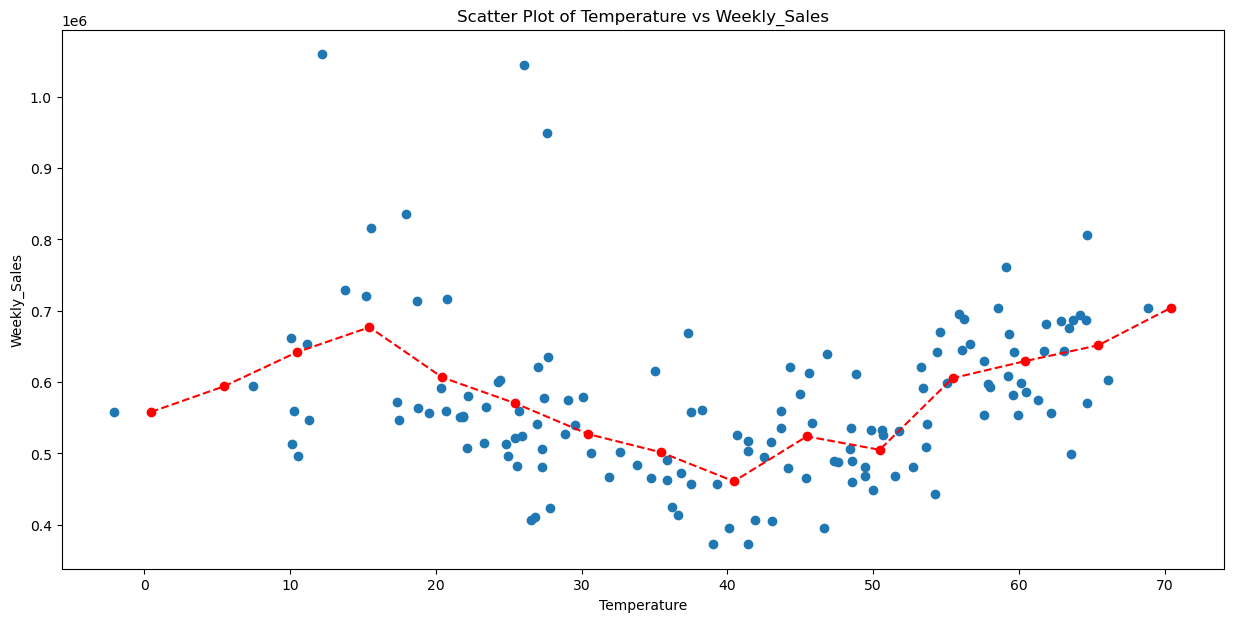

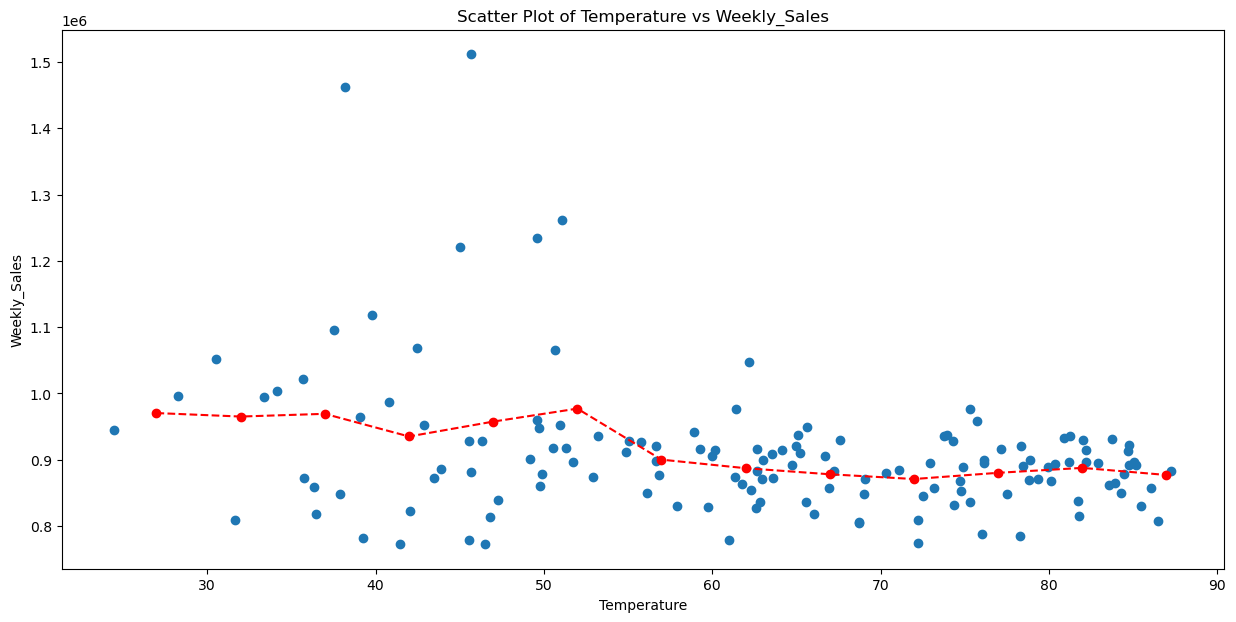

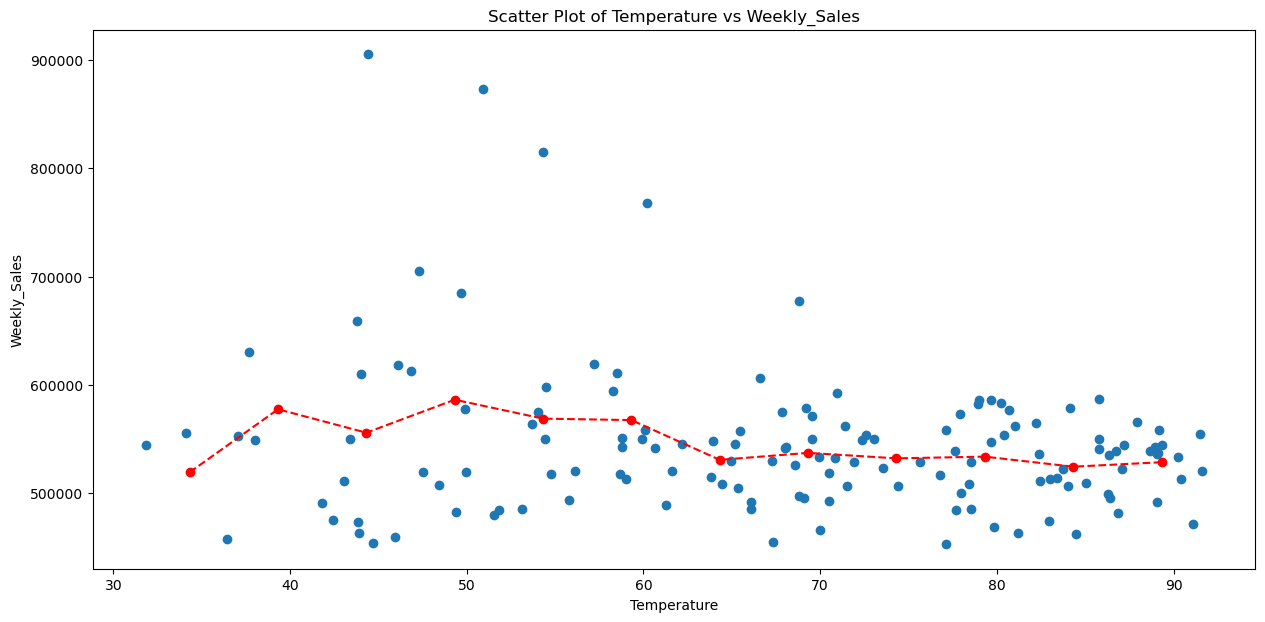

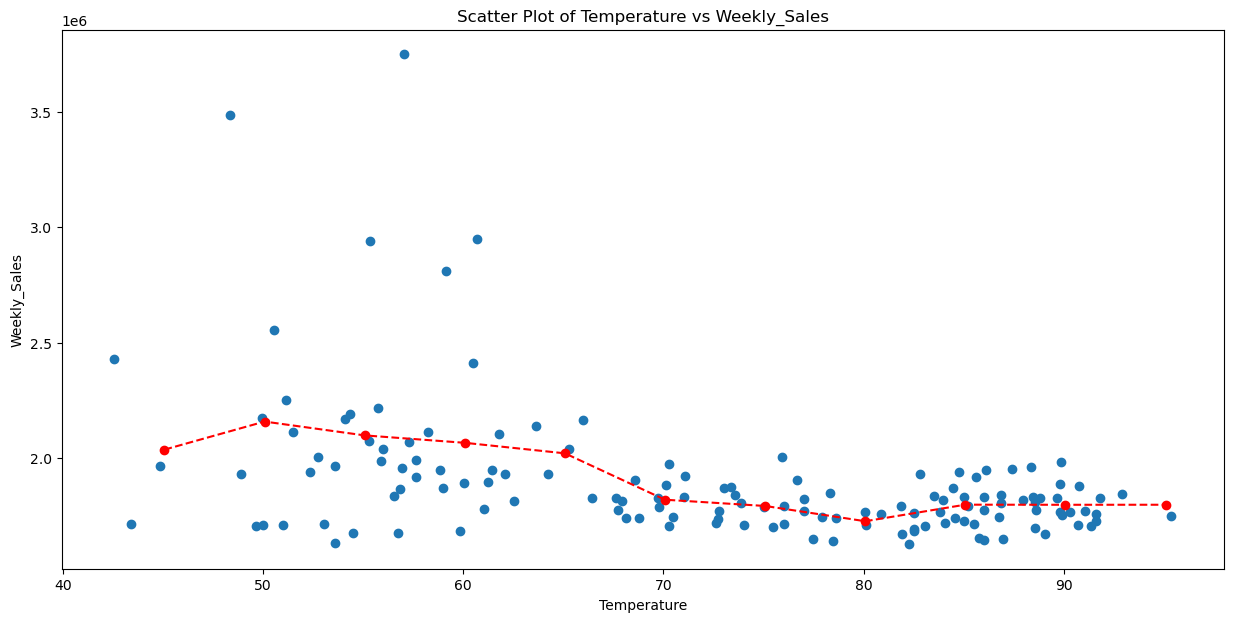

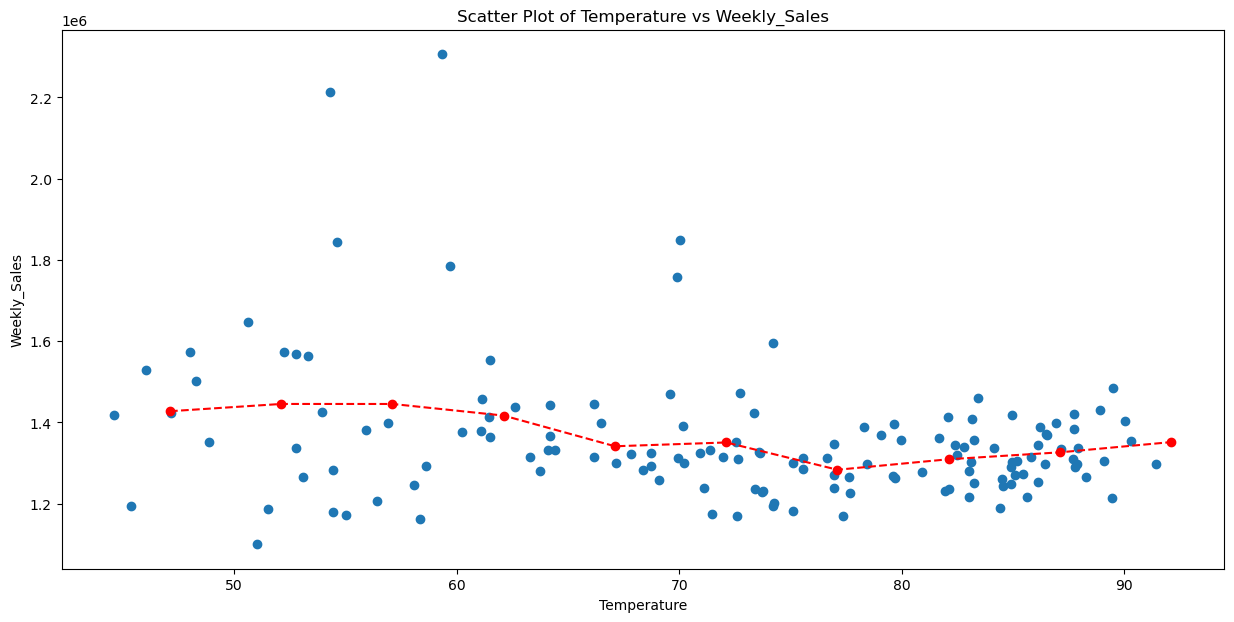

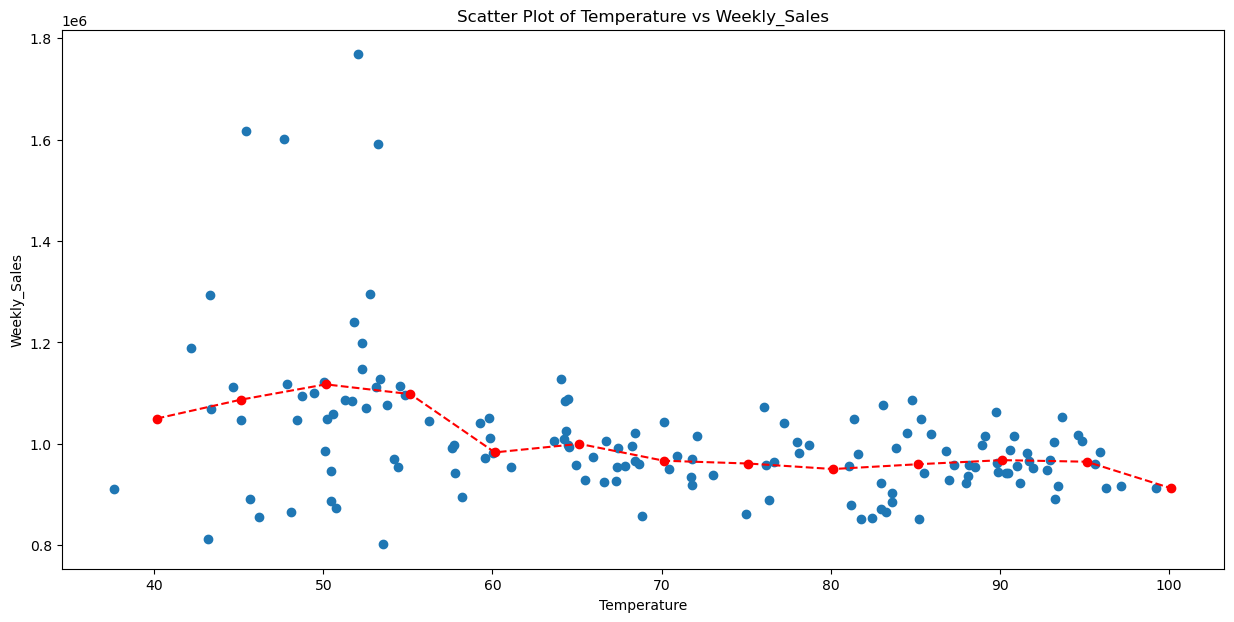

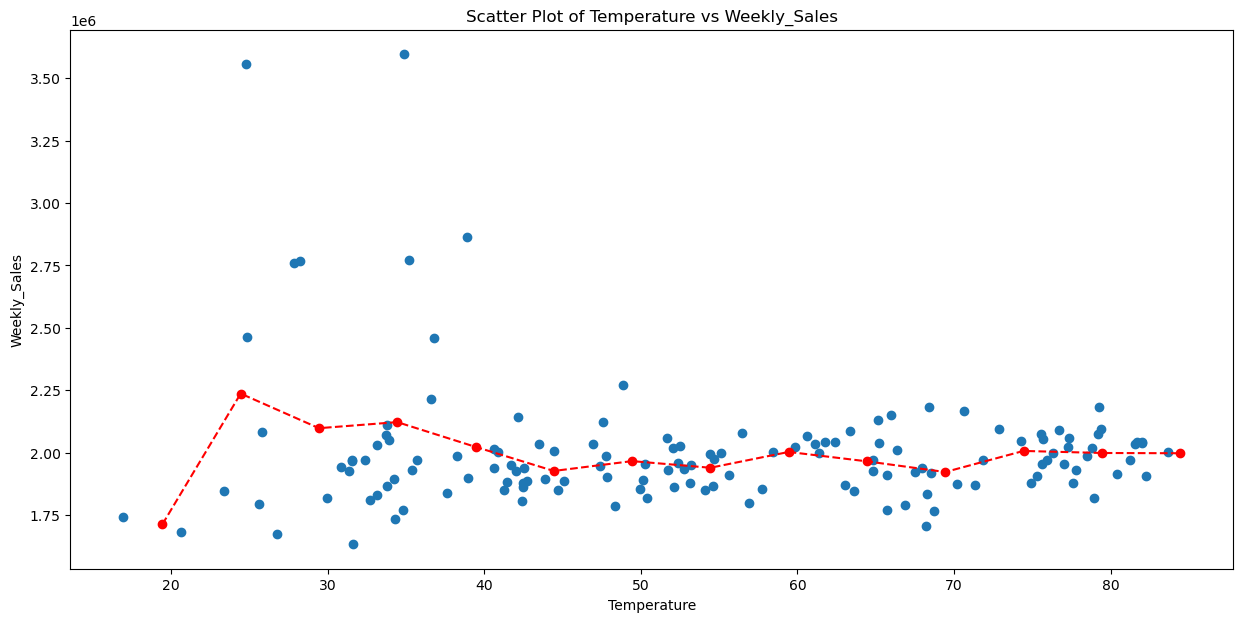

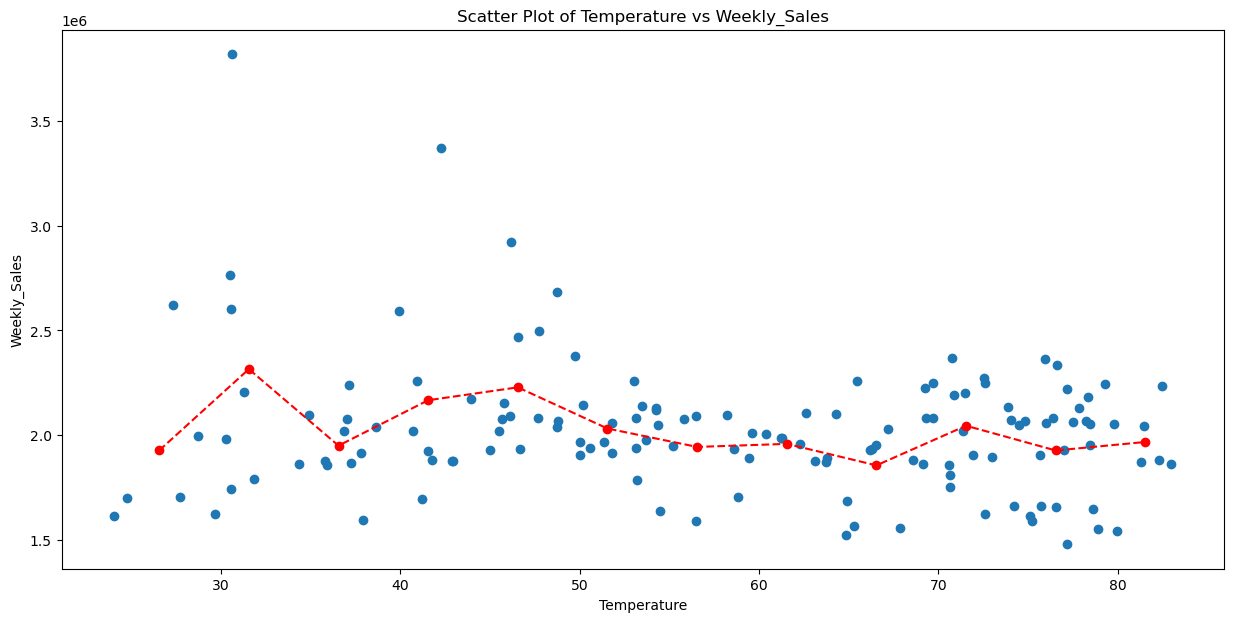

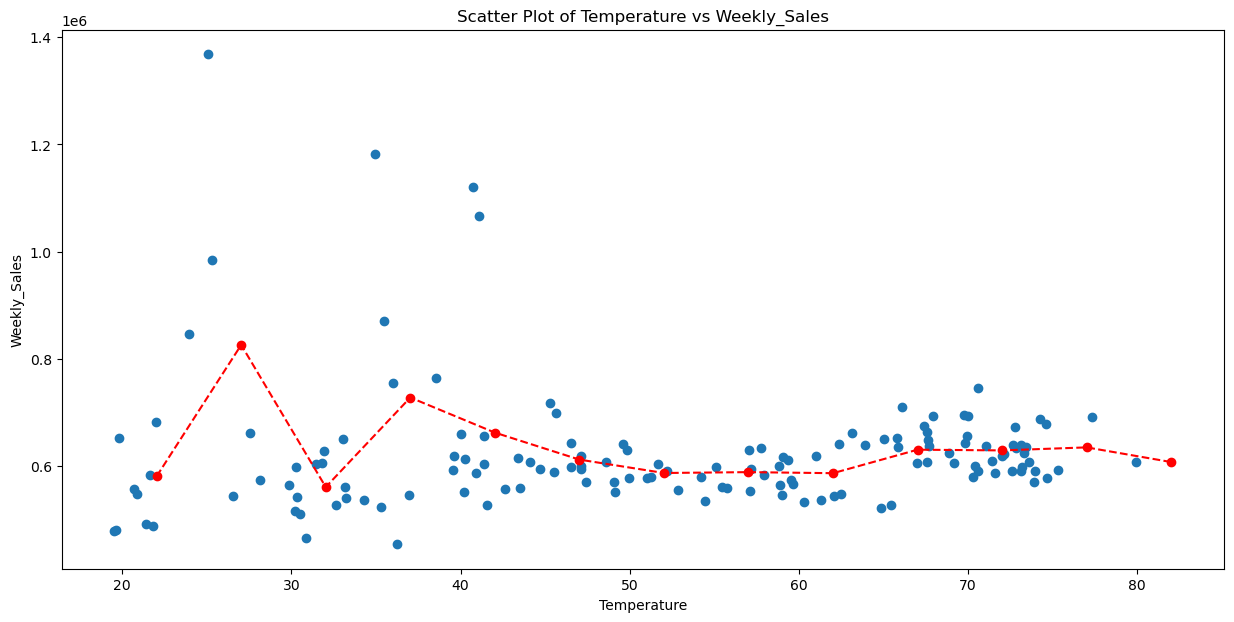

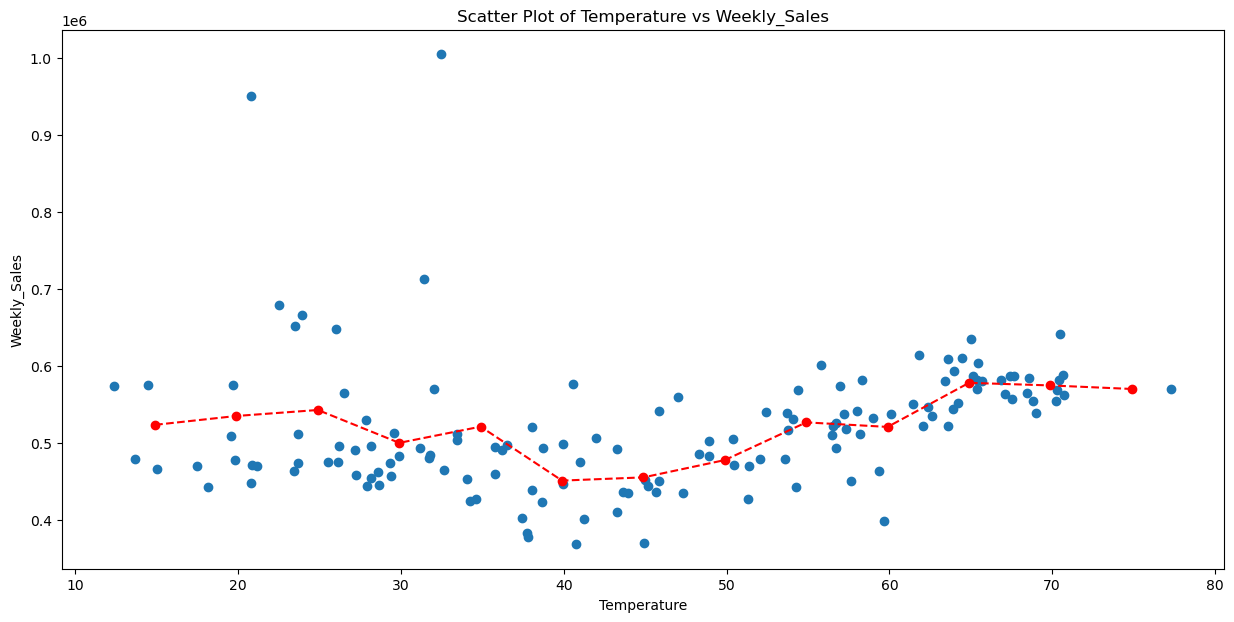

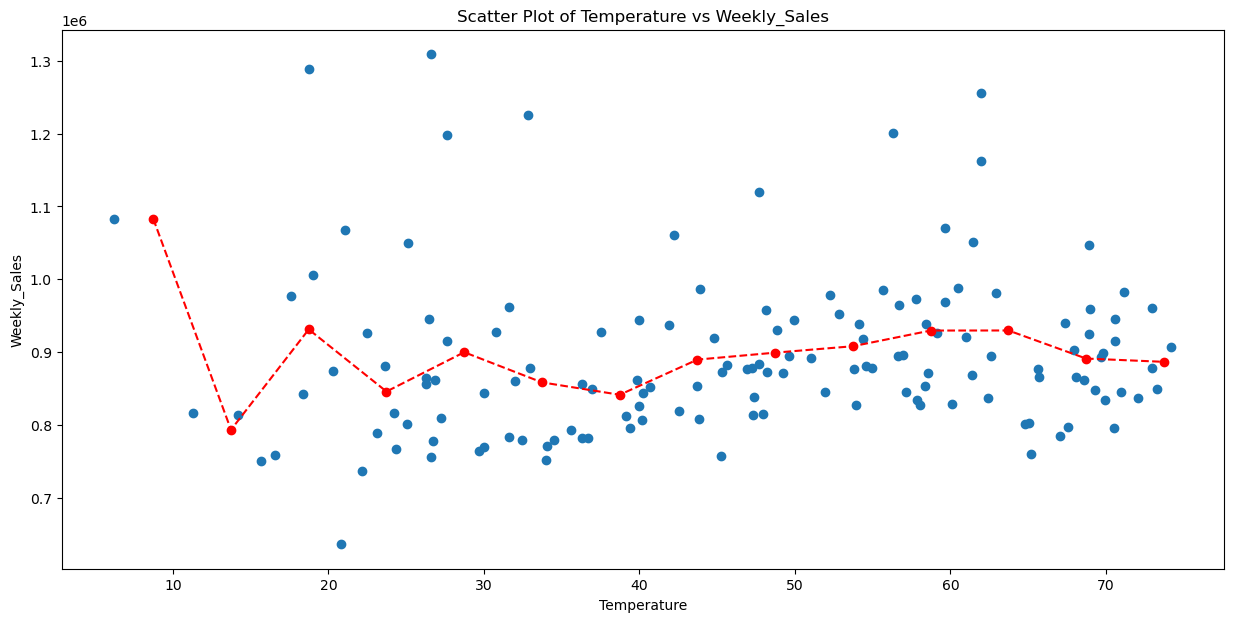

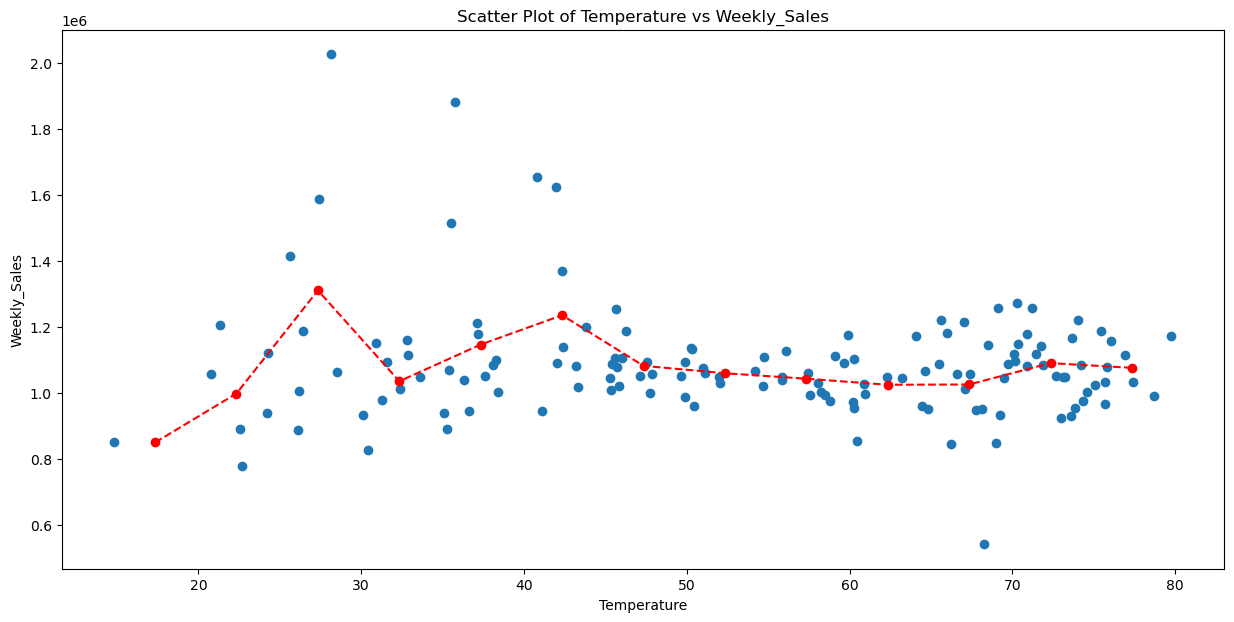

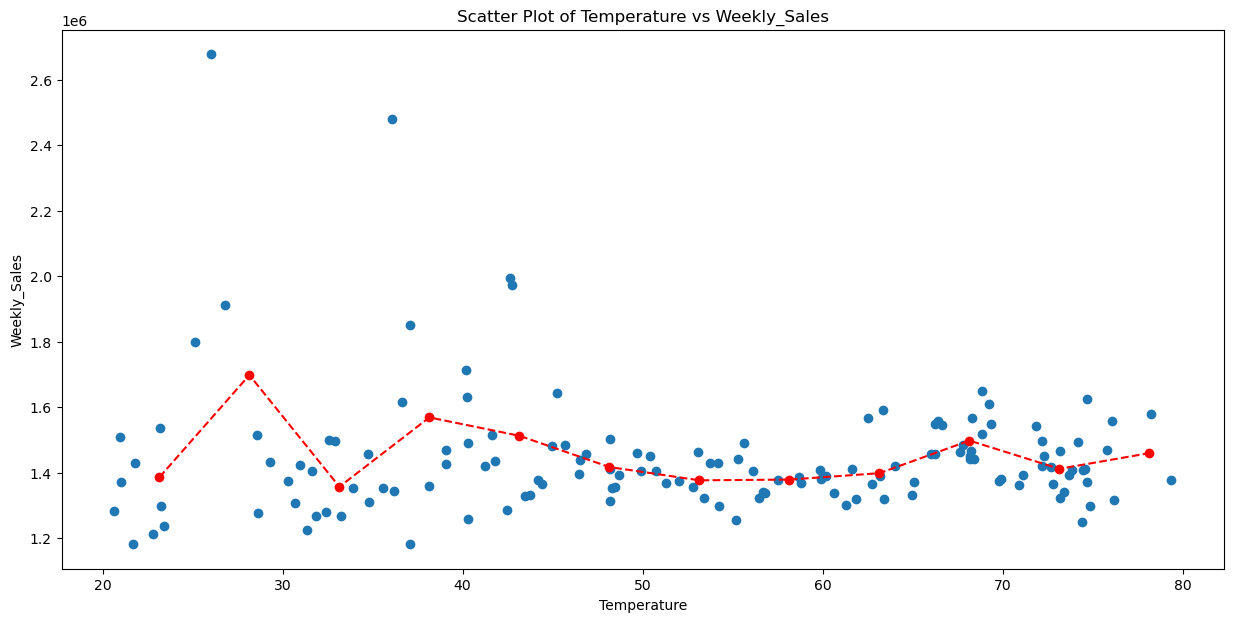

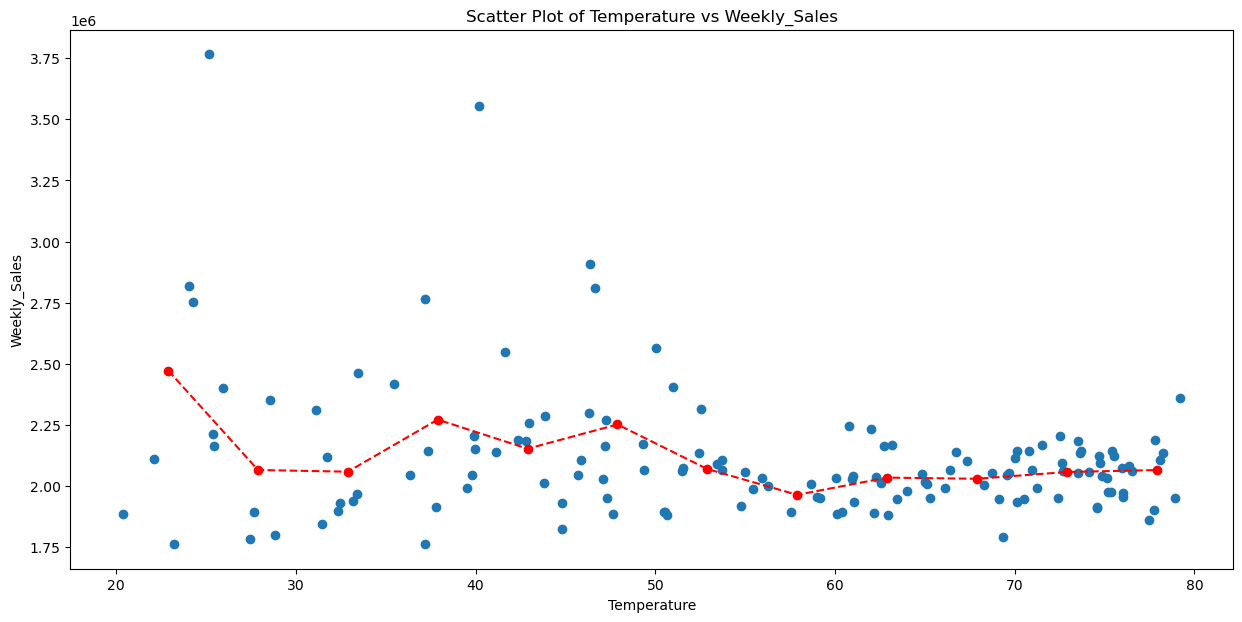

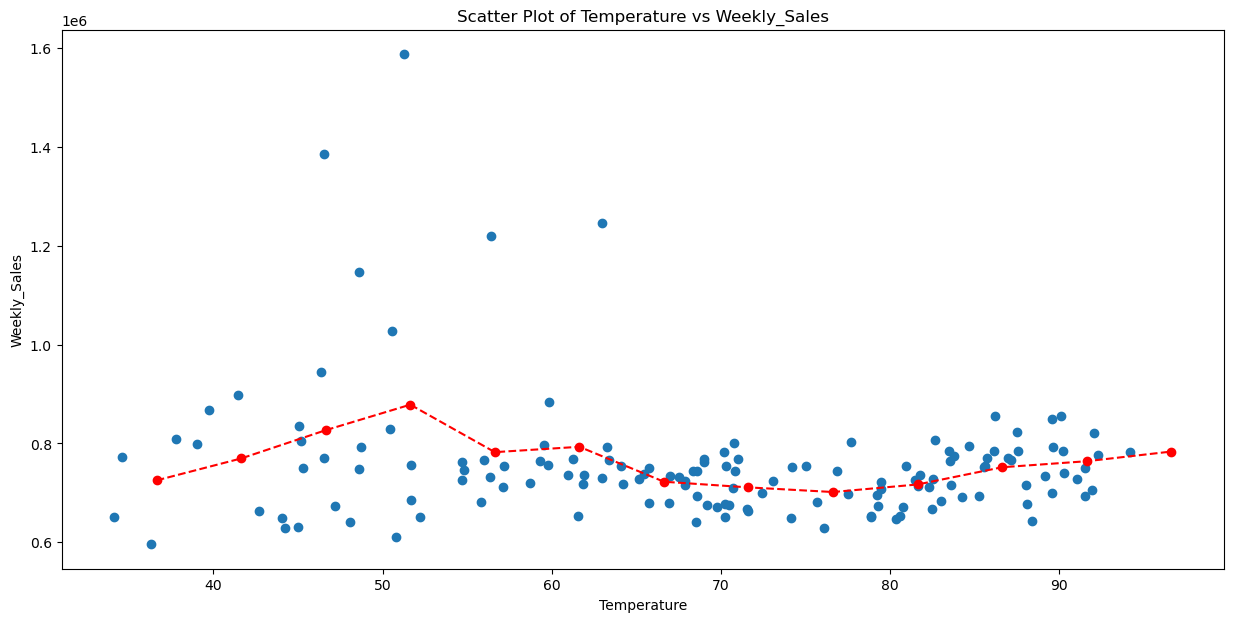

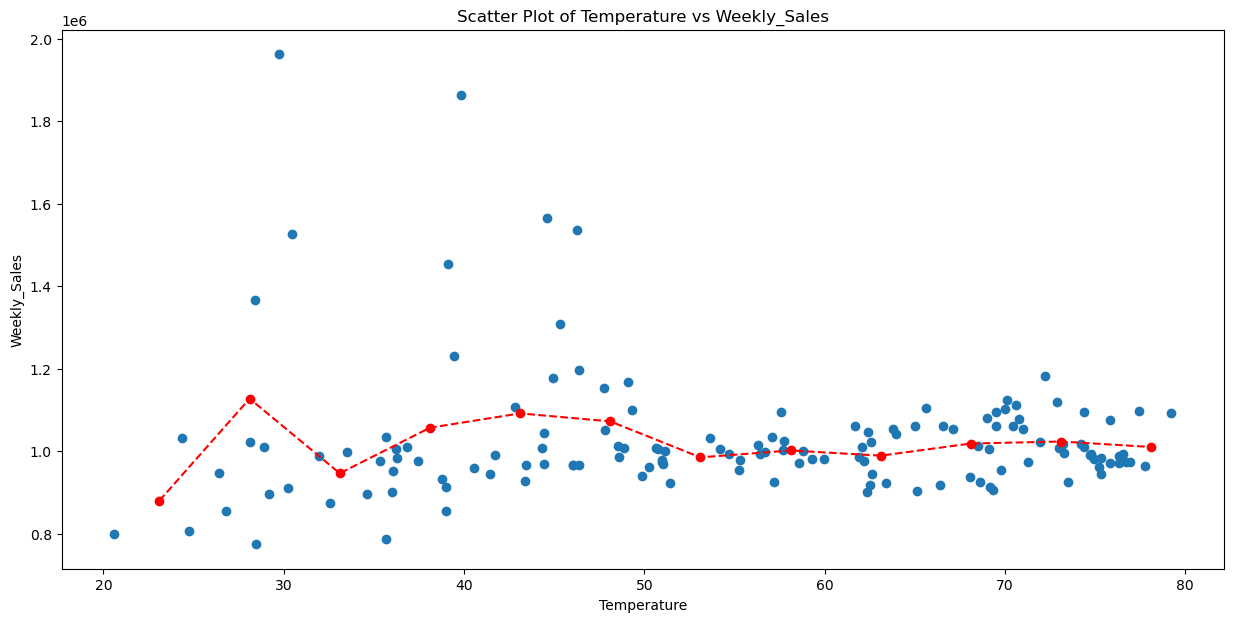

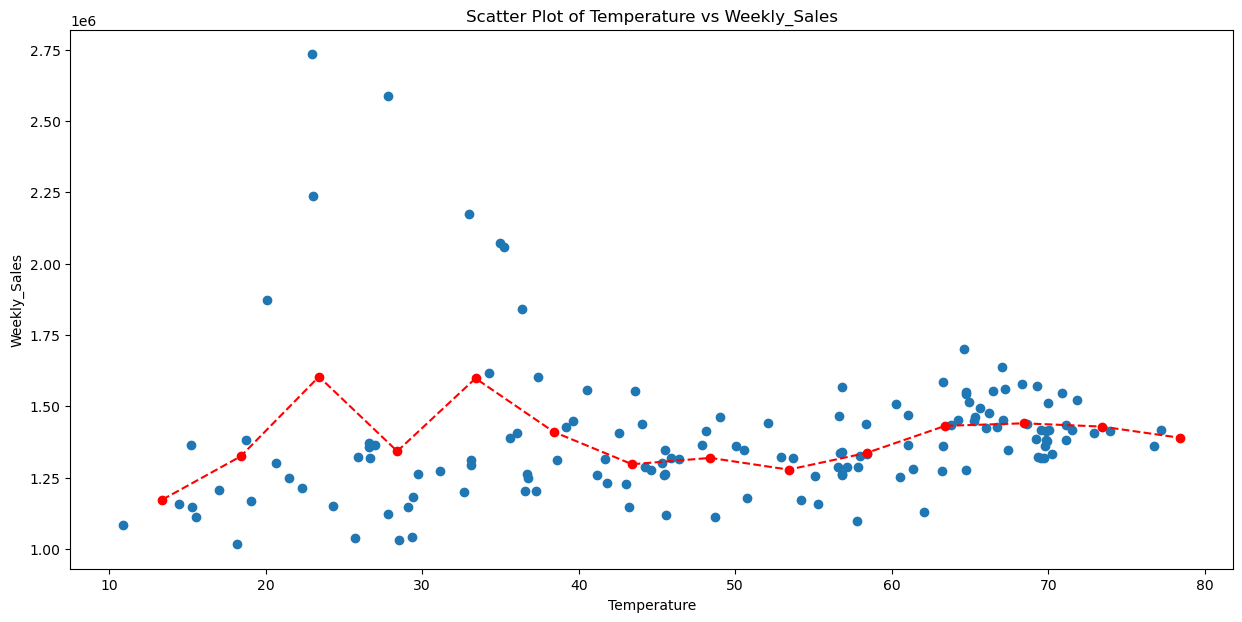

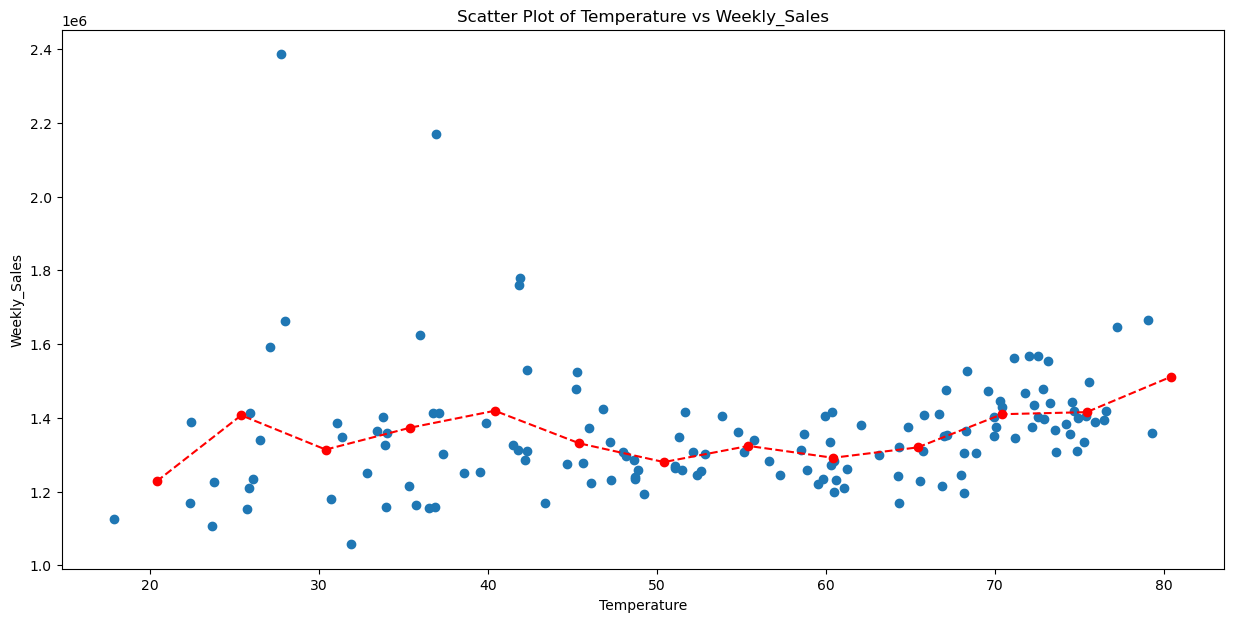

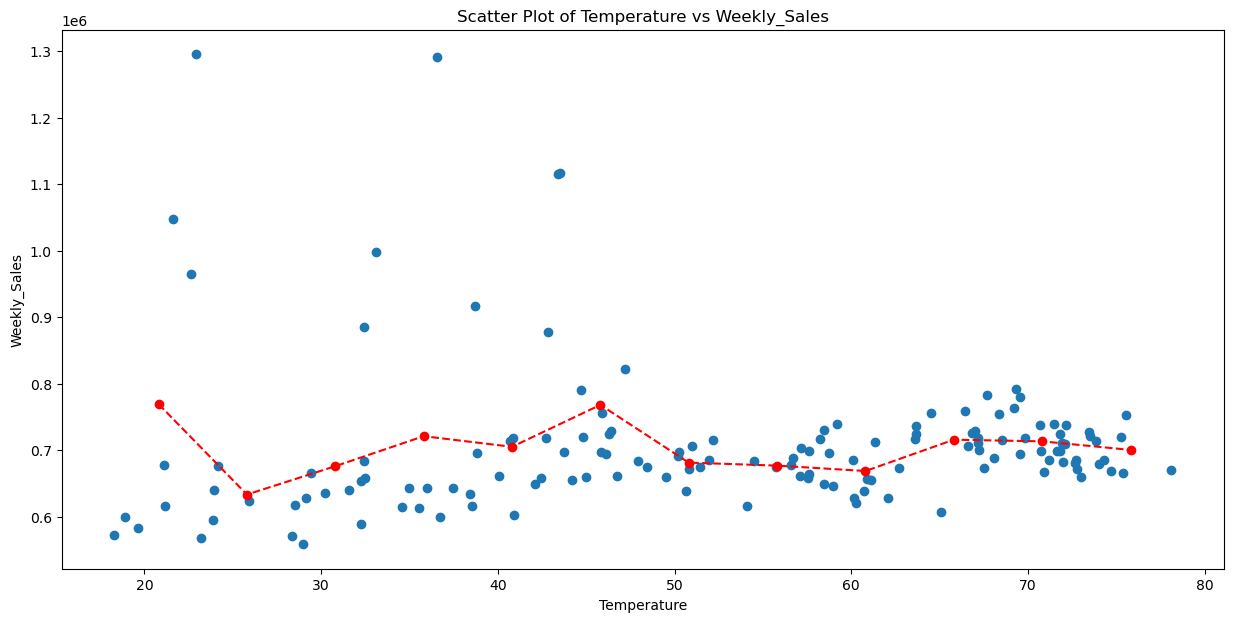

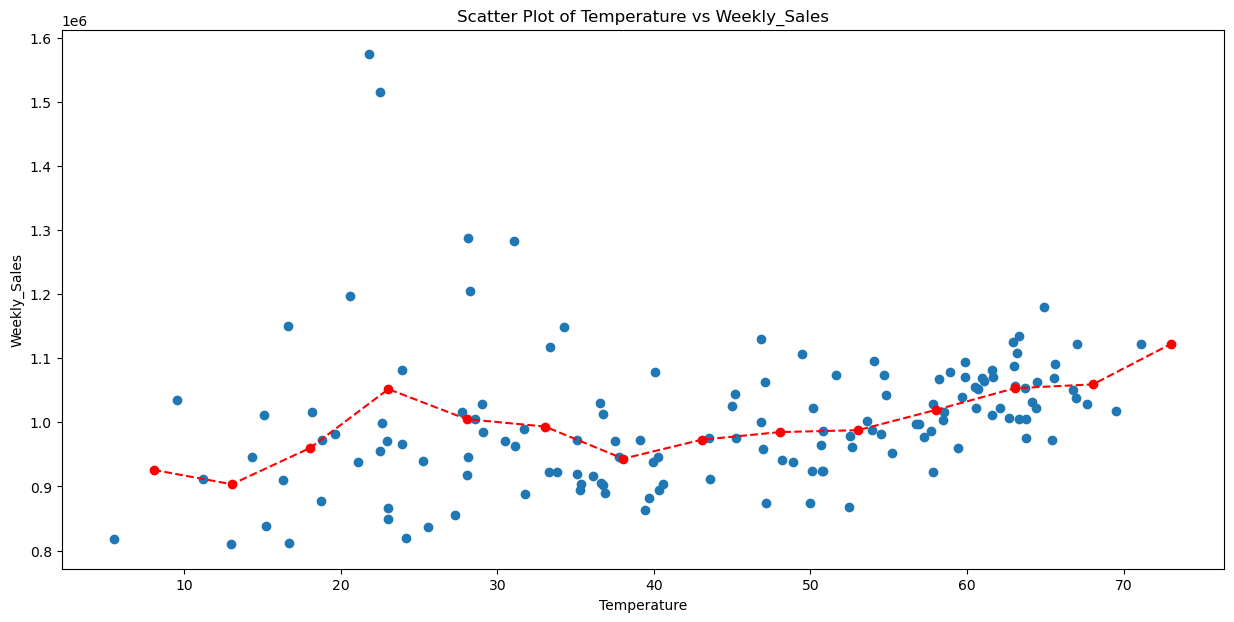

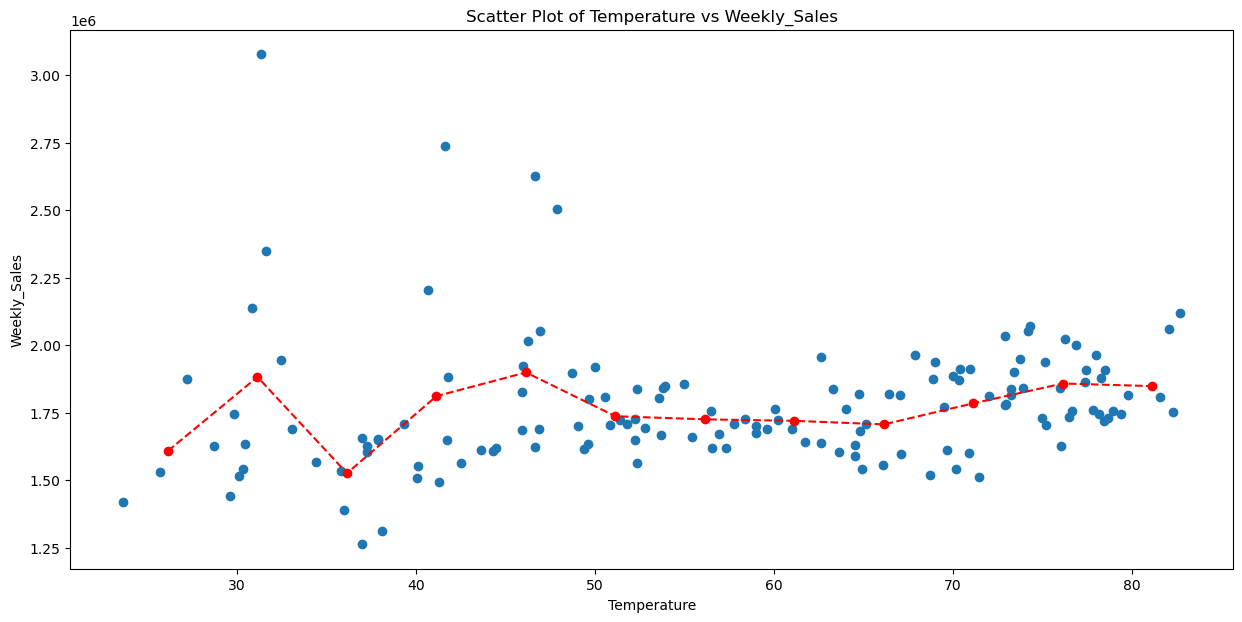

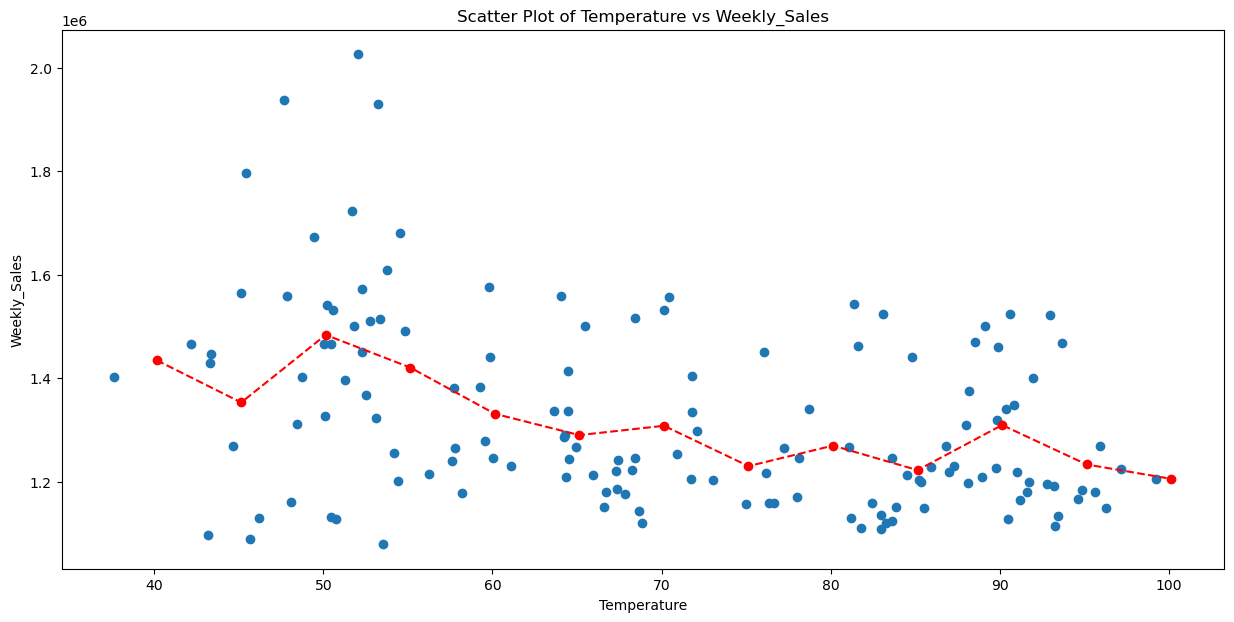

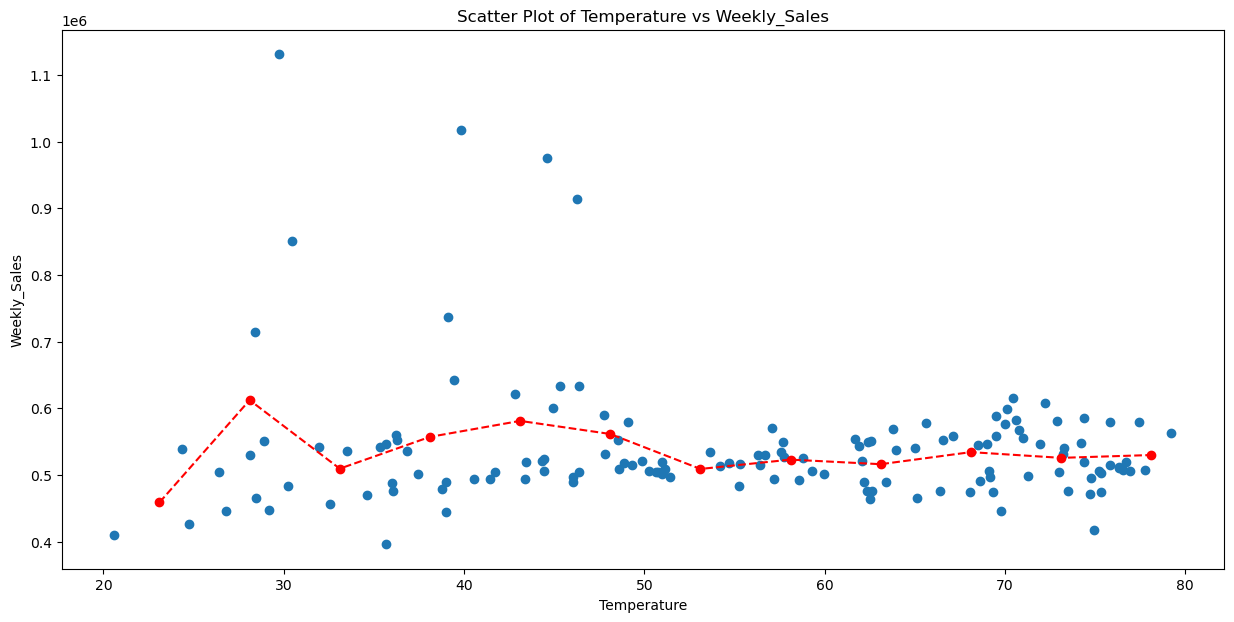

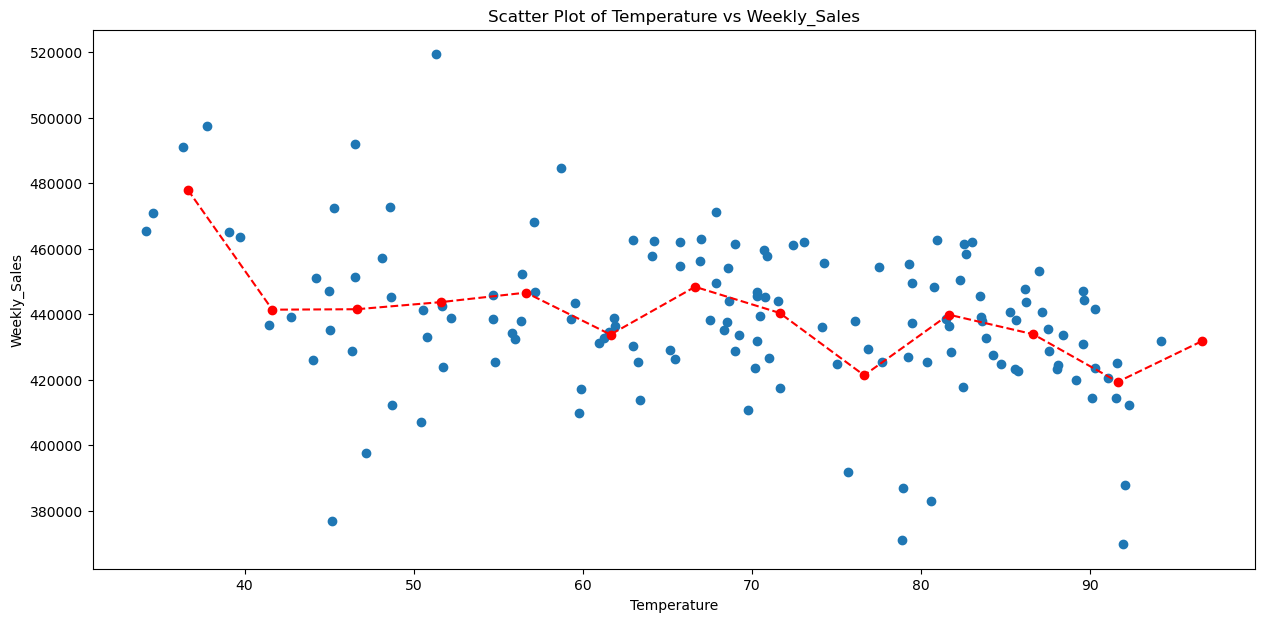

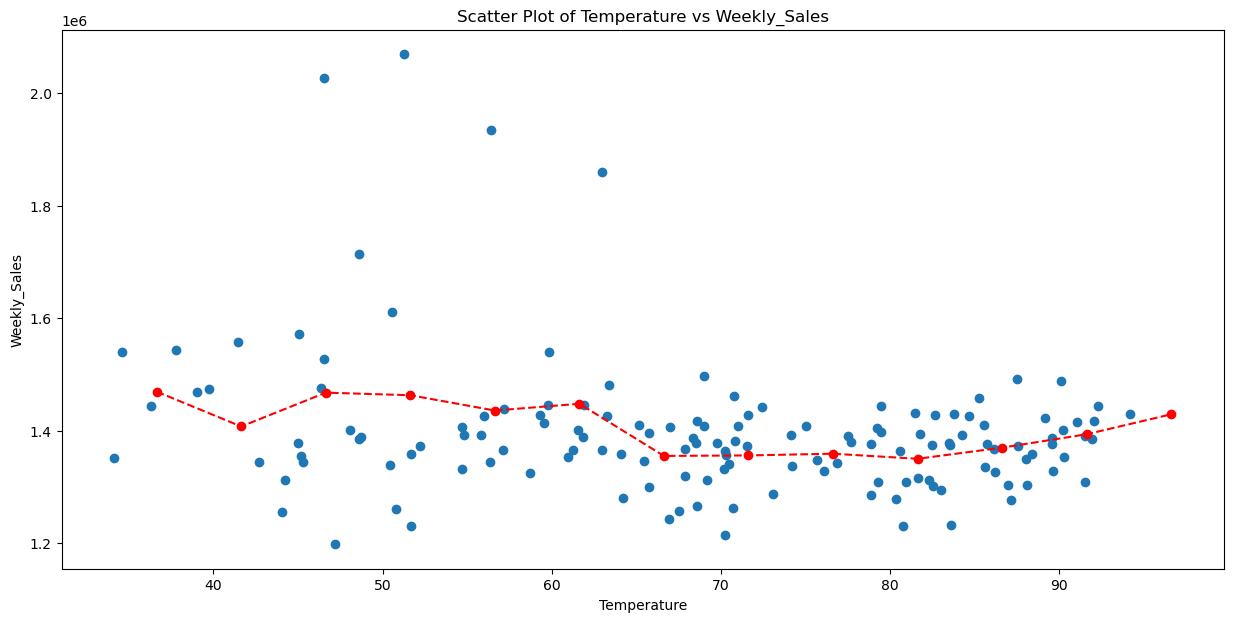

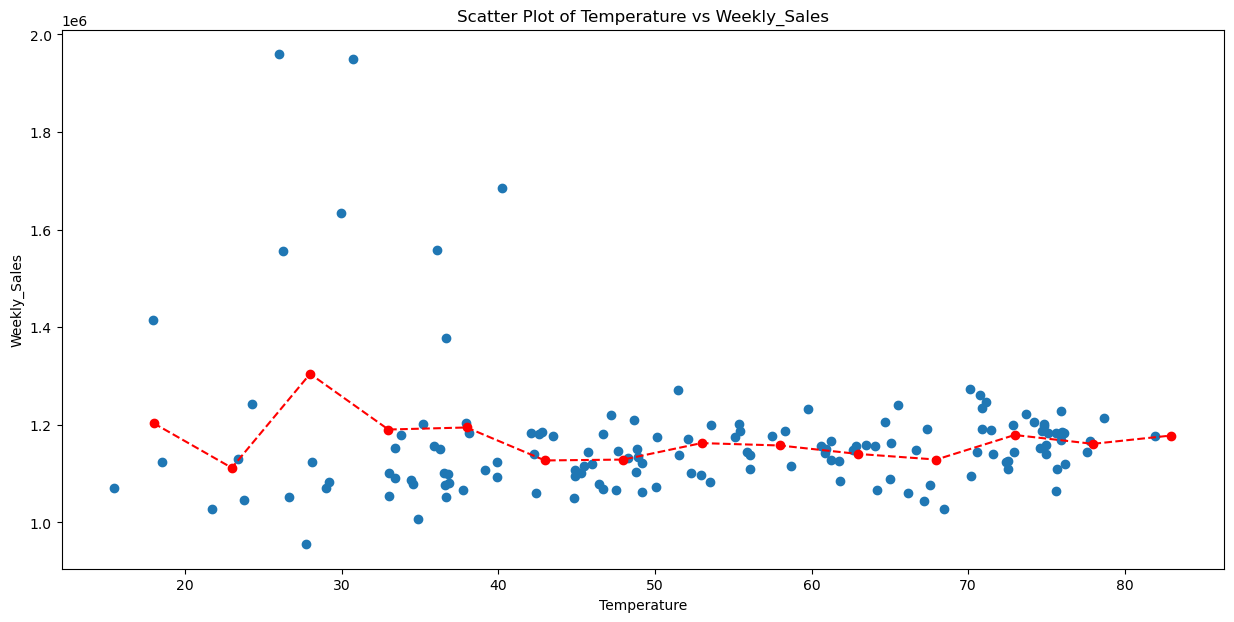

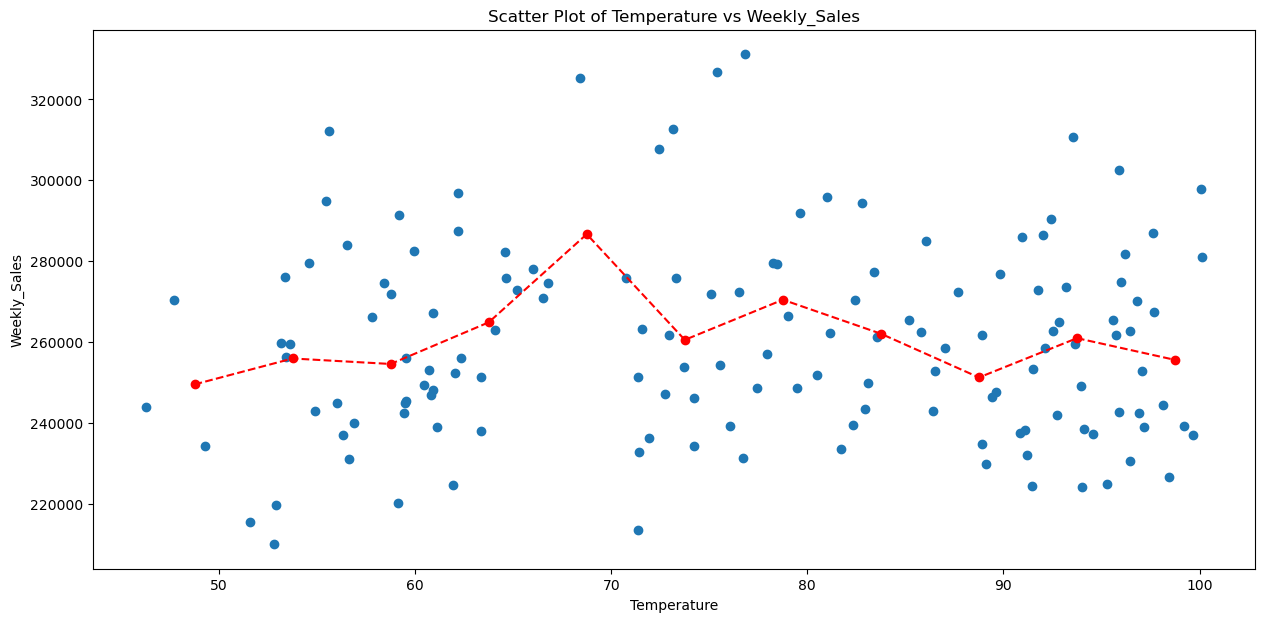

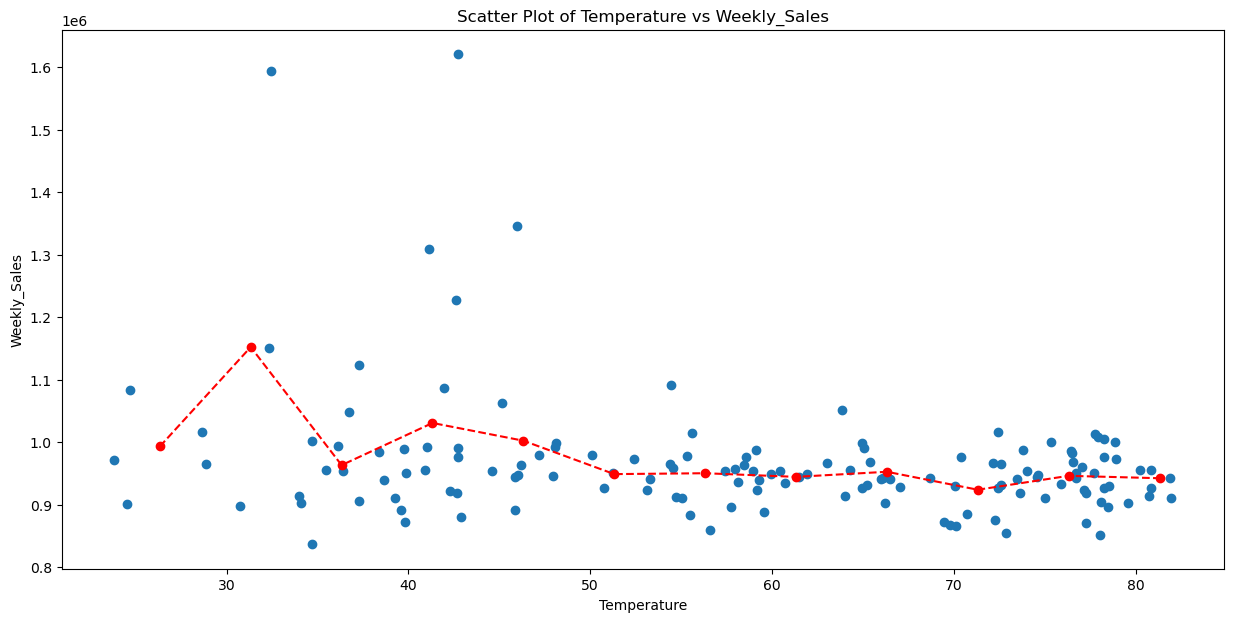

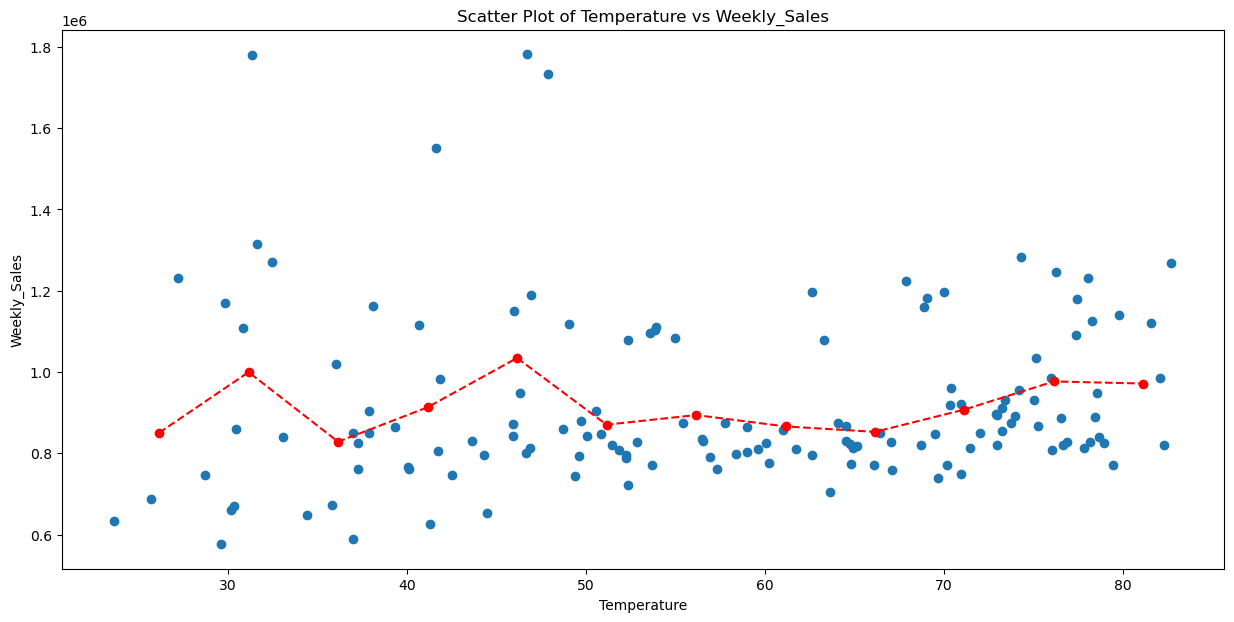

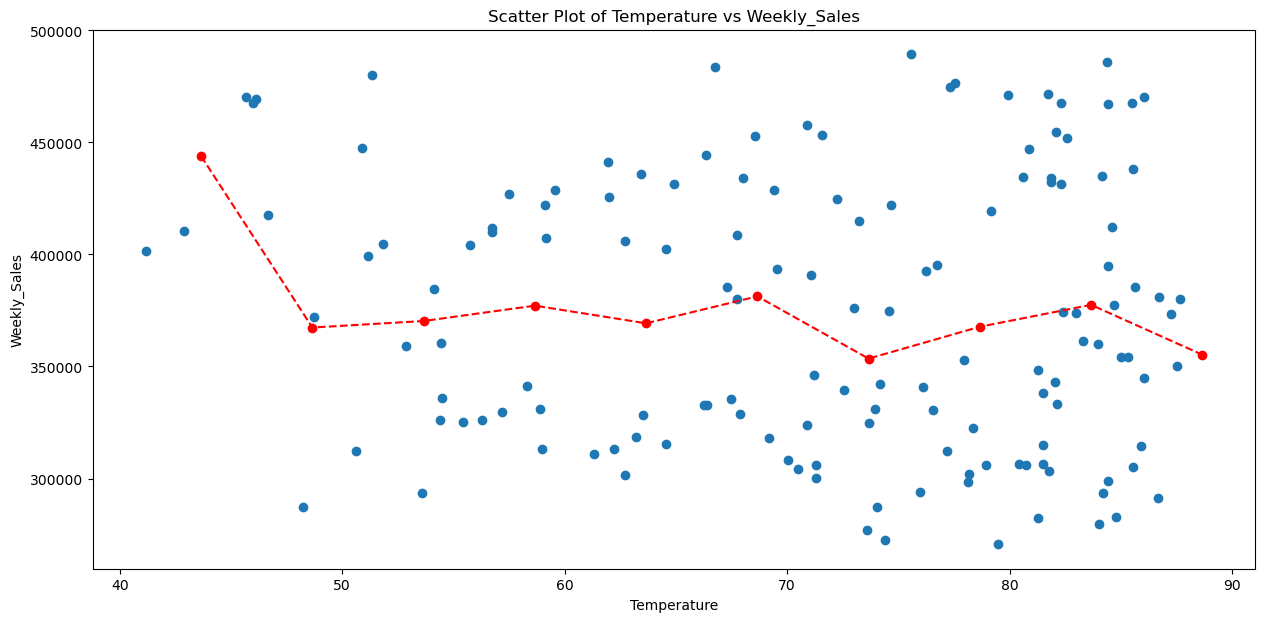

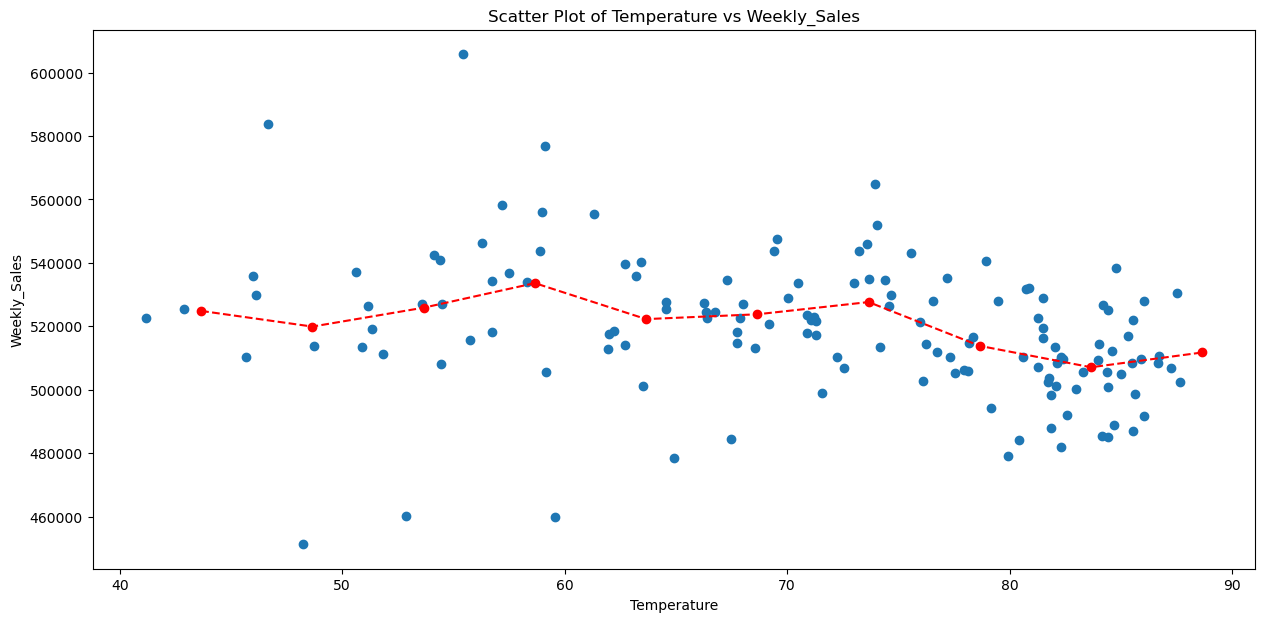

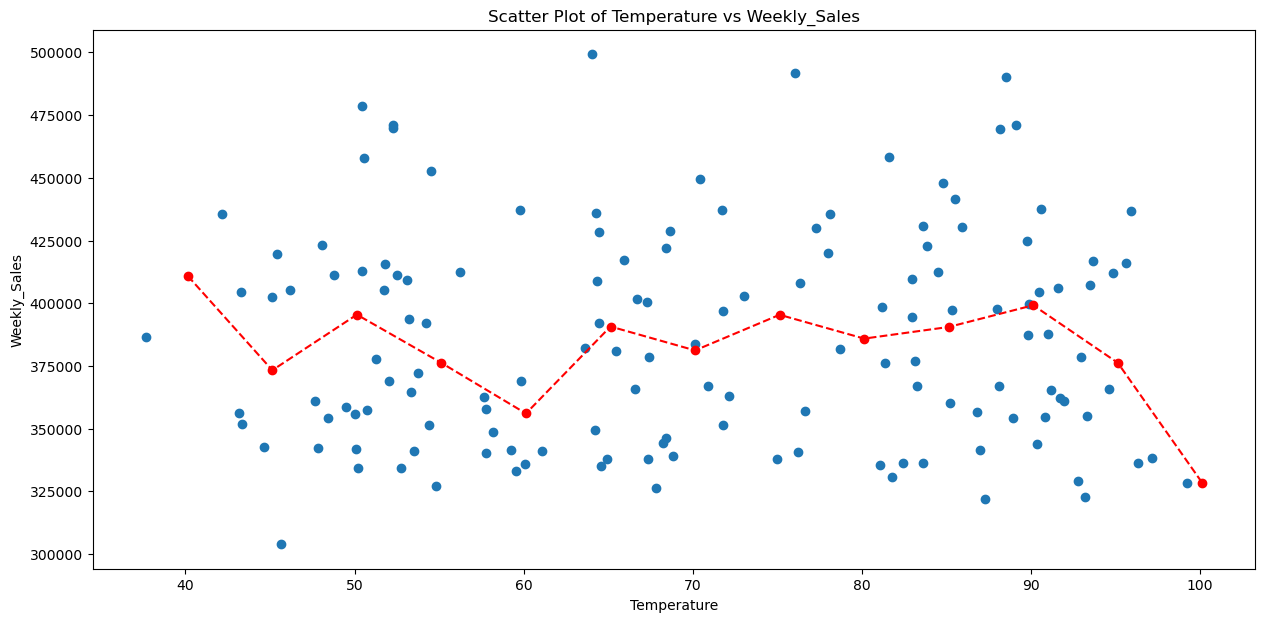

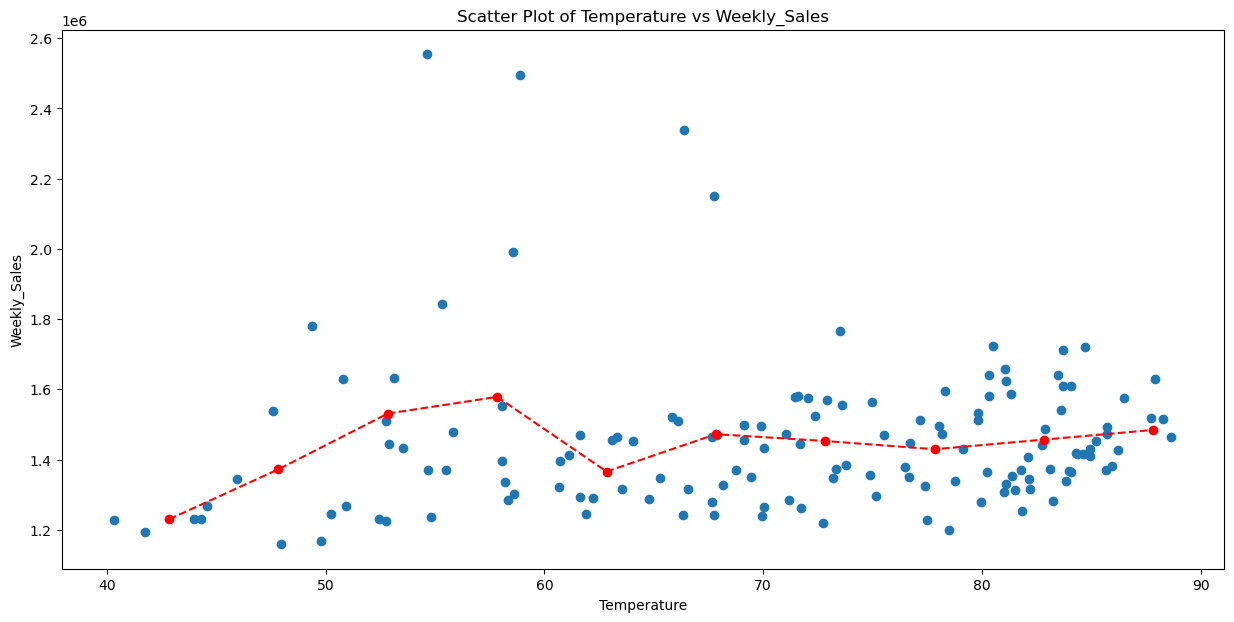

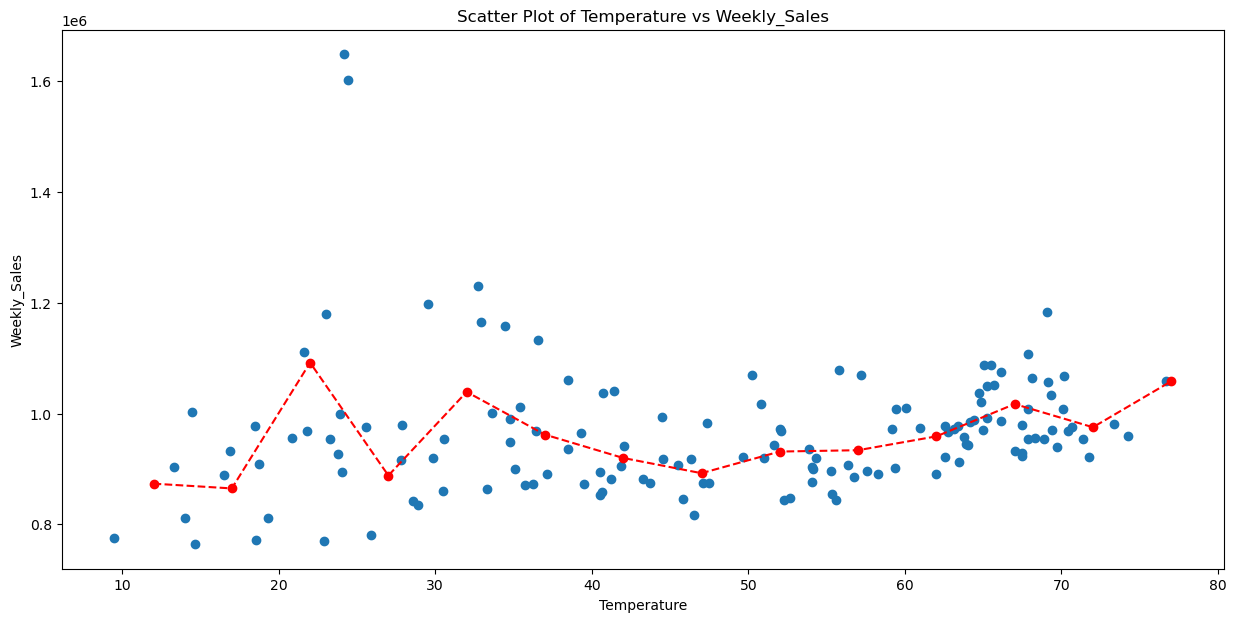

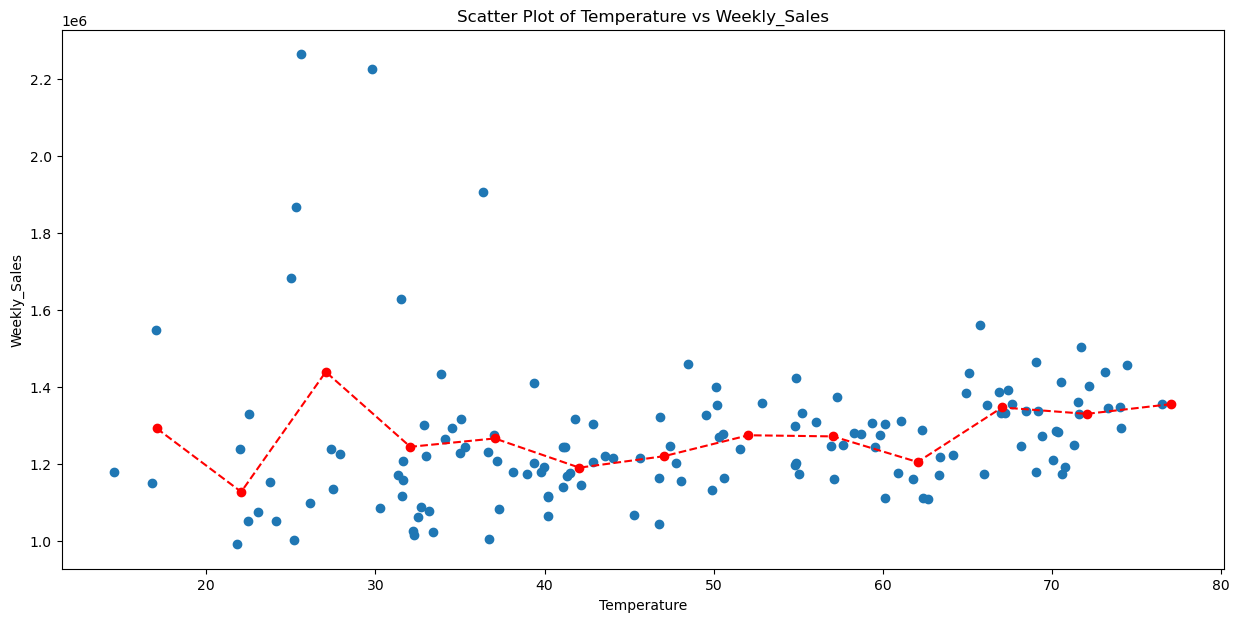

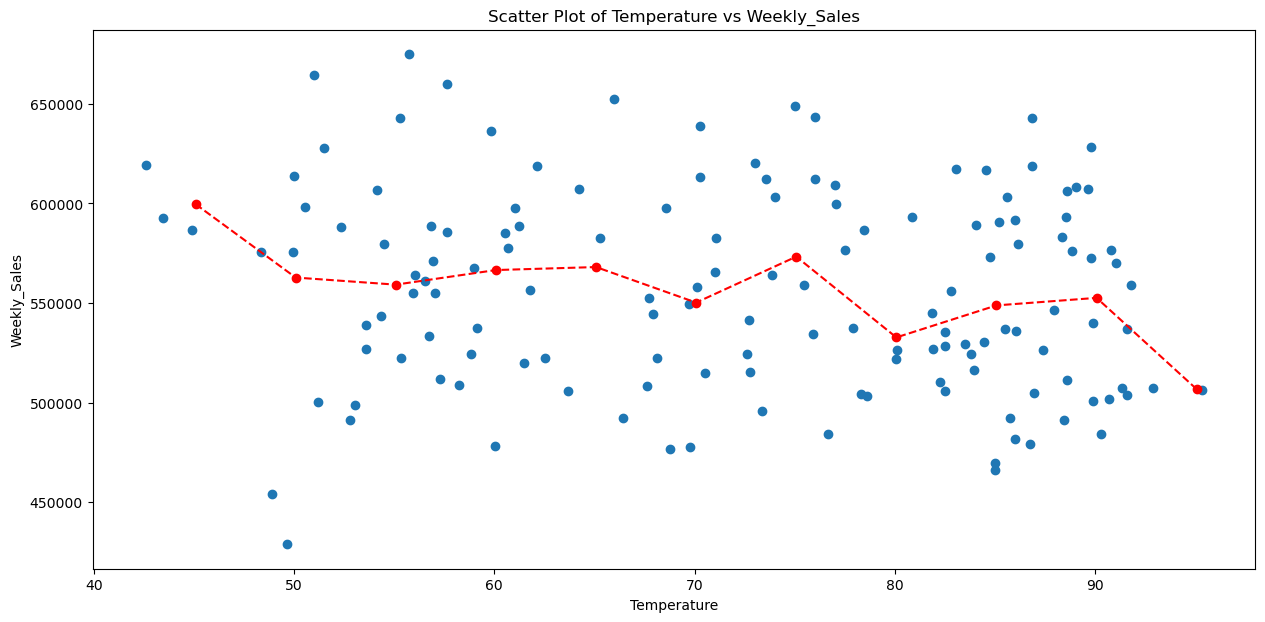

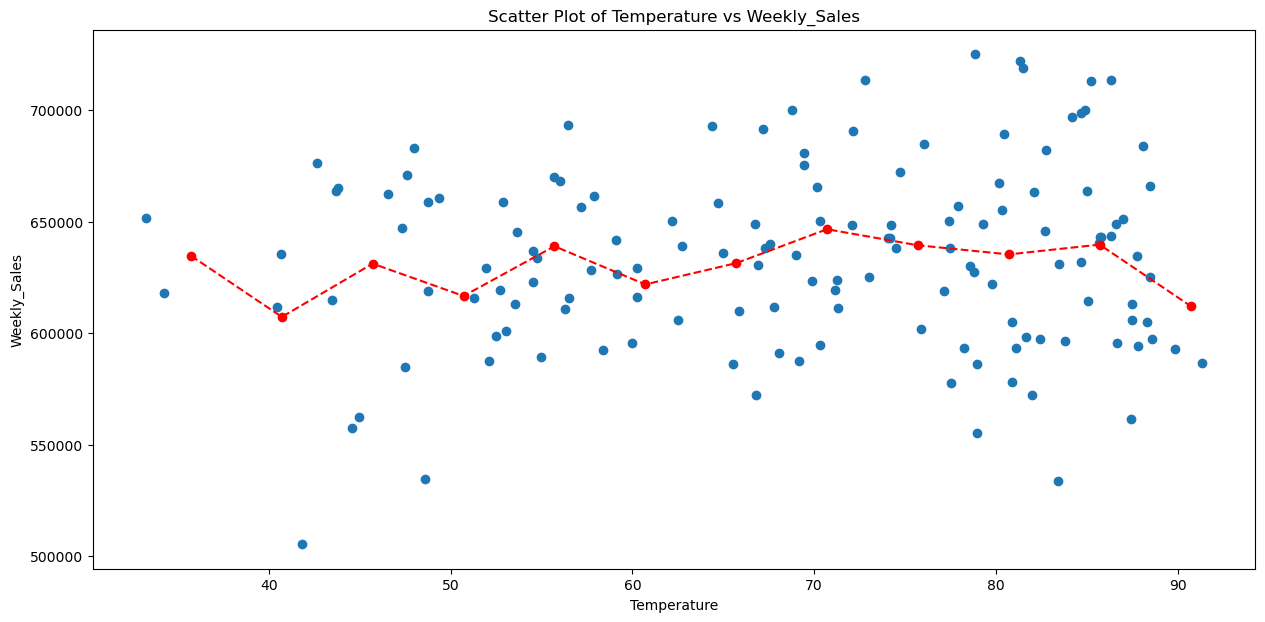

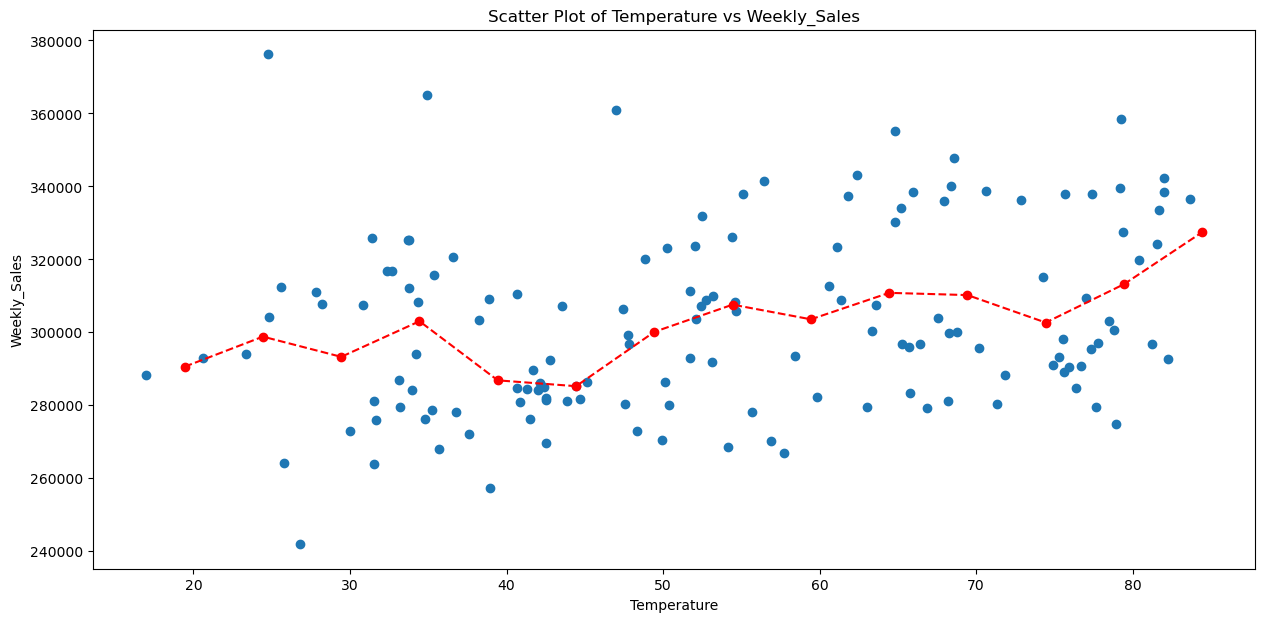

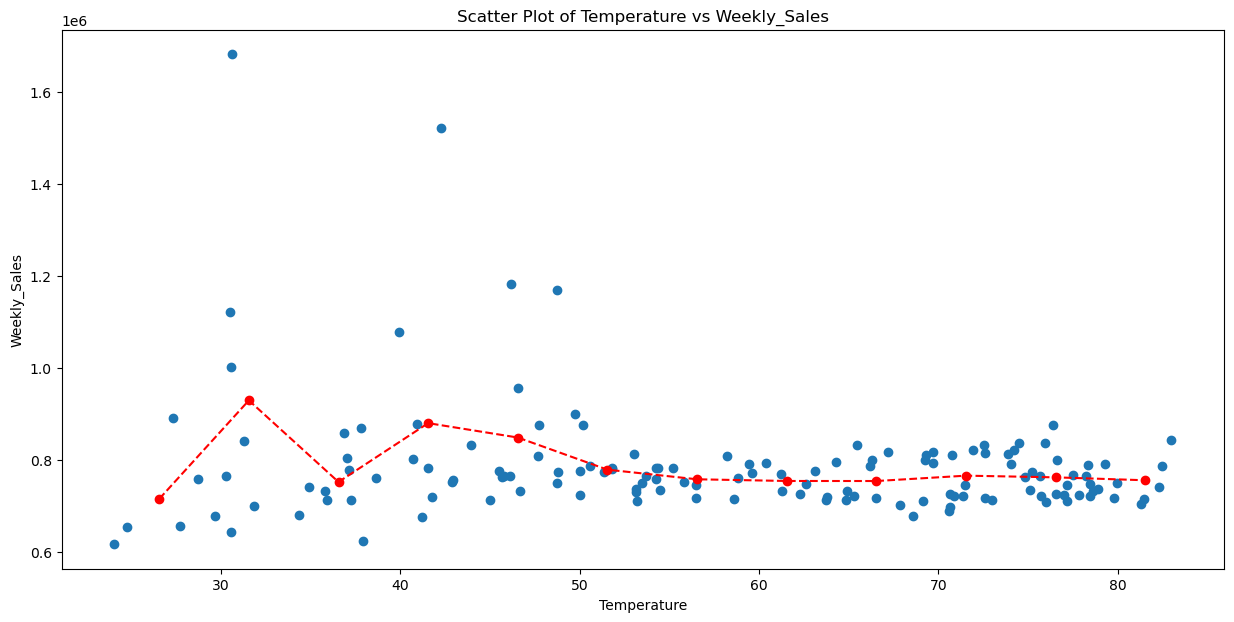

In [32]:

for store_id in range(1, 46):
    b1 = b.loc[store_id][['Temperature', 'Weekly_Sales']]
  

    plt.figure(figsize=(15, 7))
    # Define temperature bins
    temperature_bins = np.arange(b1['Temperature'].min(), b1['Temperature'].max(), 5)

    # Calculate average weekly sales for each temperature bin
    average_sales_per_bin = [b1[(b1['Temperature'] >= temp) & (b1['Temperature'] < temp + 5)]['Weekly_Sales'].mean() for temp in temperature_bins]
    plt.scatter(b1['Temperature'], b1['Weekly_Sales'])
    plt.plot(temperature_bins + 2.5, average_sales_per_bin, color='r', linestyle='--', marker='o', label='Average Sales')

    plt.xlabel('Temperature')
    plt.ylabel('Weekly_Sales')
    plt.title('Scatter Plot of Temperature vs Weekly_Sales')
    plt.show()

### pattern of each store for temp vs weekly Sales

In [33]:
c = final_one[["Date", "Fuel_Price", "Store", "Weekly_Sales"]].groupby(["Store", "Date"]).agg({"Fuel_Price": "first", "Weekly_Sales": "sum"}).sort_values(by="Fuel_Price")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(c)

                  Fuel_Price  Weekly_Sales
Store Date                                
36    2010-02-19       2.472     470281.03
      2010-10-09       2.513     434471.38
21    2010-02-19       2.514     867283.25
37    2010-02-19       2.514     510382.50
30    2010-02-19       2.514     463513.26
9     2010-02-19       2.514     511327.90
43    2010-02-19       2.514     658997.55
39    2010-02-19       2.514    1230591.97
11    2010-02-19       2.514    1503298.70
6     2010-02-19       2.514    1567138.07
2     2010-02-19       2.514    2124451.54
5     2010-02-19       2.514     303447.57
1     2010-02-19       2.514    1611968.17
3     2010-02-19       2.514     421642.19
8     2010-02-19       2.514     963960.37
31    2010-02-19       2.514    1473386.75
36    2010-02-26       2.520     447519.44
      2010-03-09       2.533     431294.45
      2010-12-02       2.539     469563.70
34    2010-02-19       2.540     983963.07
4     2010-02-19       2.540    2049860.26
36    2010-

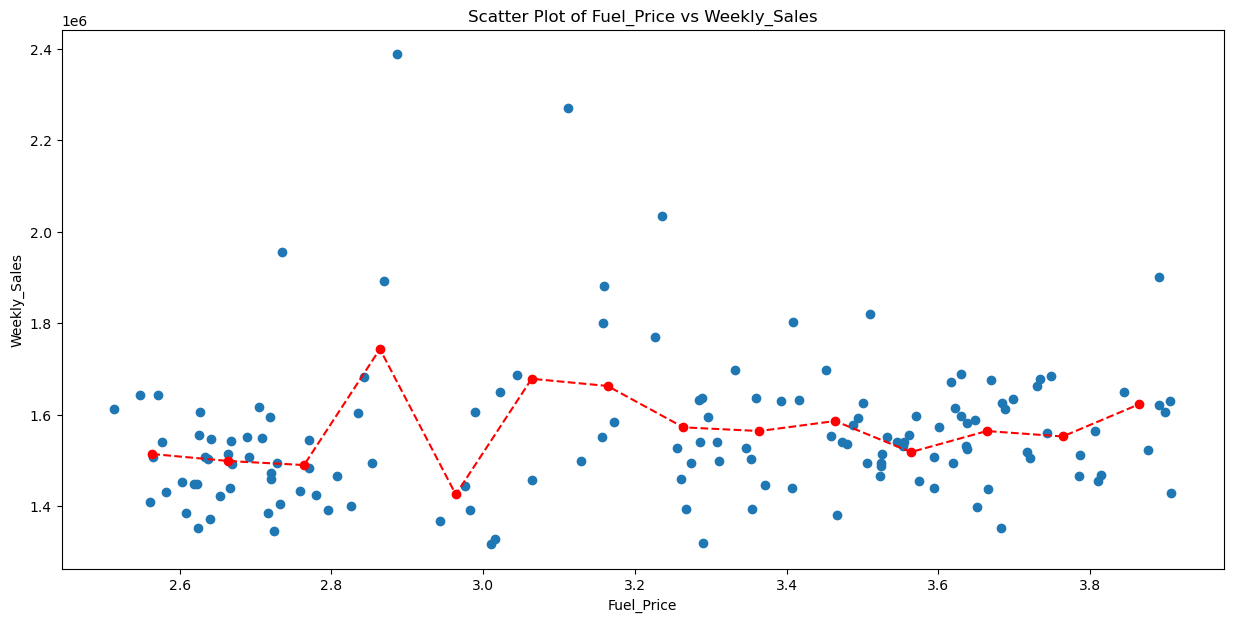

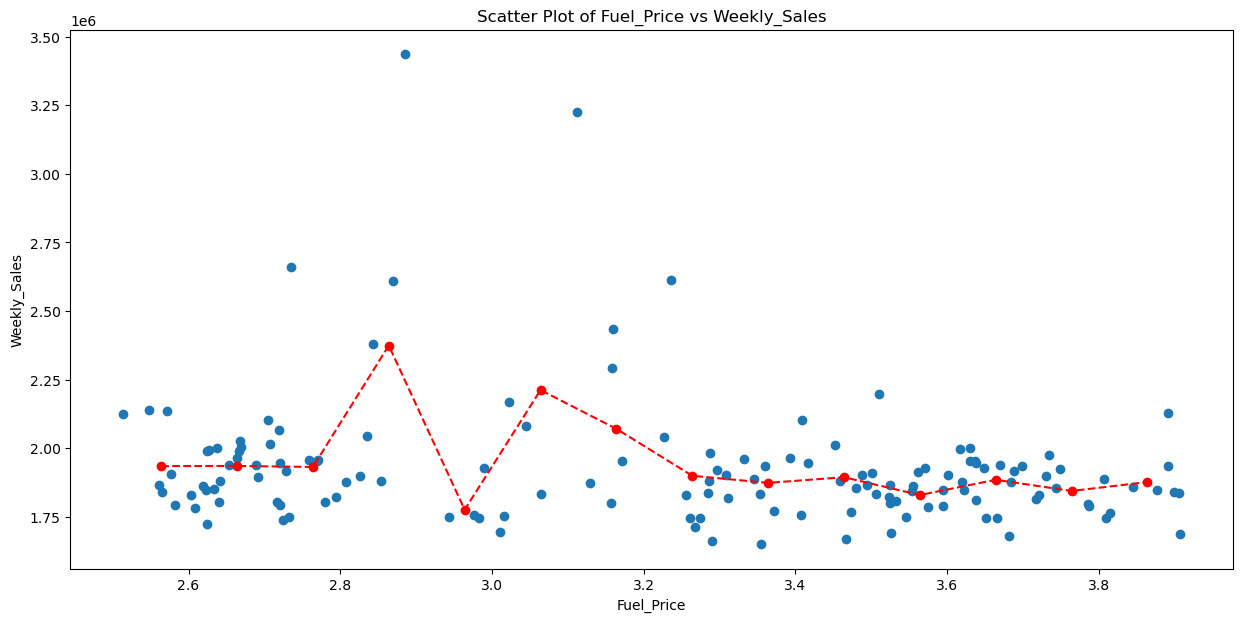

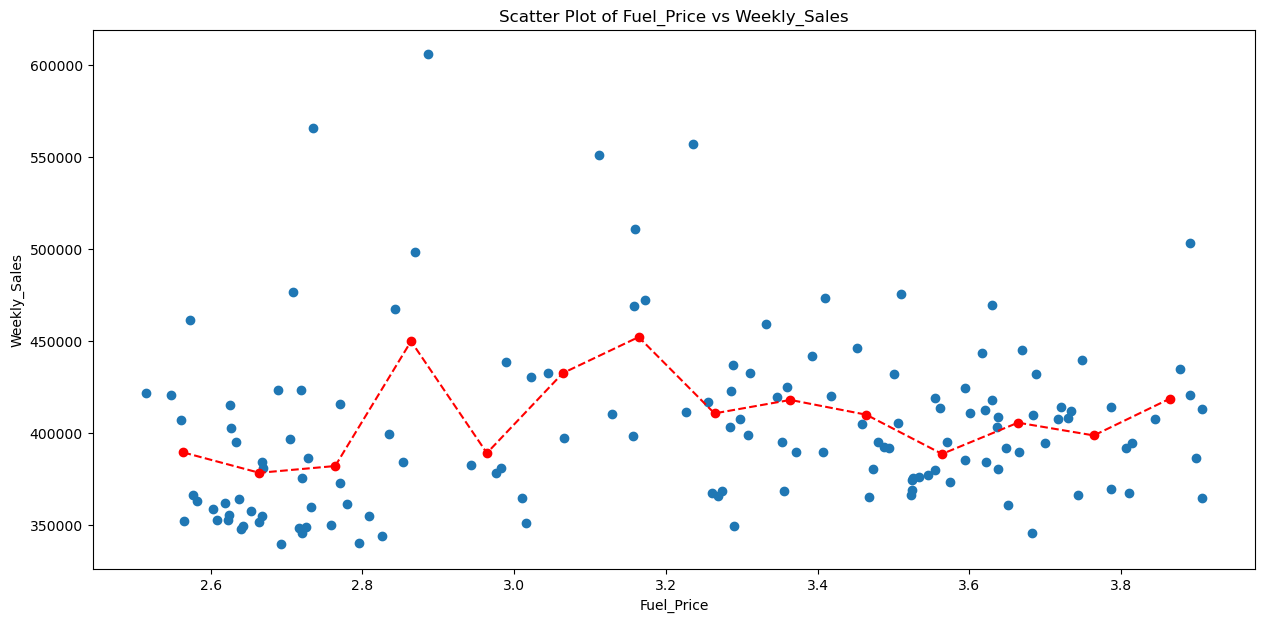

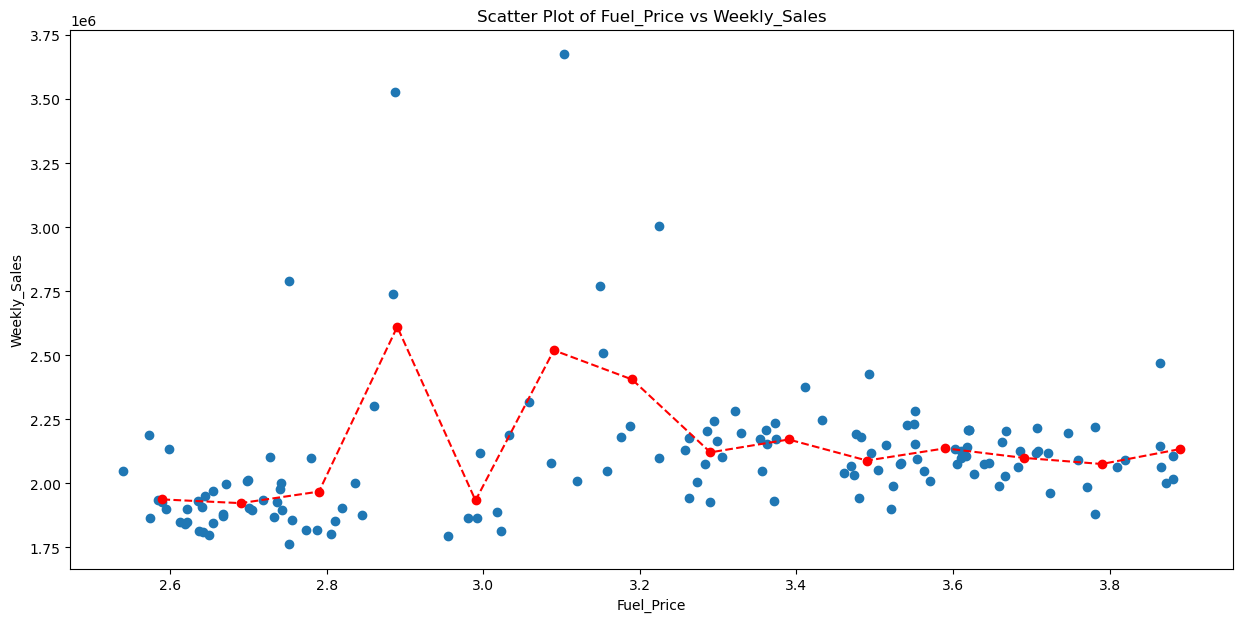

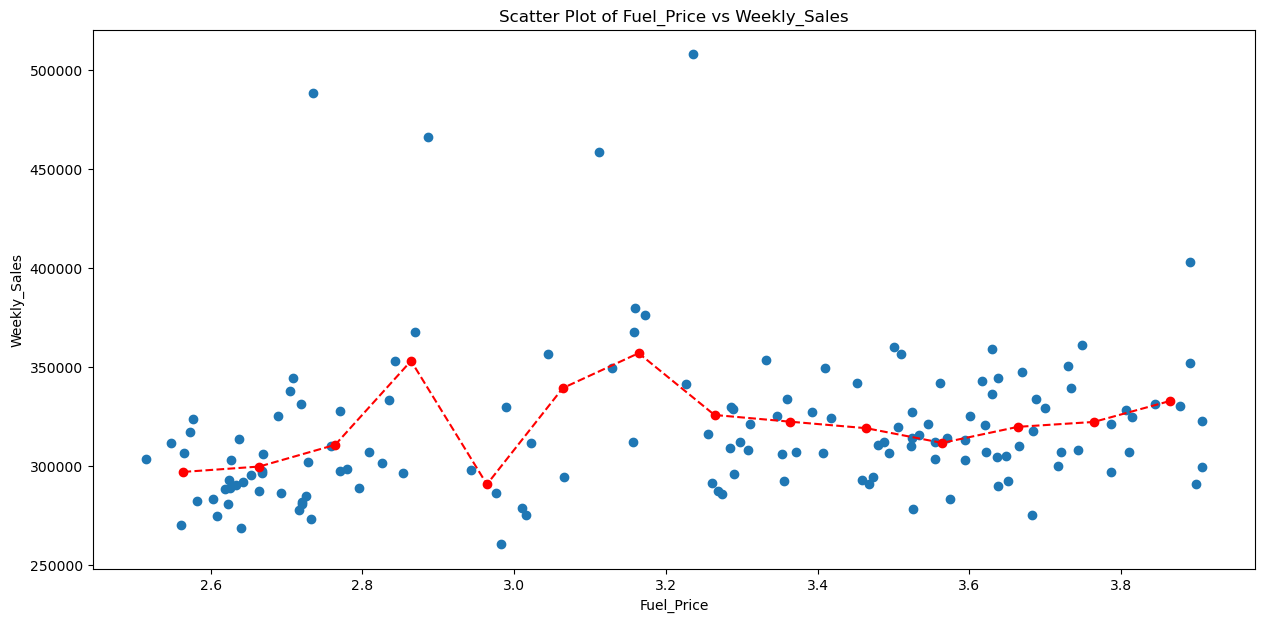

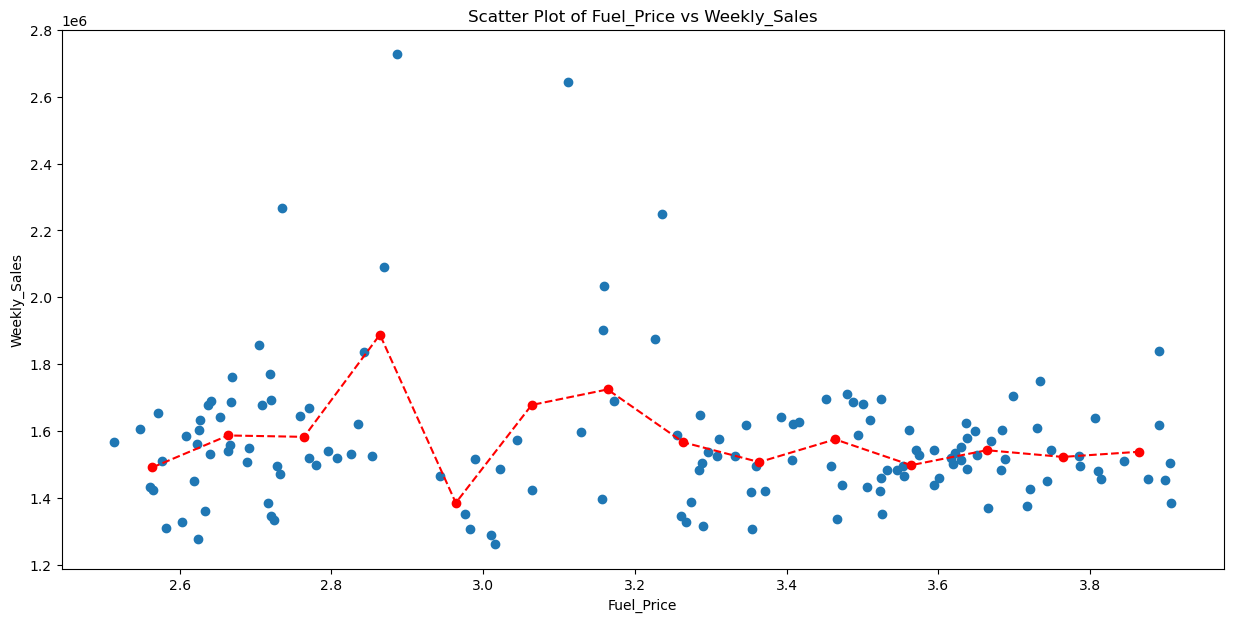

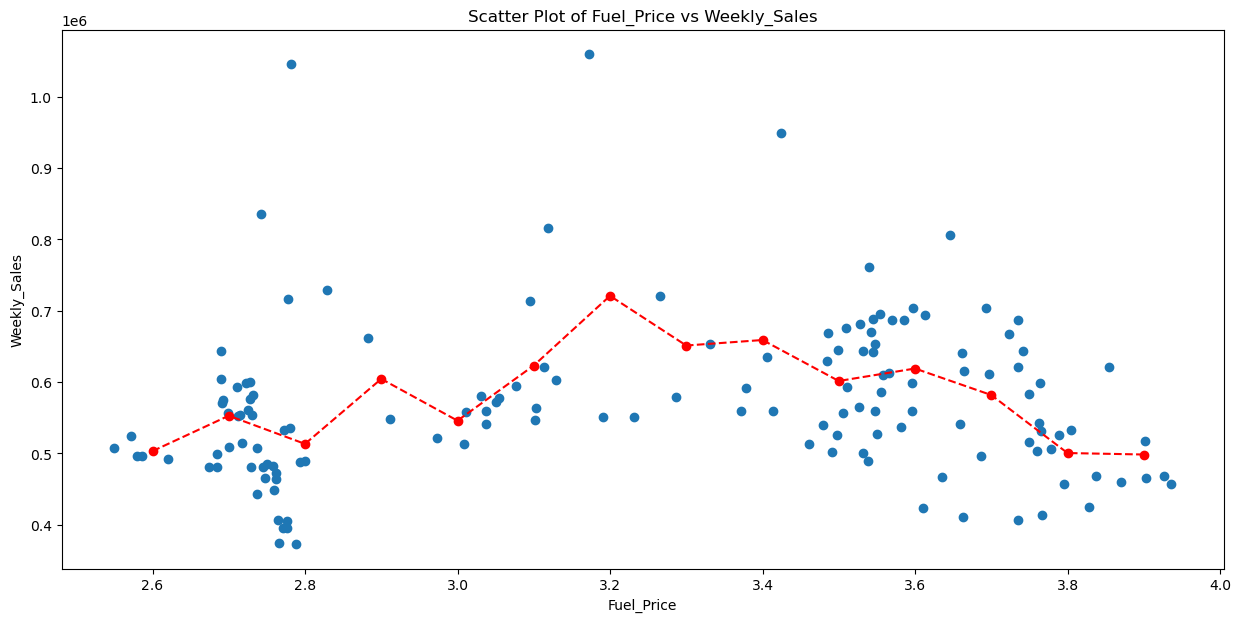

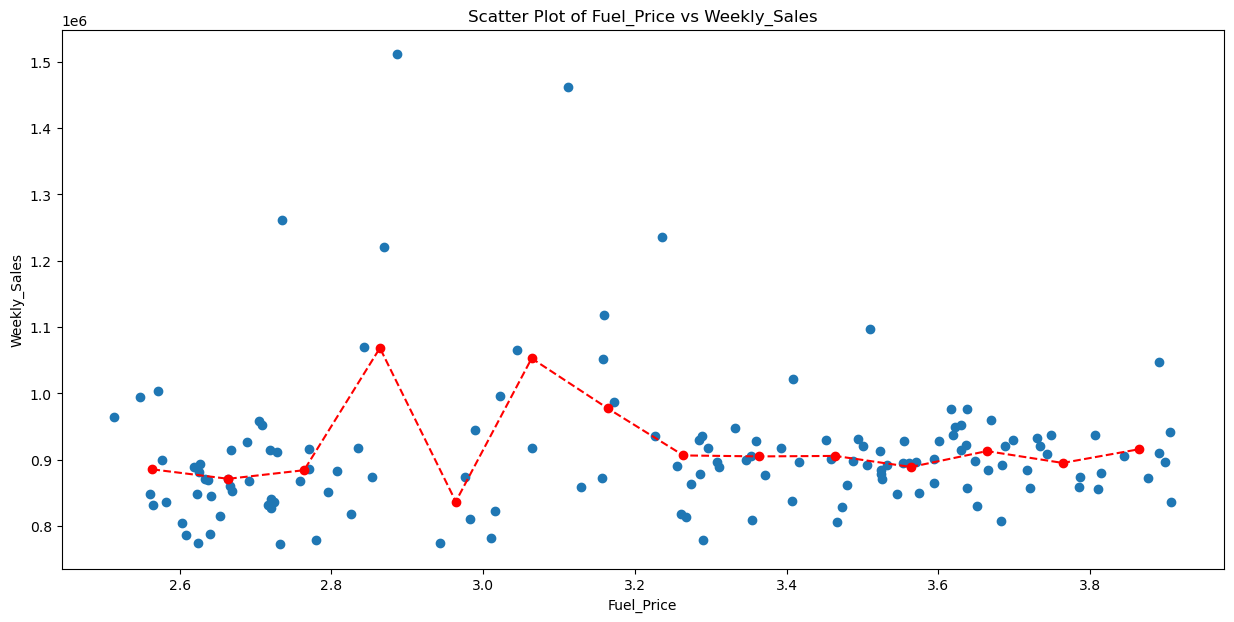

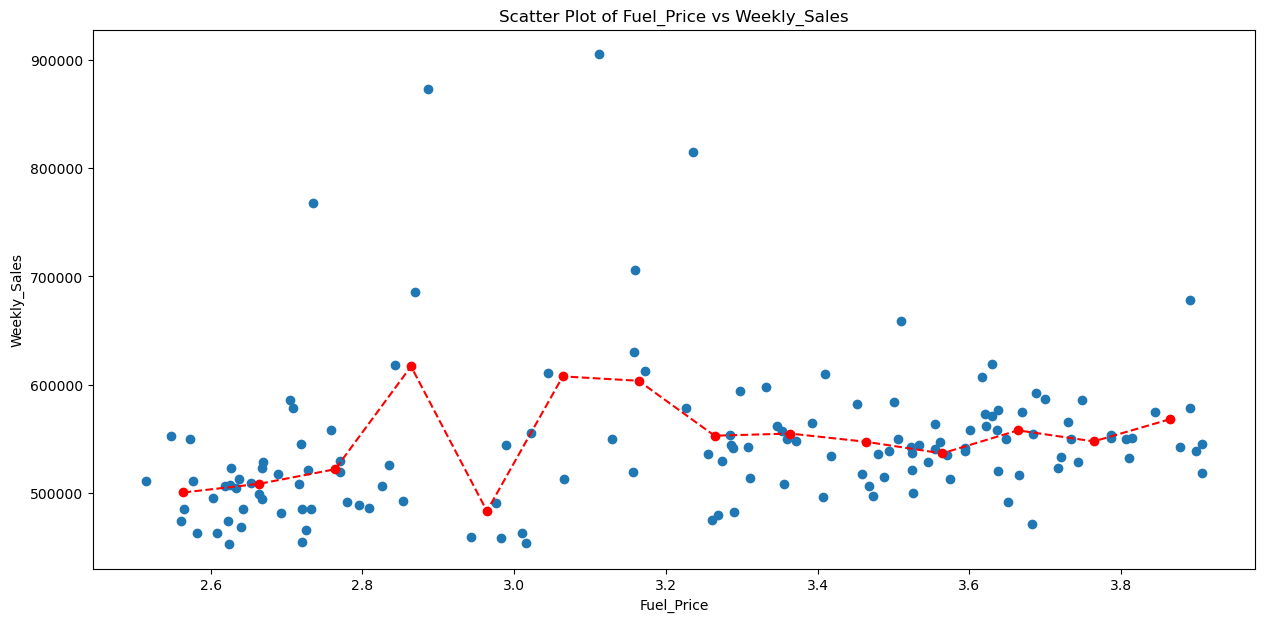

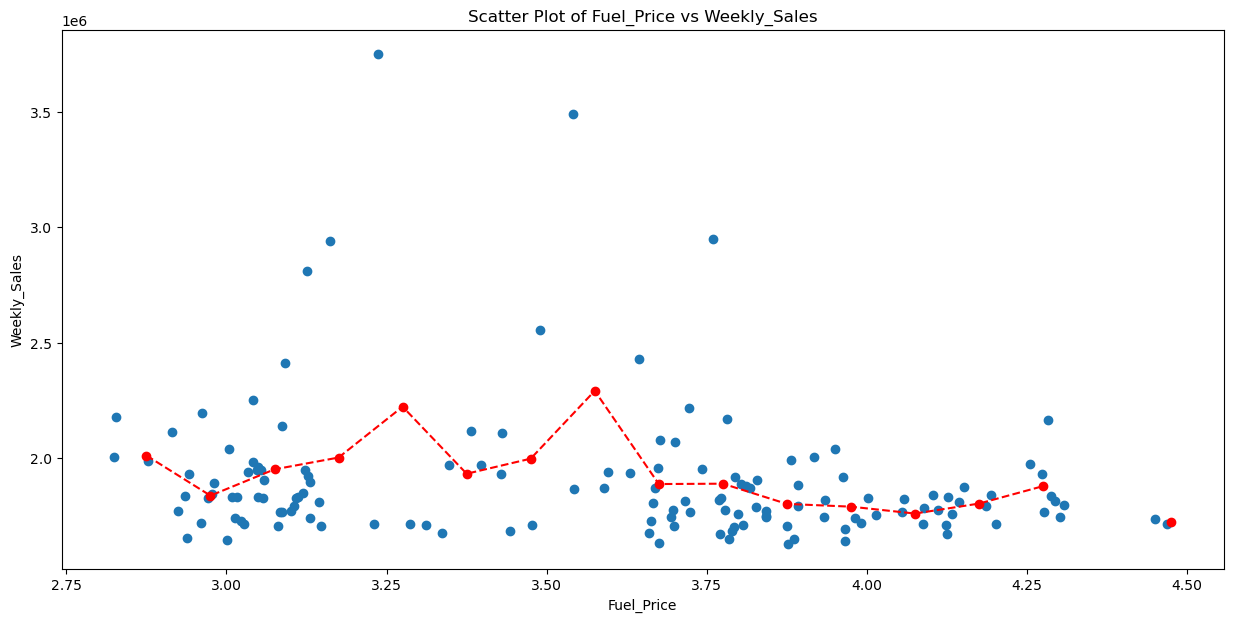

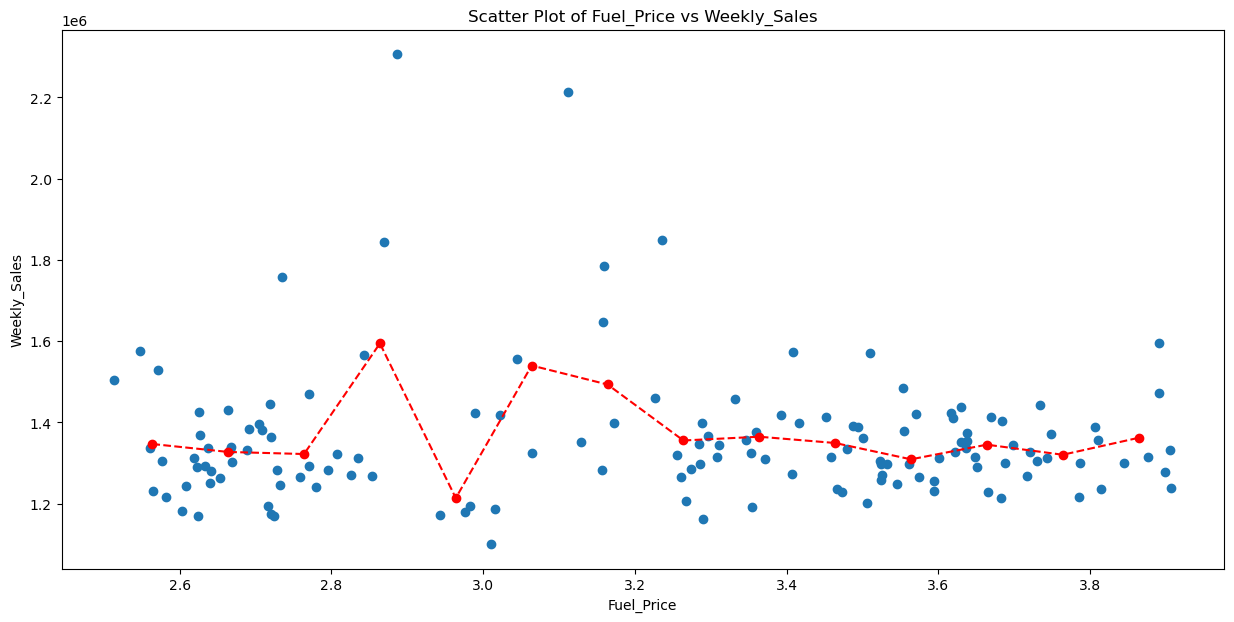

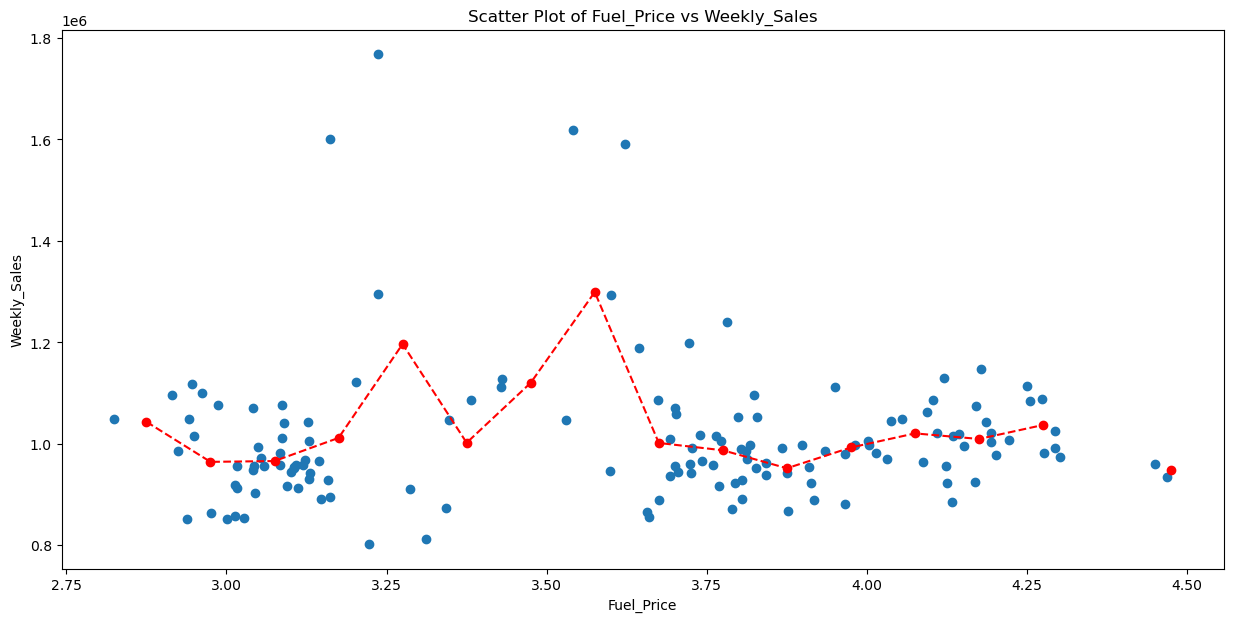

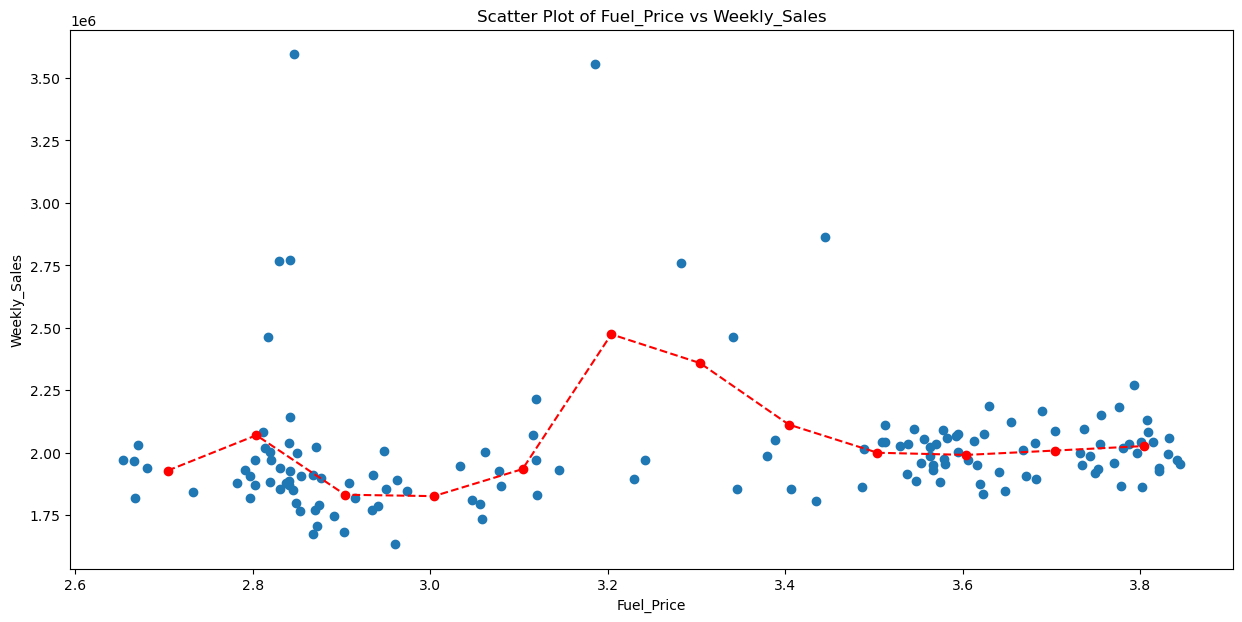

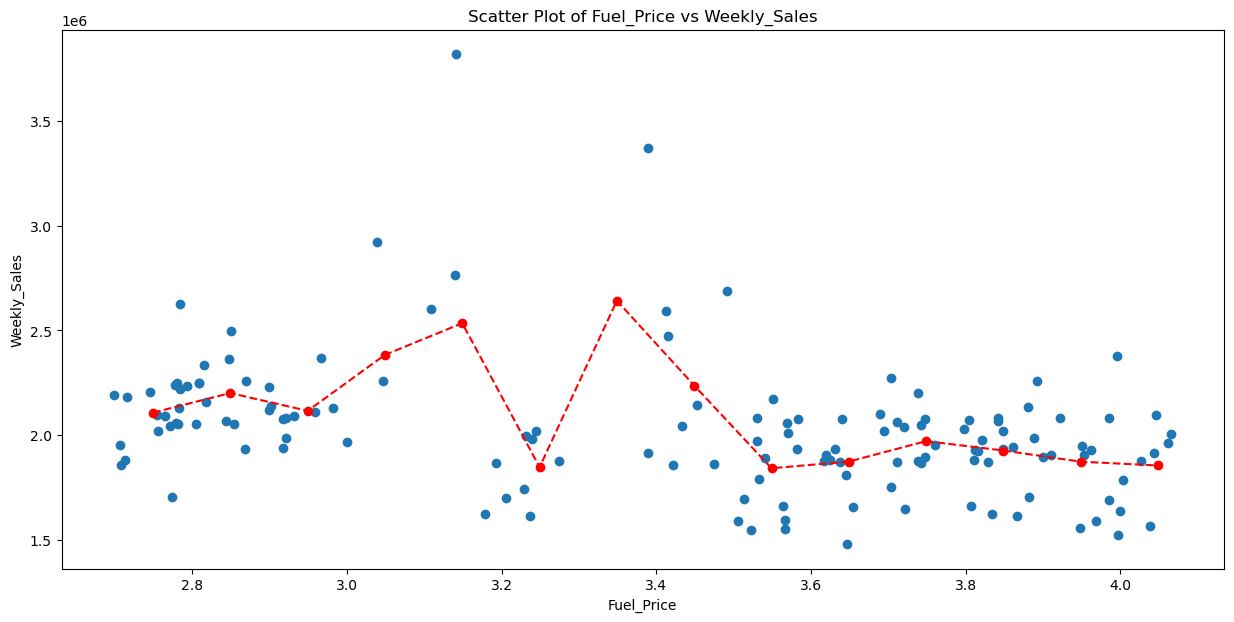

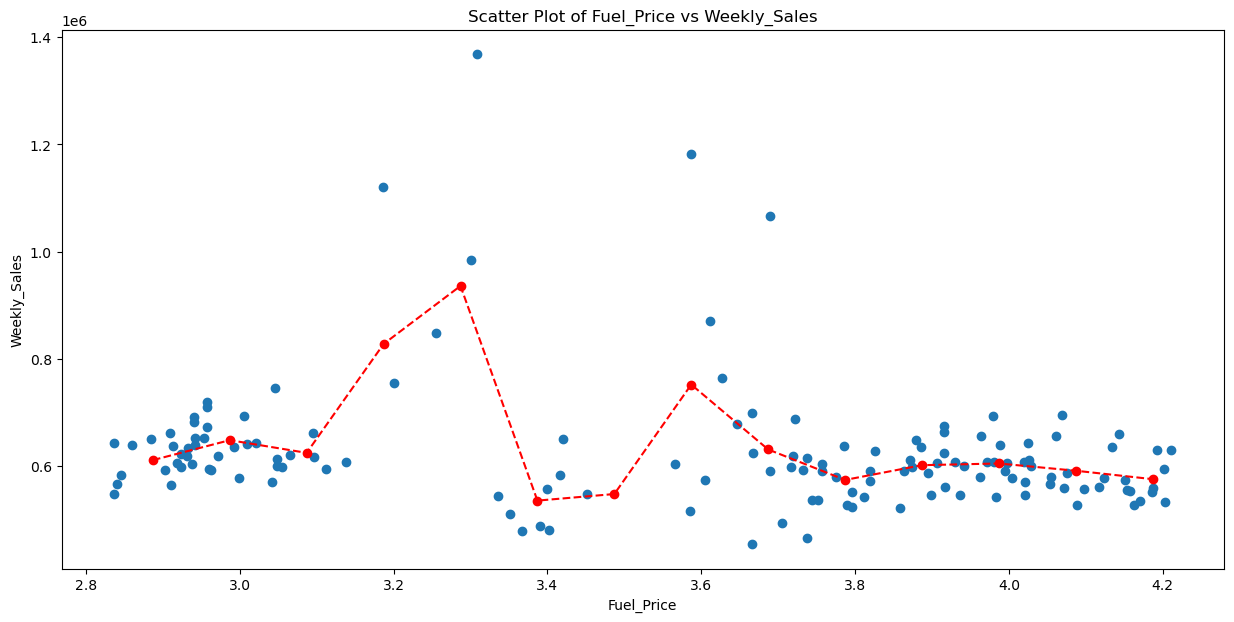

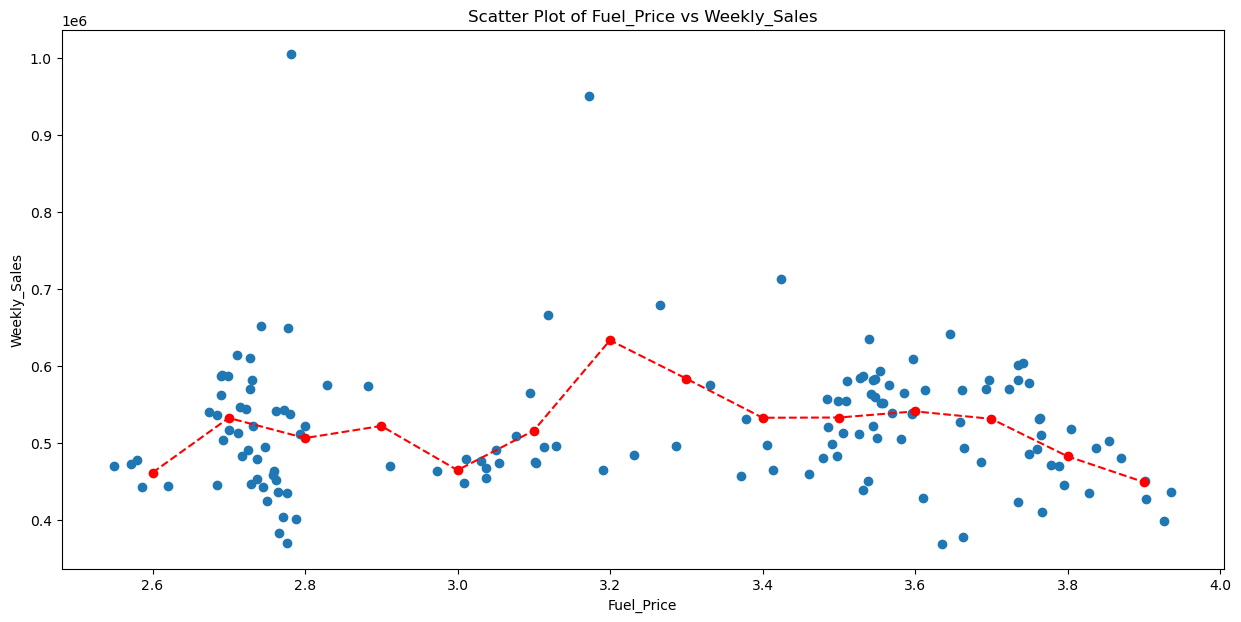

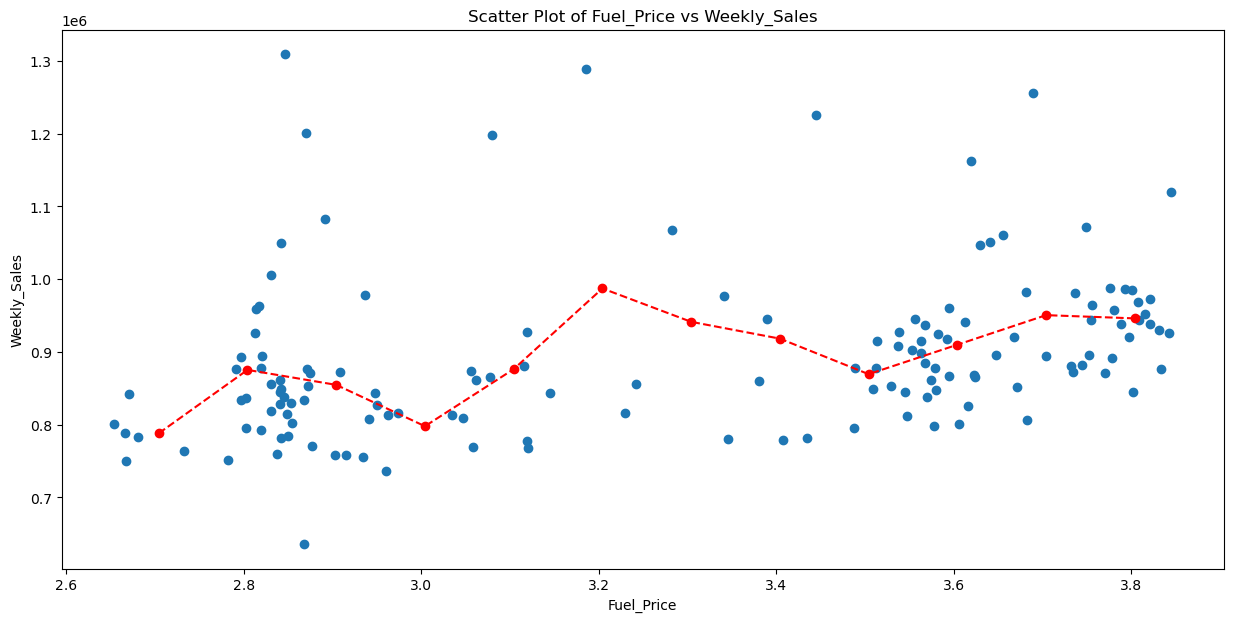

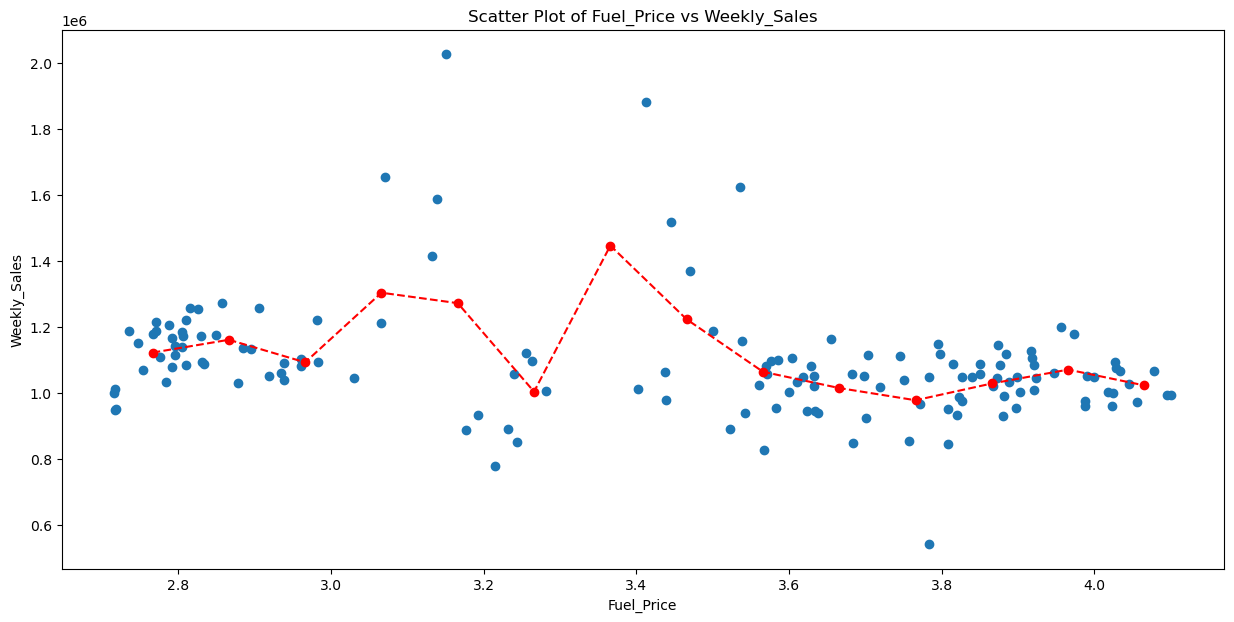

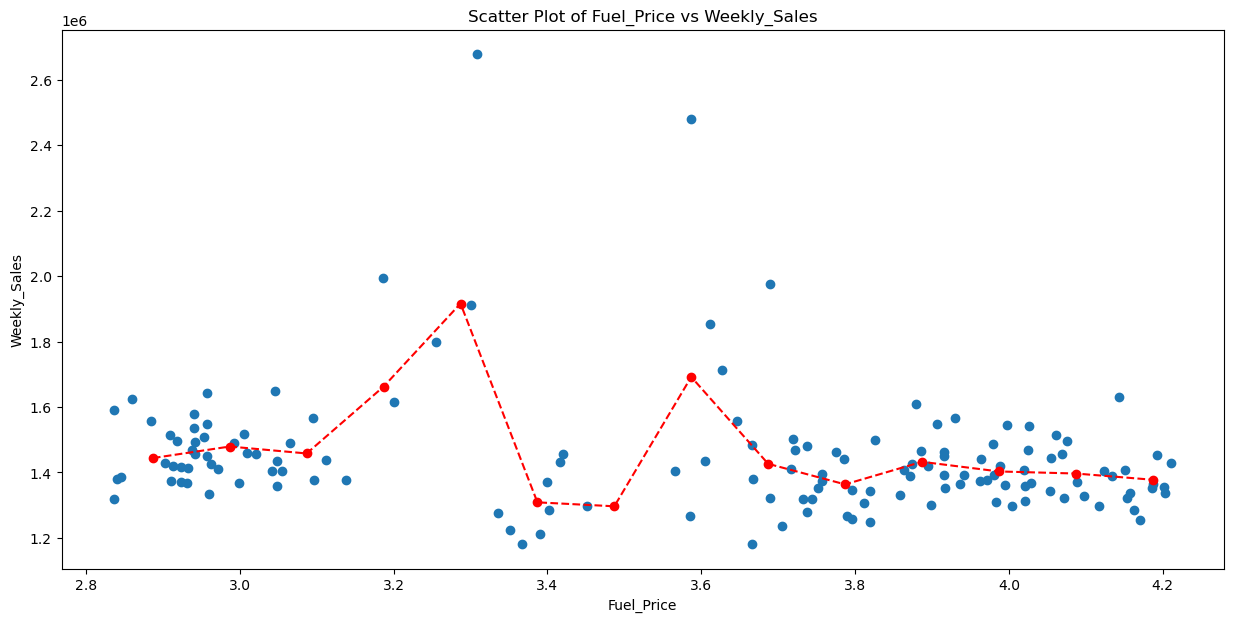

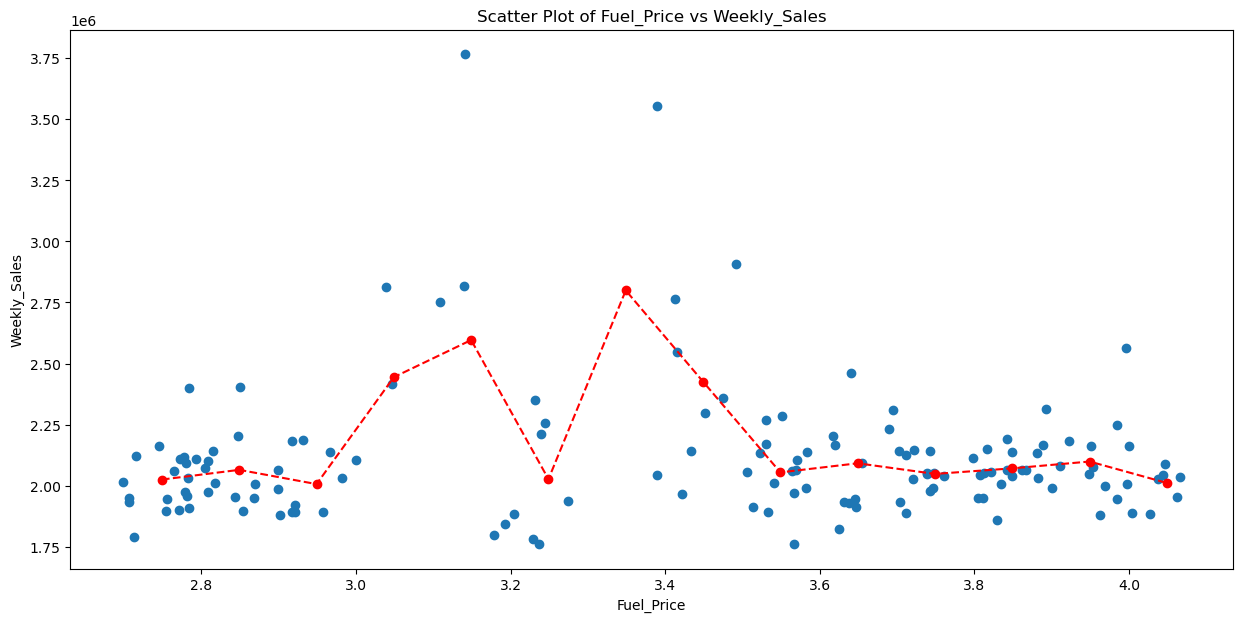

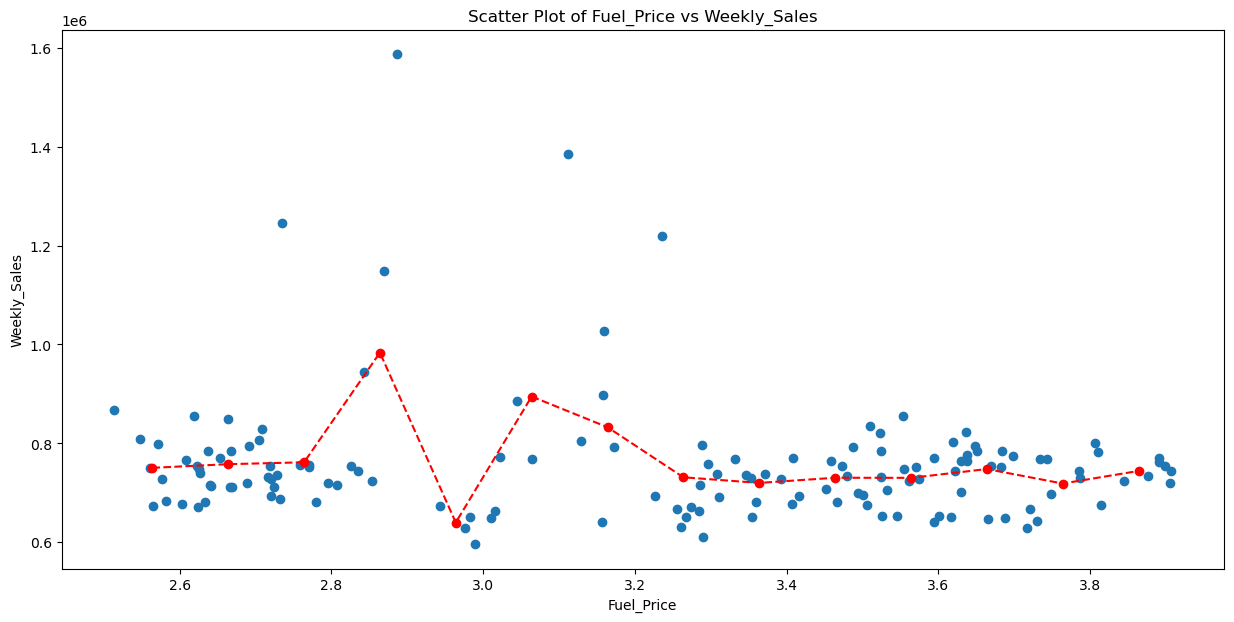

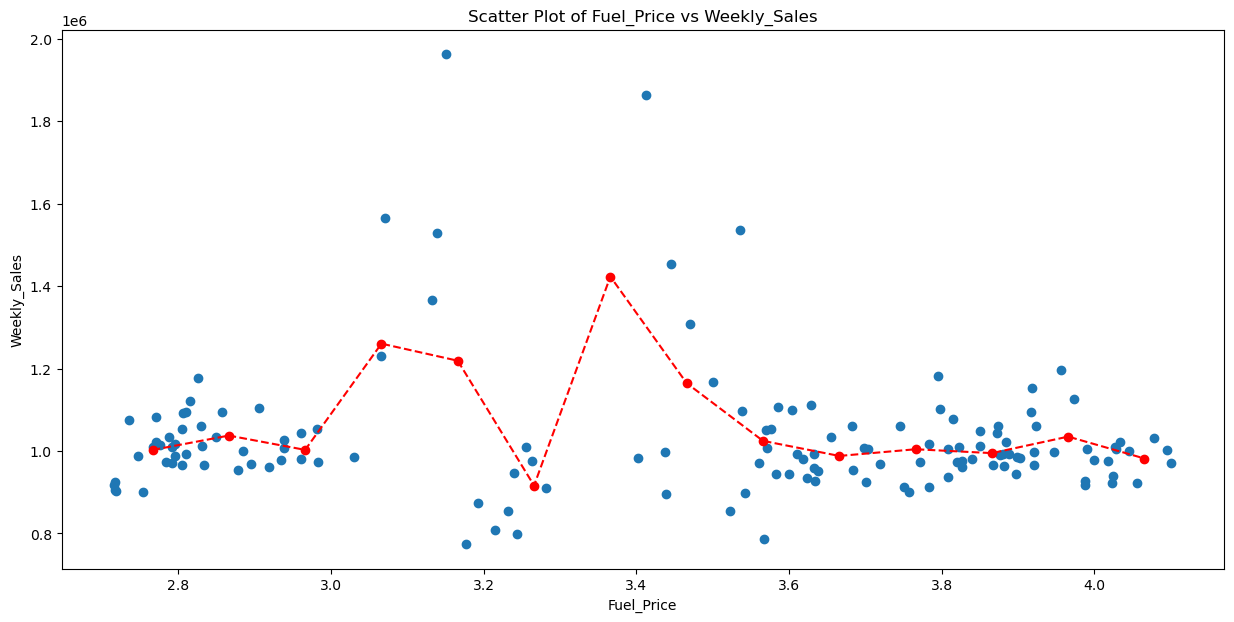

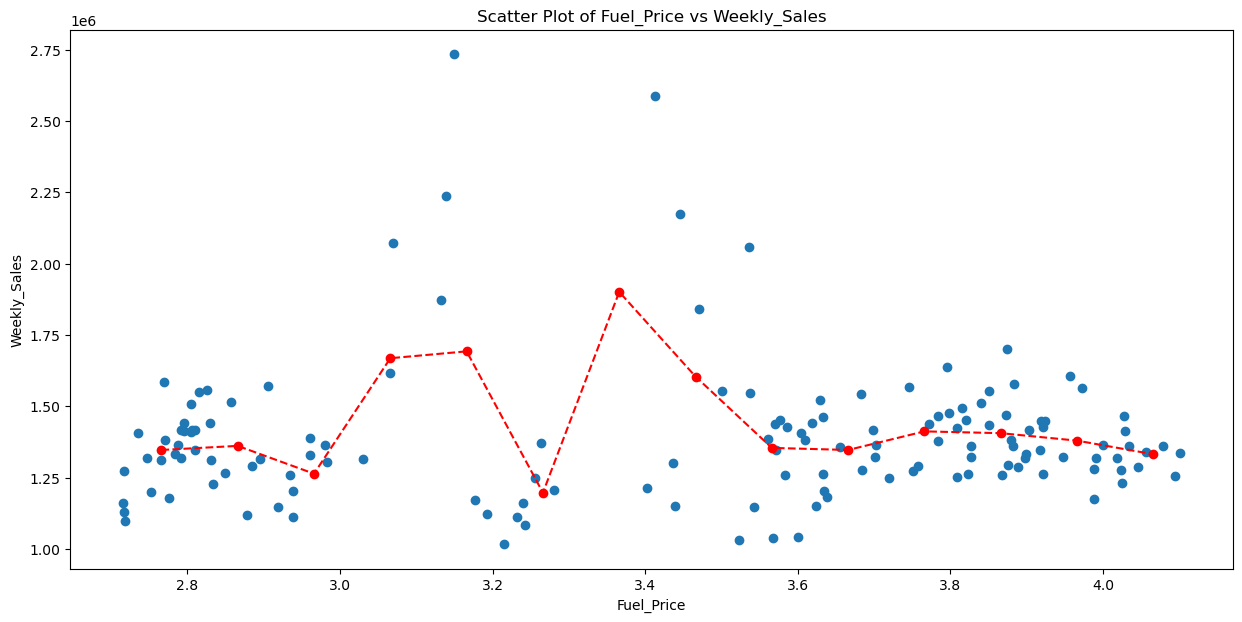

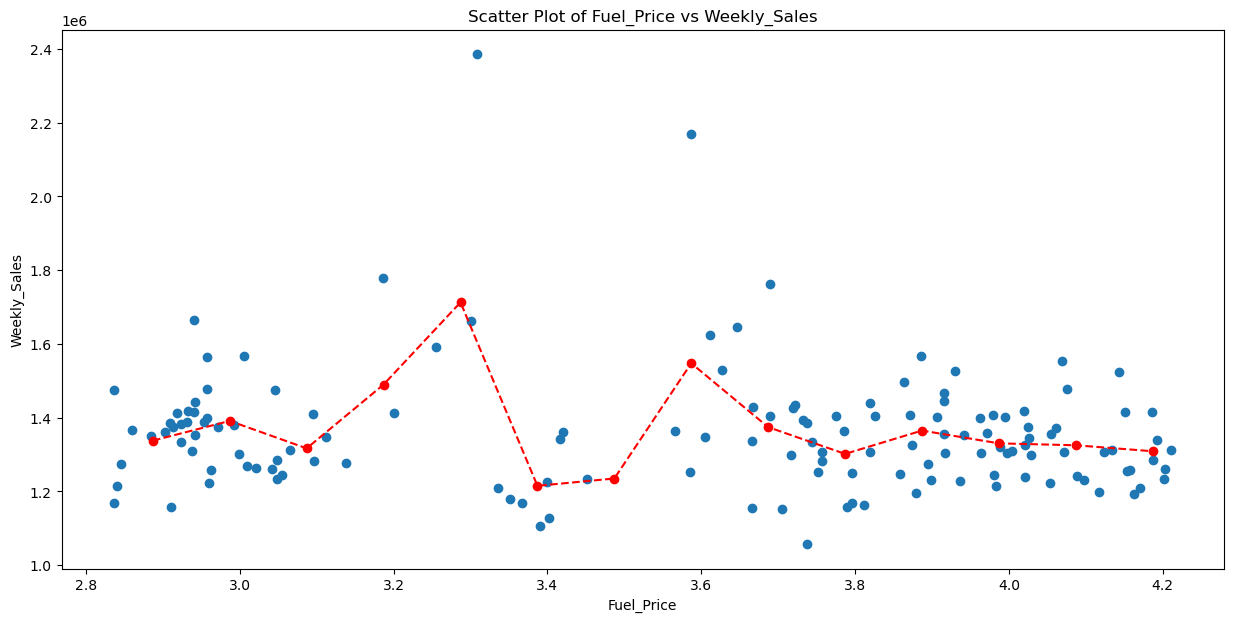

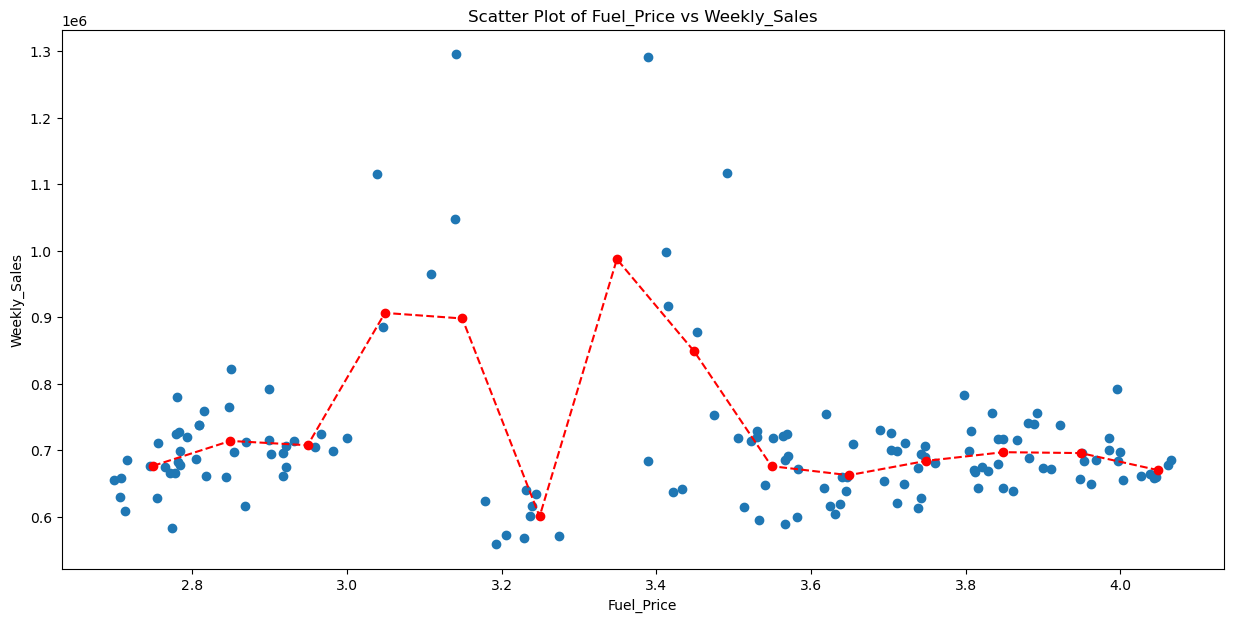

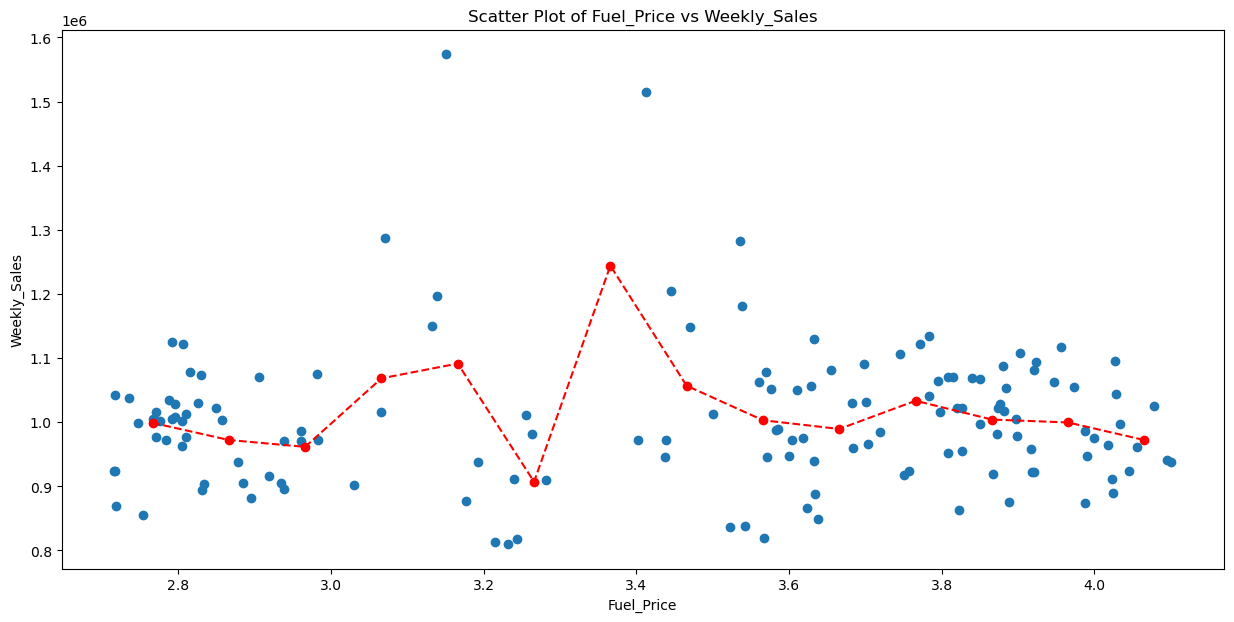

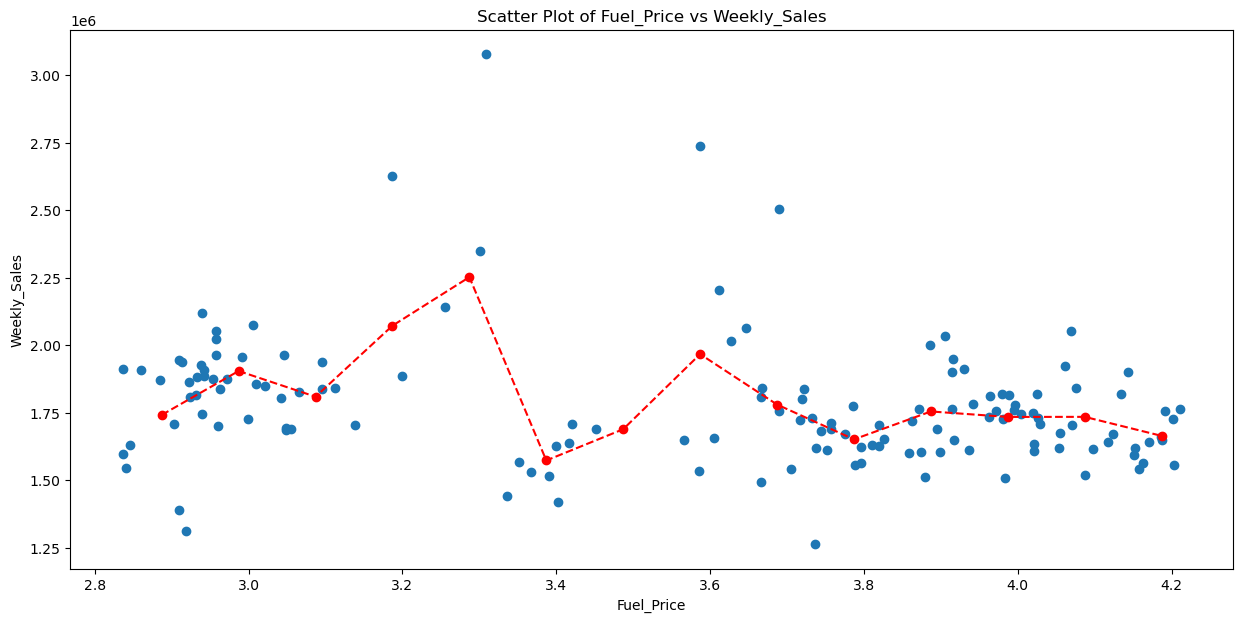

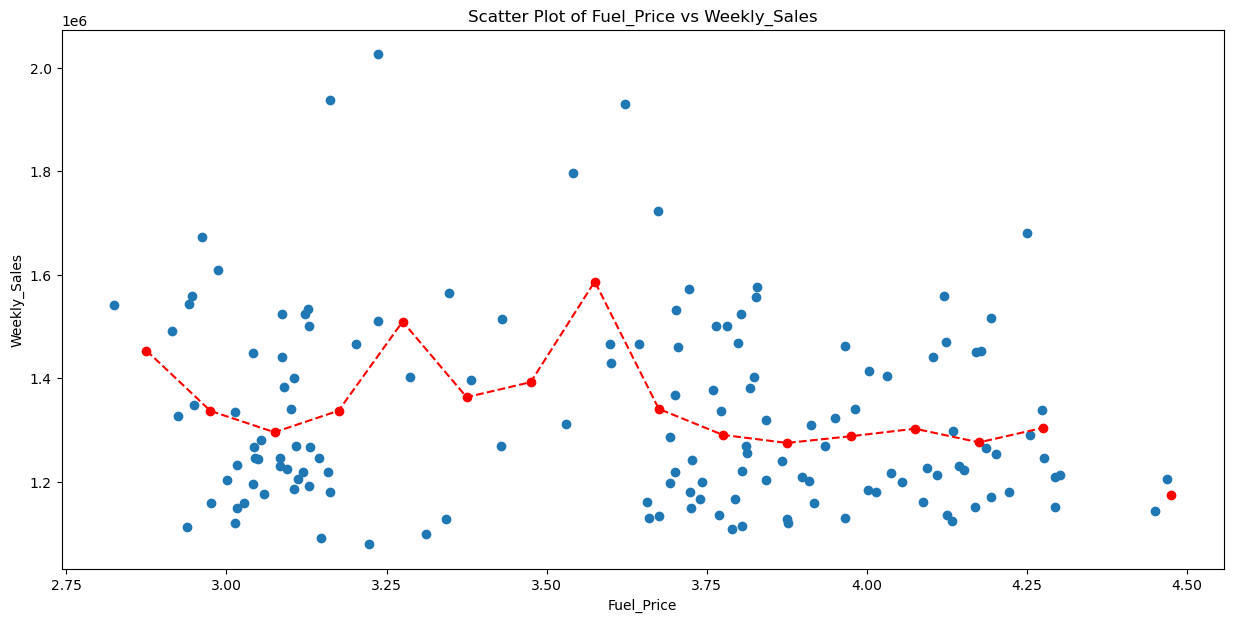

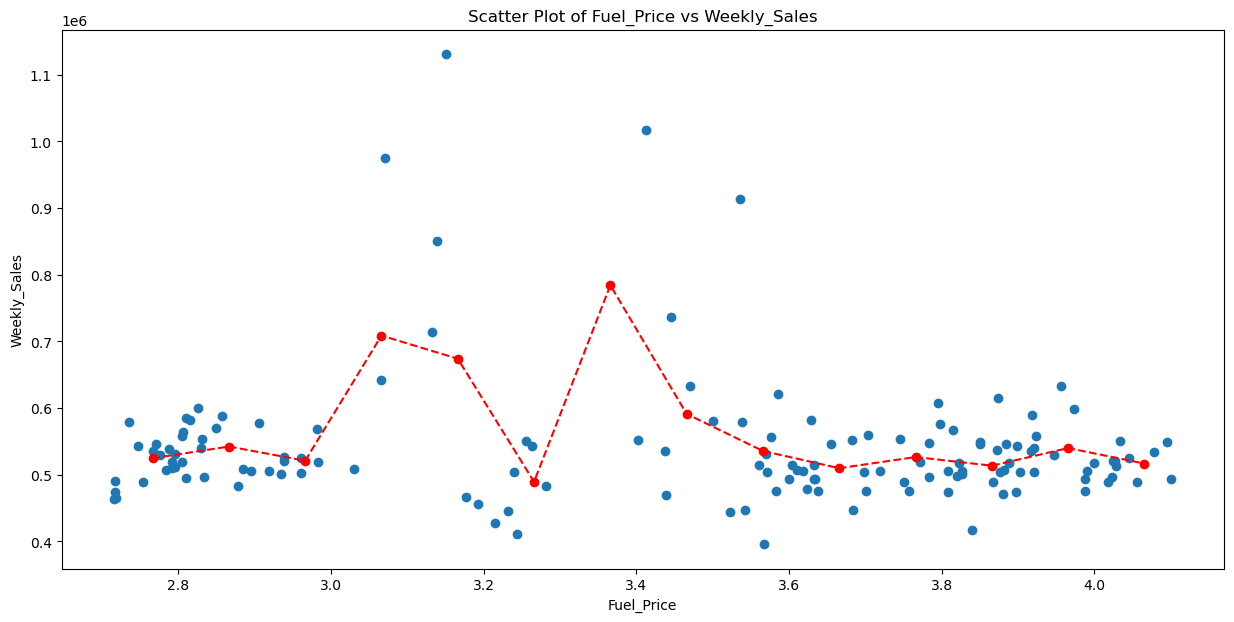

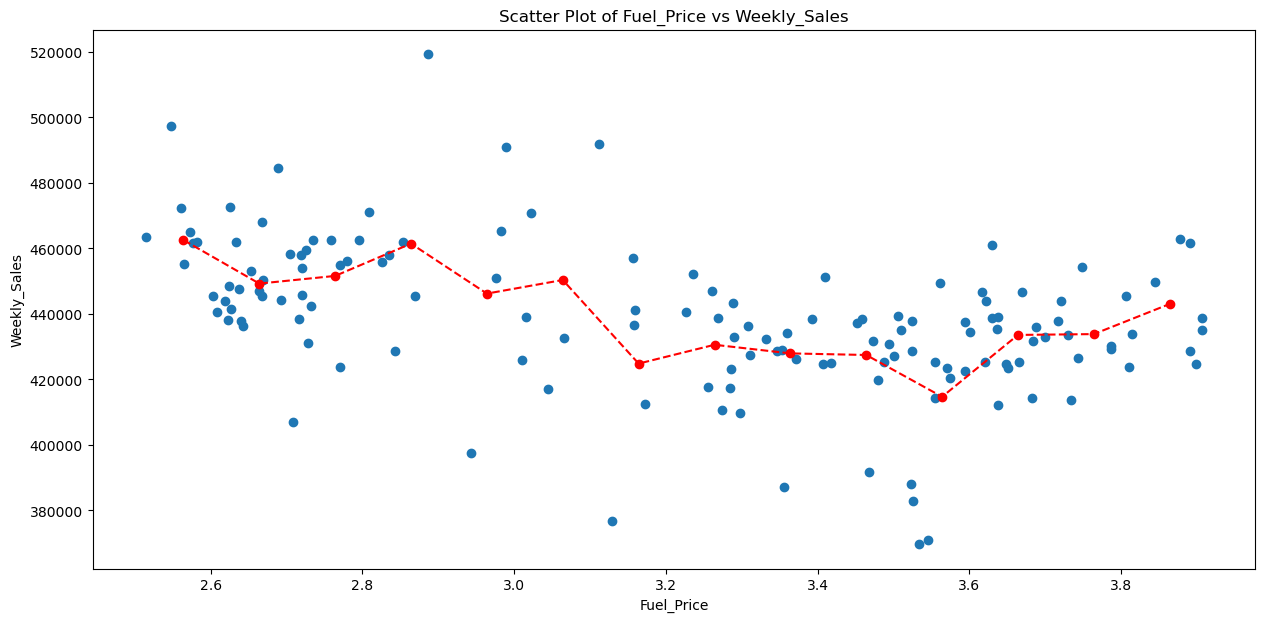

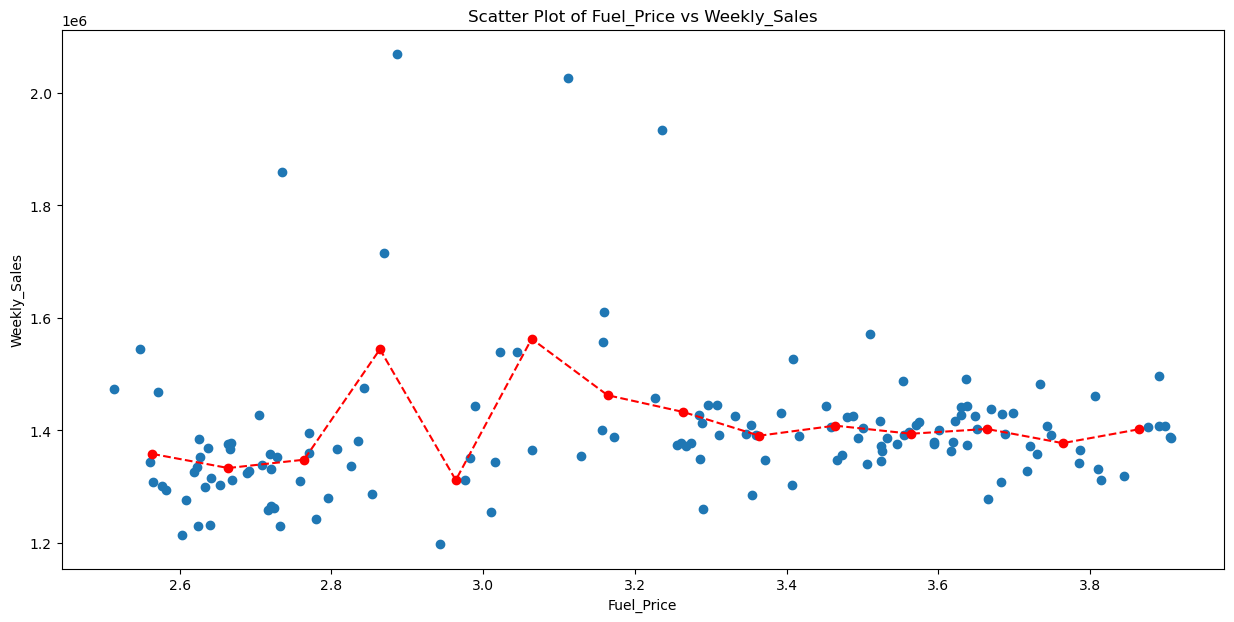

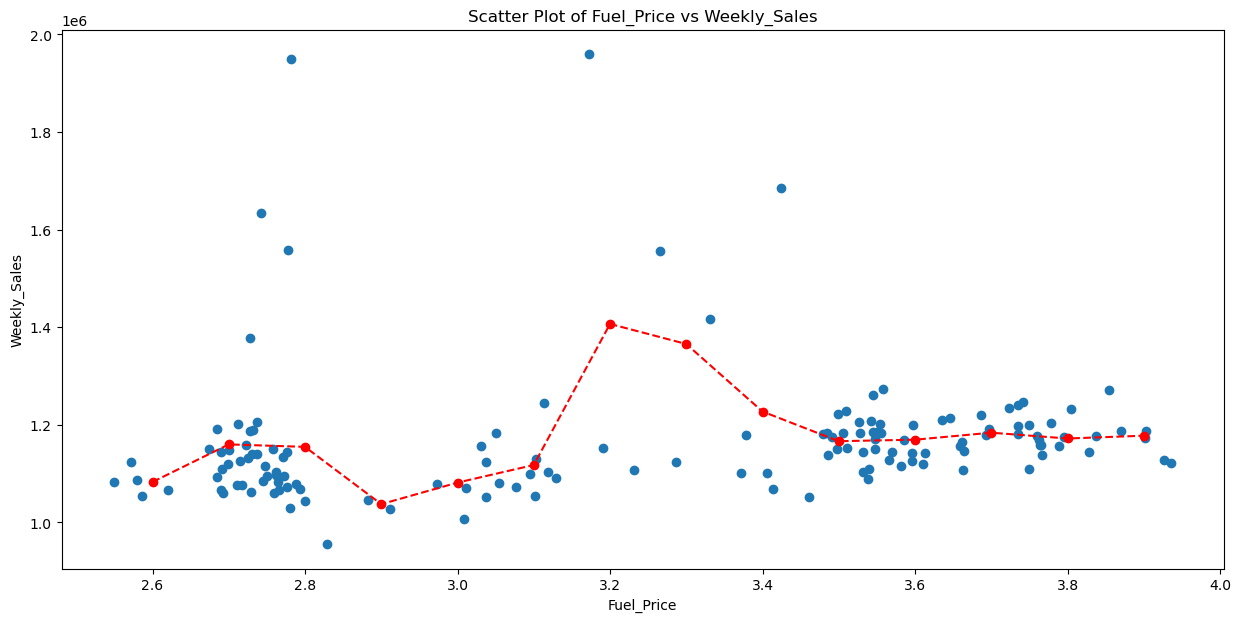

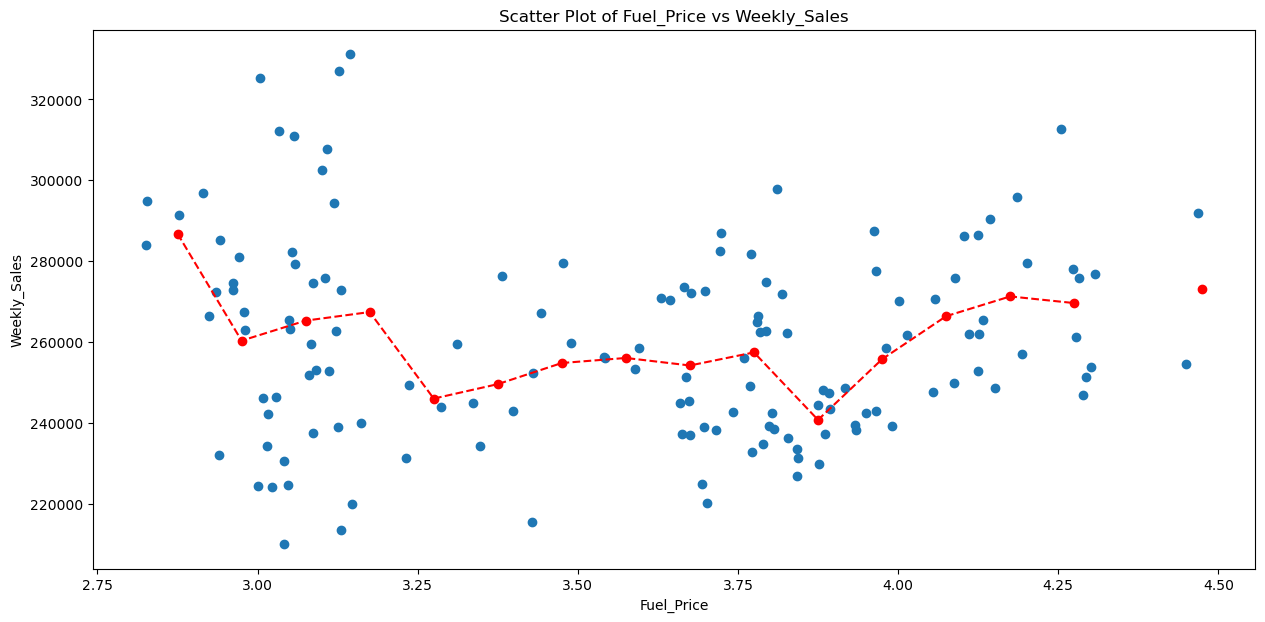

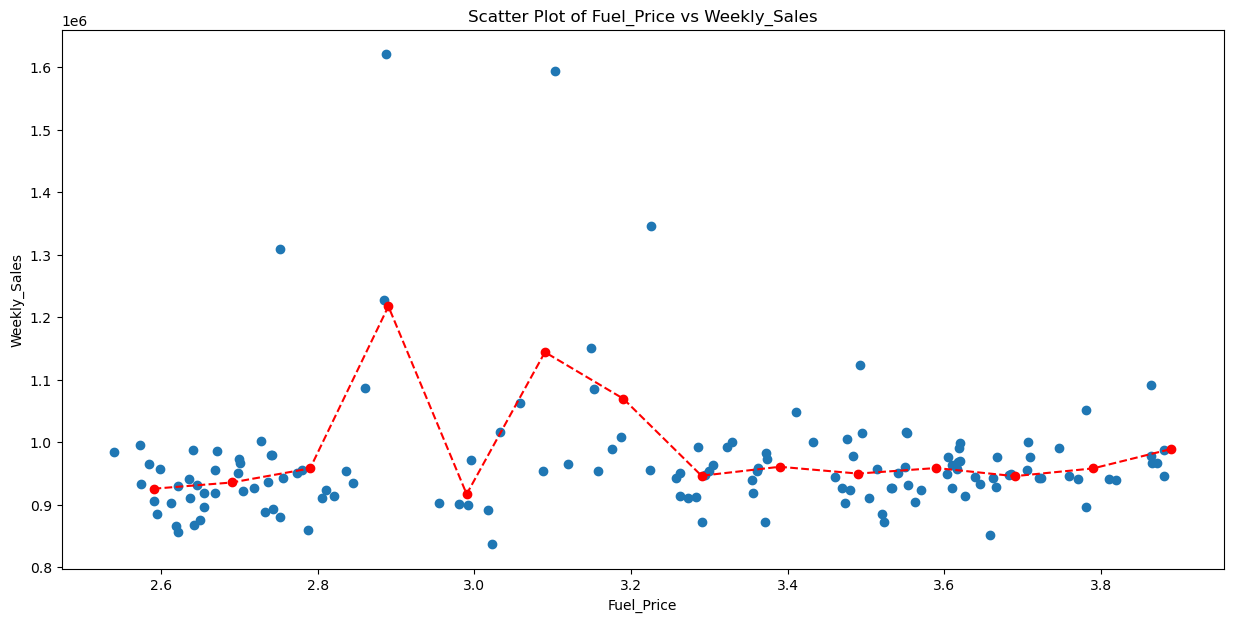

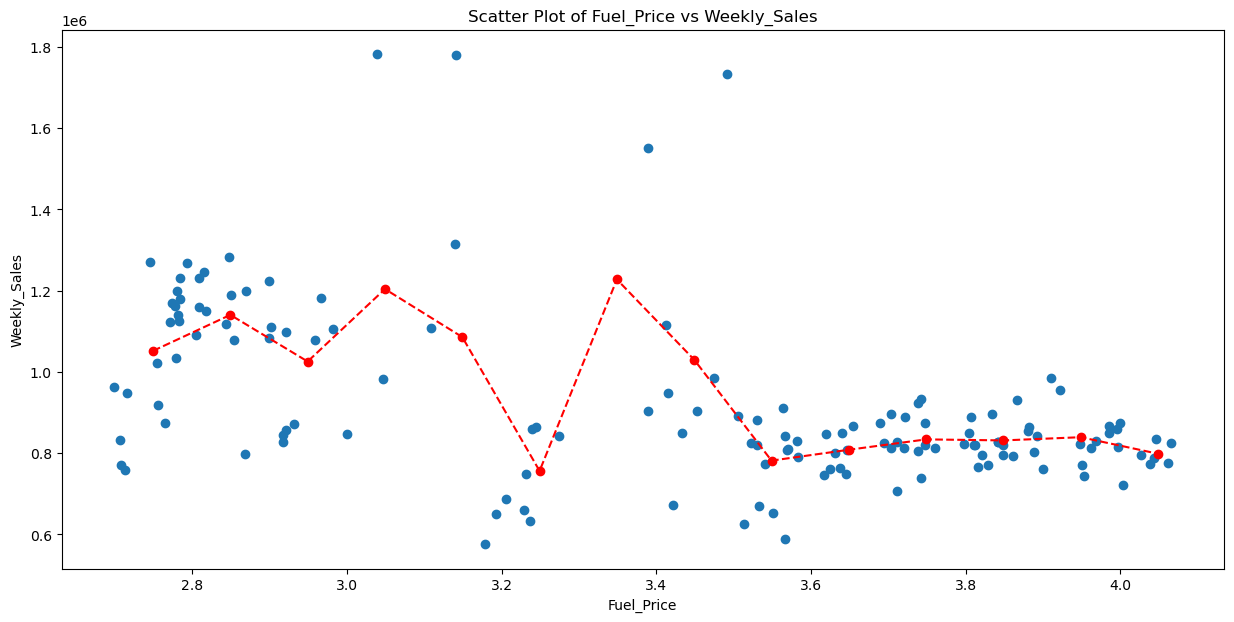

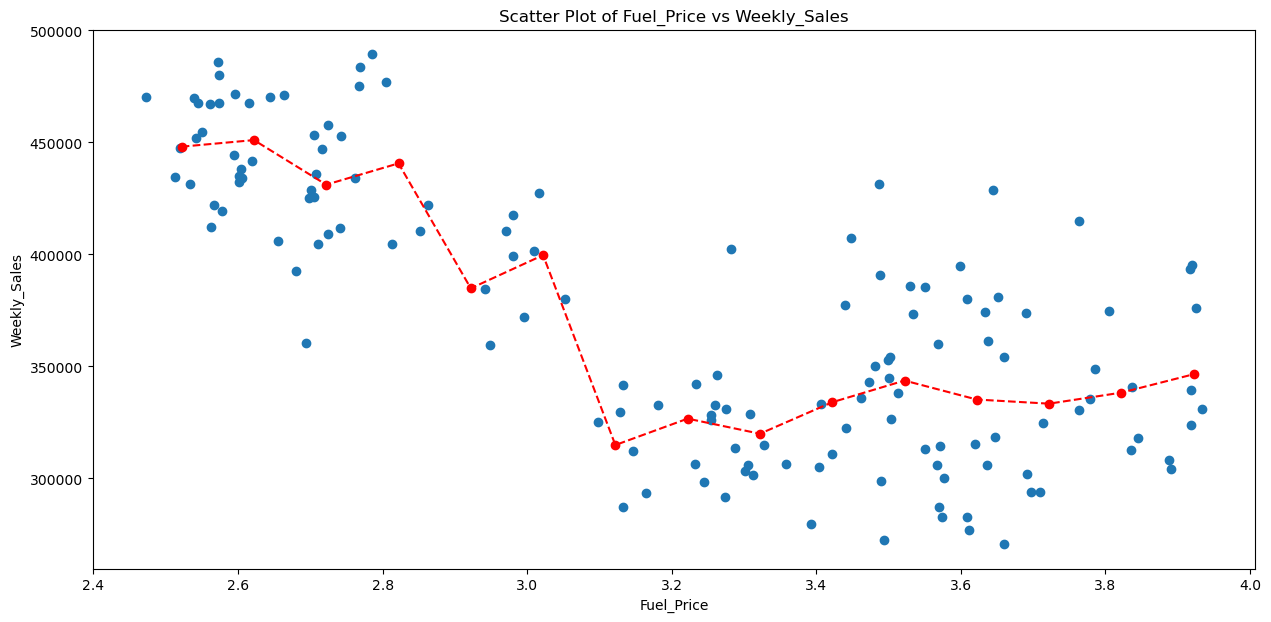

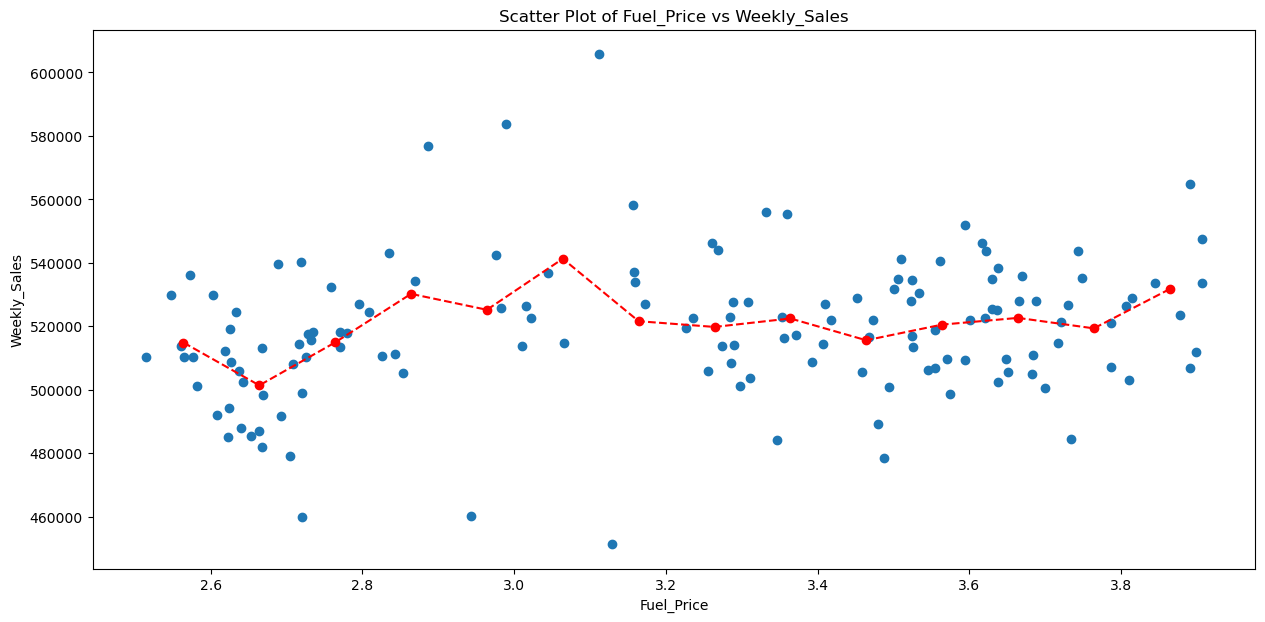

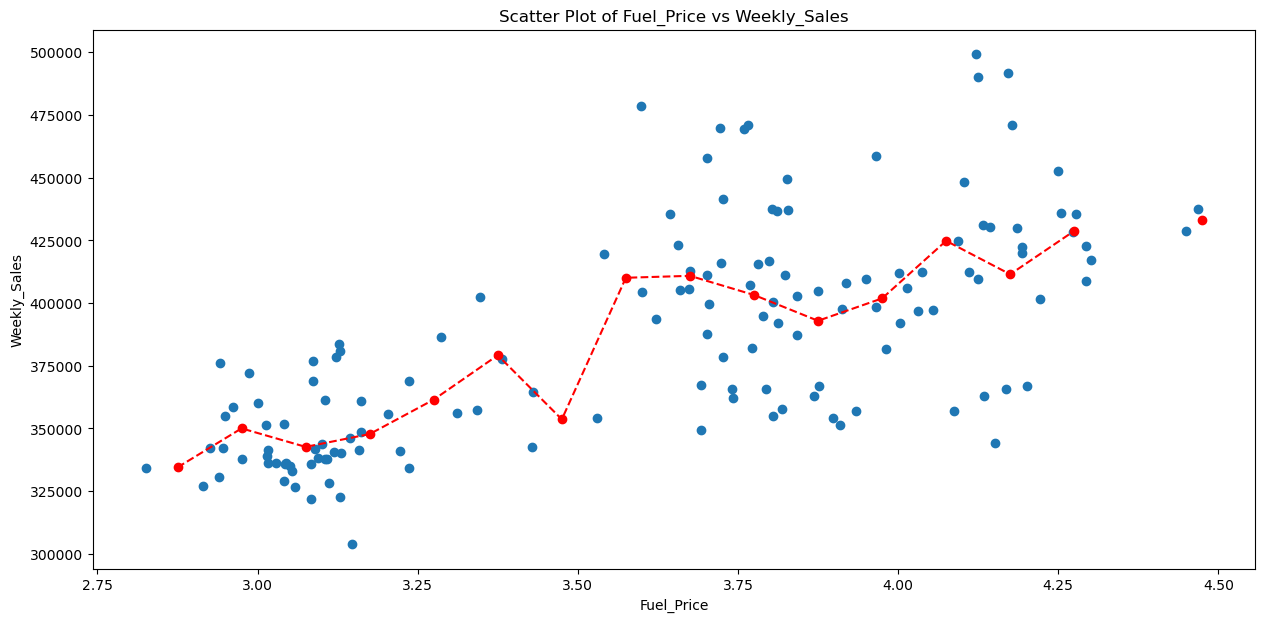

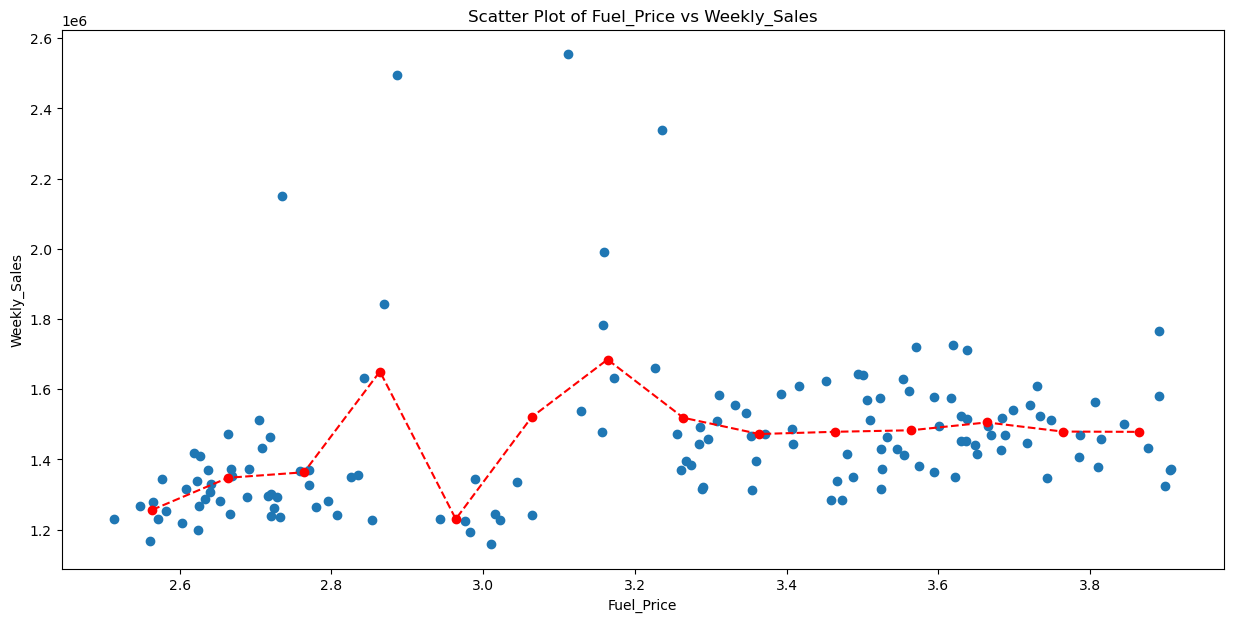

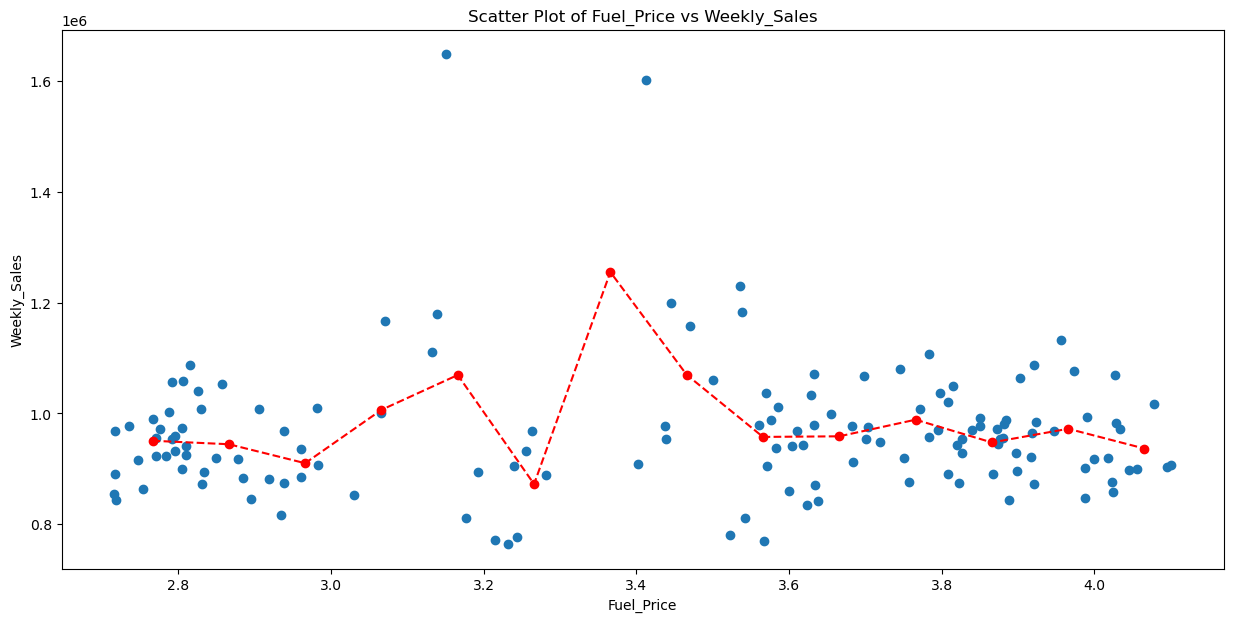

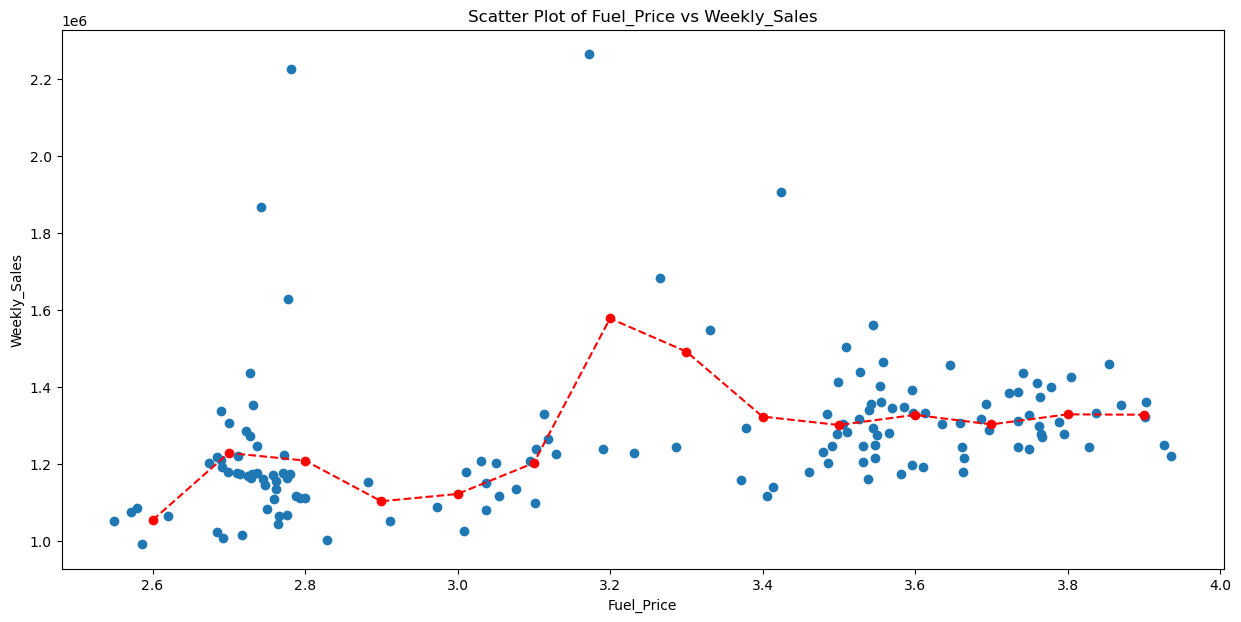

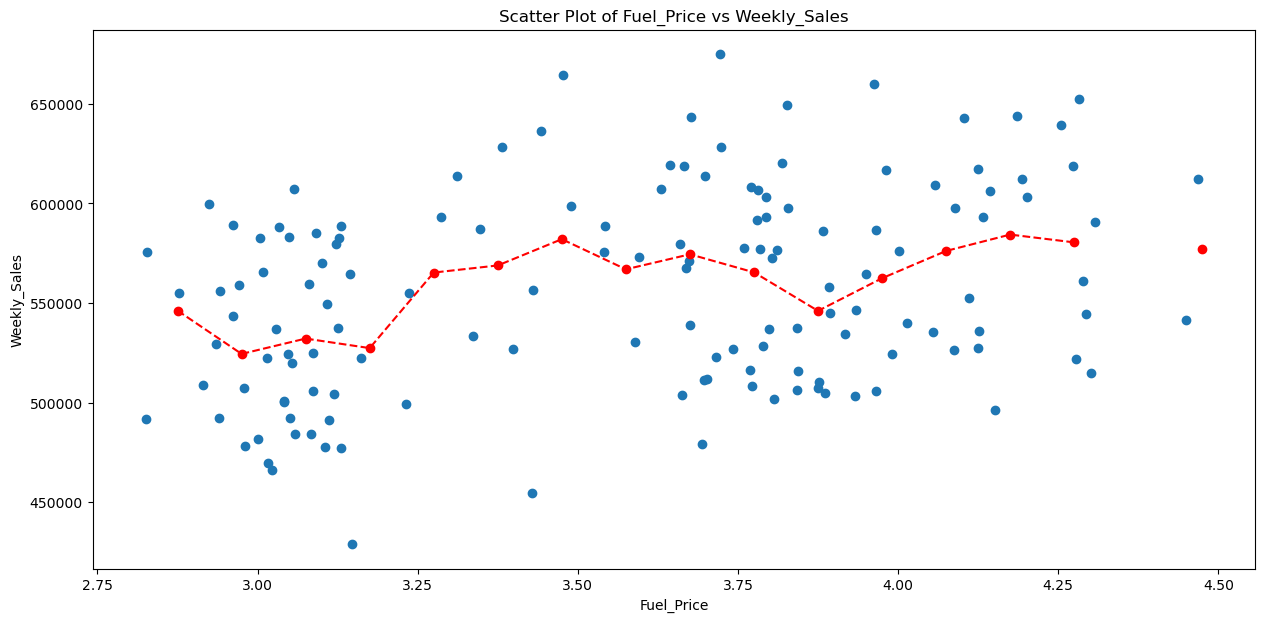

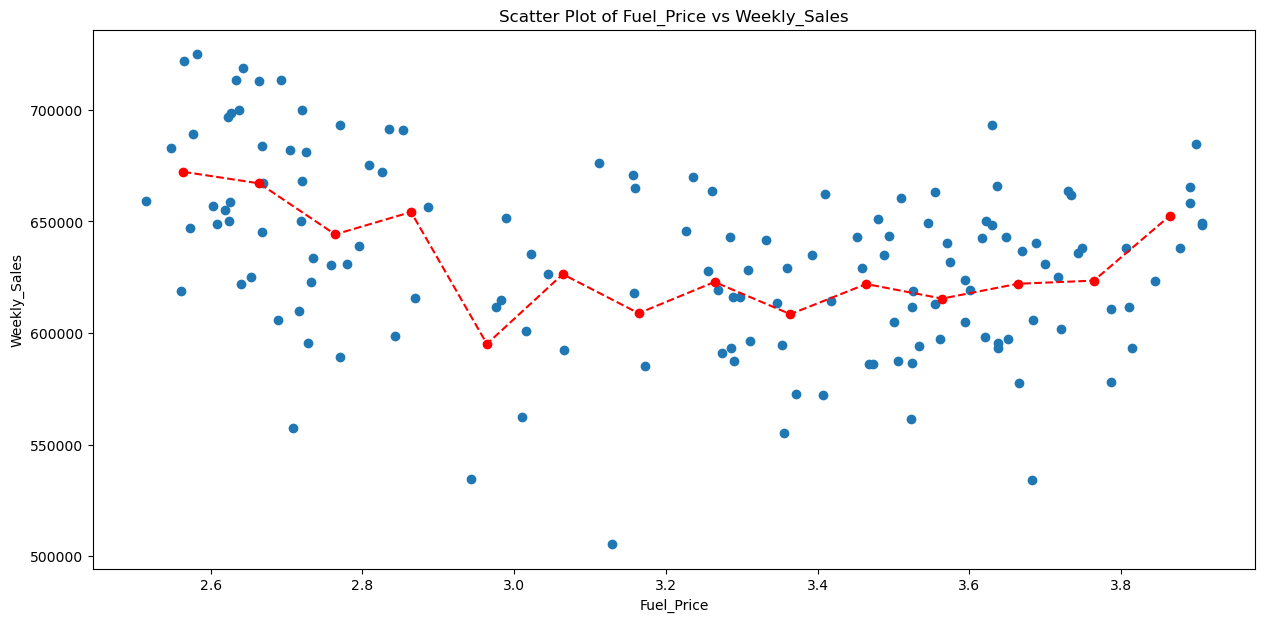

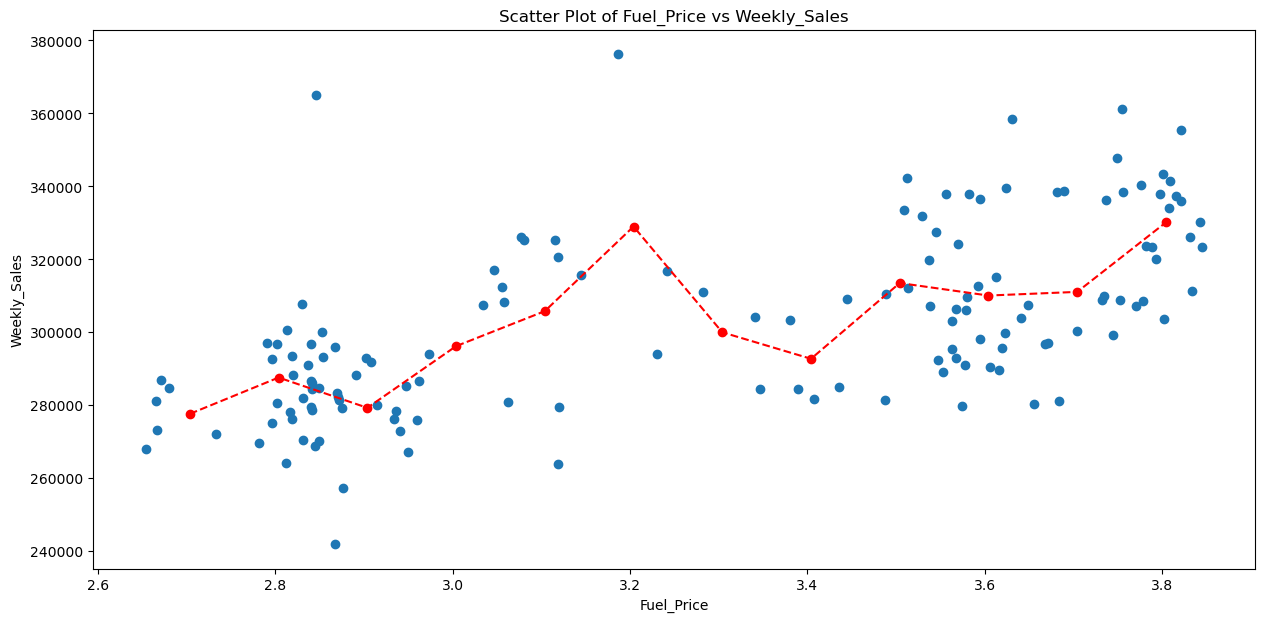

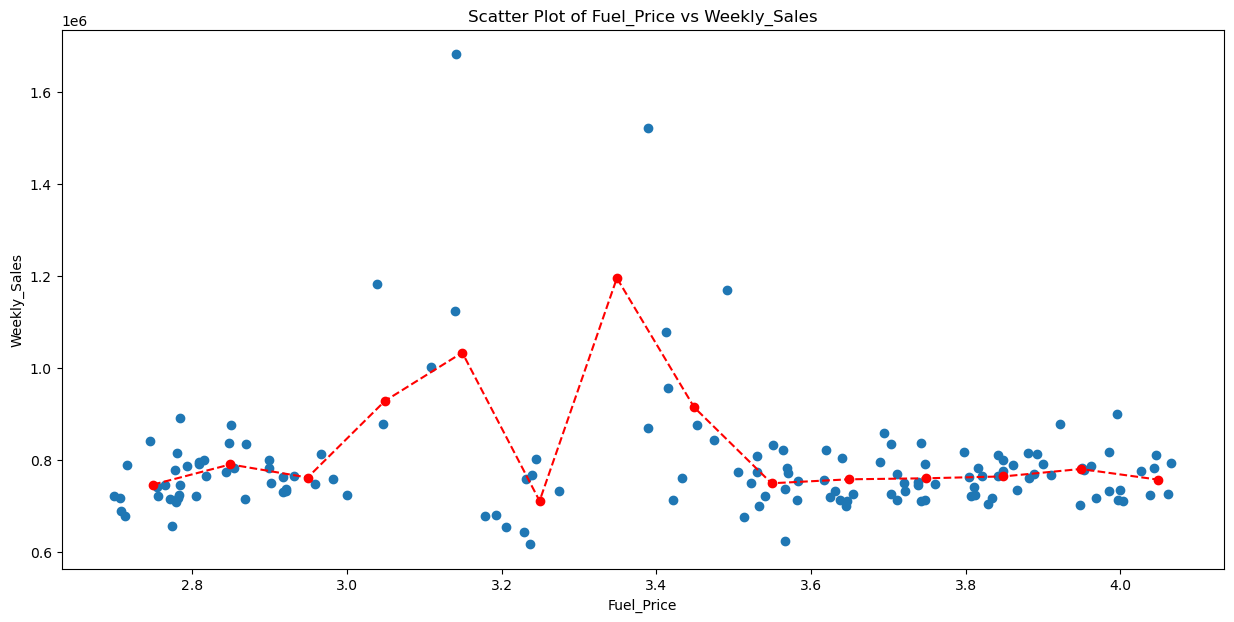

In [34]:
import numpy as np
for store_id in range(1, 46):
    c1 = c.loc[store_id][['Fuel_Price', 'Weekly_Sales']]
  

    plt.figure(figsize=(15, 7))
    # Define temperature bins
    temperature_bins = np.arange(c1['Fuel_Price'].min(), c1['Fuel_Price'].max(), 0.1)

    # Calculate average weekly sales for each temperature bin
    average_sales_per_bin = [c1[(c1['Fuel_Price'] >= temp) & (c1['Fuel_Price'] < temp + 0.1)]['Weekly_Sales'].mean() for temp in temperature_bins]
    plt.scatter(c1['Fuel_Price'], c1['Weekly_Sales'])
    plt.plot(temperature_bins + 0.05, average_sales_per_bin, color='r', linestyle='--', marker='o', label='Average Sales')

    plt.xlabel('Fuel_Price')
    plt.ylabel('Weekly_Sales')
    plt.title('Scatter Plot of Fuel_Price vs Weekly_Sales')
    plt.show()

### pattern of each store for fuel price vs weekly Sales

In [35]:
d = final_one[["Store", "Type", "Size", "Weekly_Sales"]].groupby("Store").agg({"Type": "first", "Size": "first", "Weekly_Sales": "sum"}).sort_values(by="Weekly_Sales", ascending=False)
d.head()

Type    Size  Weekly_Sales
Store                           
20       A  203742  3.013978e+08
4        A  205863  2.995440e+08
14       A  200898  2.889999e+08
13       A  219622  2.865177e+08
2        A  202307  2.753824e+08

#### Top three store in sales are 10, 4 and 14

# Forecasting selling Price without Department

In [36]:
final_two = final_one.groupby(['Store', 'Date']).agg({'IsHoliday_x': 'first', 'Temperature': 'first', 'Fuel_Price': 'first', 
'MarkDown1': 'first', 'MarkDown2': 'first', 'MarkDown3': 'first', 'MarkDown4': 'first', 'MarkDown5': 'first', 'CPI': 'first', 'Unemployment': 'first', 'IsHoliday_y': 'first', 'Type': 'first', 'Size': 'first','Weekly_Sales': 'sum'}).reset_index()
final_two.head(50)

Store       Date  IsHoliday_x  Temperature  Fuel_Price  MarkDown1  \
0       1 2010-01-10        False        71.89       2.603        NaN   
1       1 2010-02-04        False        62.27       2.719        NaN   
2       1 2010-02-07        False        80.91       2.669        NaN   
3       1 2010-02-19        False        39.93       2.514        NaN   
4       1 2010-02-26        False        46.63       2.561        NaN   
5       1 2010-03-09        False        81.21       2.577        NaN   
6       1 2010-03-12        False        49.27       2.708        NaN   
7       1 2010-03-19        False        54.58       2.720        NaN   
8       1 2010-03-26        False        51.45       2.732        NaN   
9       1 2010-04-06        False        80.69       2.705        NaN   
10      1 2010-04-16        False        66.32       2.808        NaN   
11      1 2010-04-23        False        64.84       2.795        NaN   
12      1 2010-04-30        False        67.41       2.780        NaN   
13      1 2010-05-02        False        42.31       2.572        NaN   
14      1 2010-05-03        False        46.50       2.625        NaN   
15      1 2010-05-11        False        58.74       2.689        NaN   
16      1 2010-05-14        False        74.78       2.854        NaN   
17      1 2010-05-21        False        76.44       2.826        NaN   
18      1 2010-05-28        False        80.44       2.759        NaN   
19      1 2010-06-08        False        87.16       2.627        NaN   
20      1 2010-06-18        False        84.11       2.637        NaN   
21      1 2010-06-25        False        84.34       2.653        NaN   
22      1 2010-07-05        False        72.55       2.835        NaN   
23      1 2010-07-16        False        83.15       2.623        NaN   
24      1 2010-07-23        False        83.36       2.608        NaN   
25      1 2010-07-30        False        81.84       2.640        NaN   
26      1 2010-08-10        False        63.93       2.633        NaN   
27      1 2010-08-13        False        87.00       2.692        NaN   
28      1 2010-08-20        False        86.65       2.664        NaN   
29      1 2010-08-27        False        85.22       2.619        NaN   
30      1 2010-09-04        False        65.86       2.770        NaN   
31      1 2010-09-07        False        80.48       2.642        NaN   
32      1 2010-09-17        False        82.11       2.582        NaN   
33      1 2010-09-24        False        80.94       2.624        NaN   
34      1 2010-10-09         True        78.69       2.565        NaN   
35      1 2010-10-12        False        46.33       2.843        NaN   
36      1 2010-10-15        False        67.18       2.720        NaN   
37      1 2010-10-22        False        69.86       2.725        NaN   
38      1 2010-10-29        False        69.64       2.716        NaN   
39      1 2010-11-06        False        80.43       2.668        NaN   
40      1 2010-11-19        False        51.41       2.771        NaN   
41      1 2010-11-26         True        64.52       2.735        NaN   
42      1 2010-12-02         True        38.51       2.548        NaN   
43      1 2010-12-03        False        57.79       2.667        NaN   
44      1 2010-12-11        False        59.61       2.728        NaN   
45      1 2010-12-17        False        49.84       2.869        NaN   
46      1 2010-12-24        False        52.33       2.886        NaN   
47      1 2010-12-31         True        48.43       2.943        NaN   
48      1 2011-01-04        False        59.17       3.524        NaN   
49      1 2011-01-07        False        85.55       3.524        NaN   

    MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0         NaN        NaN        NaN        NaN  211.671989         7.838   
1         NaN        NaN        NaN        NaN  210.820450         7.808   
2         NaN        NaN        NaN        NaN  211.

###  coverting to dtypes and filling NaN 

In [37]:

final_two["IsHoliday_x"] = final_two["IsHoliday_x"].astype(int)
final_two["IsHoliday_y"] = final_two["IsHoliday_y"].astype(int)
column_names = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
final_two[column_names] = final_two[column_names].fillna(0)
ordinal_mapping = {'A': 1, 'B': 2, 'C': 3}
final_two['Type'] = final_two['Type'].map(ordinal_mapping)

###  date column into new column for ML

In [38]:

final_two["Year"] = final_two.Date.dt.year
final_two["Month"] = final_two.Date.dt.month
final_two["Day"] = final_two.Date.dt.day

In [39]:
final_two.head()

Store       Date  IsHoliday_x  Temperature  Fuel_Price  MarkDown1  \
0      1 2010-01-10            0        71.89       2.603        0.0   
1      1 2010-02-04            0        62.27       2.719        0.0   
2      1 2010-02-07            0        80.91       2.669        0.0   
3      1 2010-02-19            0        39.93       2.514        0.0   
4      1 2010-02-26            0        46.63       2.561        0.0   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0        0.0        0.0        0.0        0.0  211.671989         7.838   
1        0.0        0.0        0.0        0.0  210.820450         7.808   
2        0.0        0.0        0.0        0.0  211.223533         7.787   
3        0.0        0.0        0.0        0.0  211.289143         8.106   
4        0.0        0.0        0.0        0.0  211.319643         8.106   

   IsHoliday_y  Type    Size  Weekly_Sales  Year  Month  Day  
0            0     1  151315    1453329.50  2010      1   10  
1            0     1  151315    1594968.28  2010      2    4  
2            0     1  151315    1492418.14  2010      2    7  
3            0     1  151315    1611968.17  2010      2   19  
4            0     1  151315    1409727.59  2010      2   26

In [40]:
final_two.dtypes

Store                    int64
Date            datetime64[ns]
IsHoliday_x              int32
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday_y              int32
Type                     int64
Size                     int64
Weekly_Sales           float64
Year                     int32
Month                    int32
Day                      int32
dtype: object

In [41]:
final_two.isnull().sum()

Store           0
Date            0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
Weekly_Sales    0
Year            0
Month           0
Day             0
dtype: int64

### Checking for Correlation

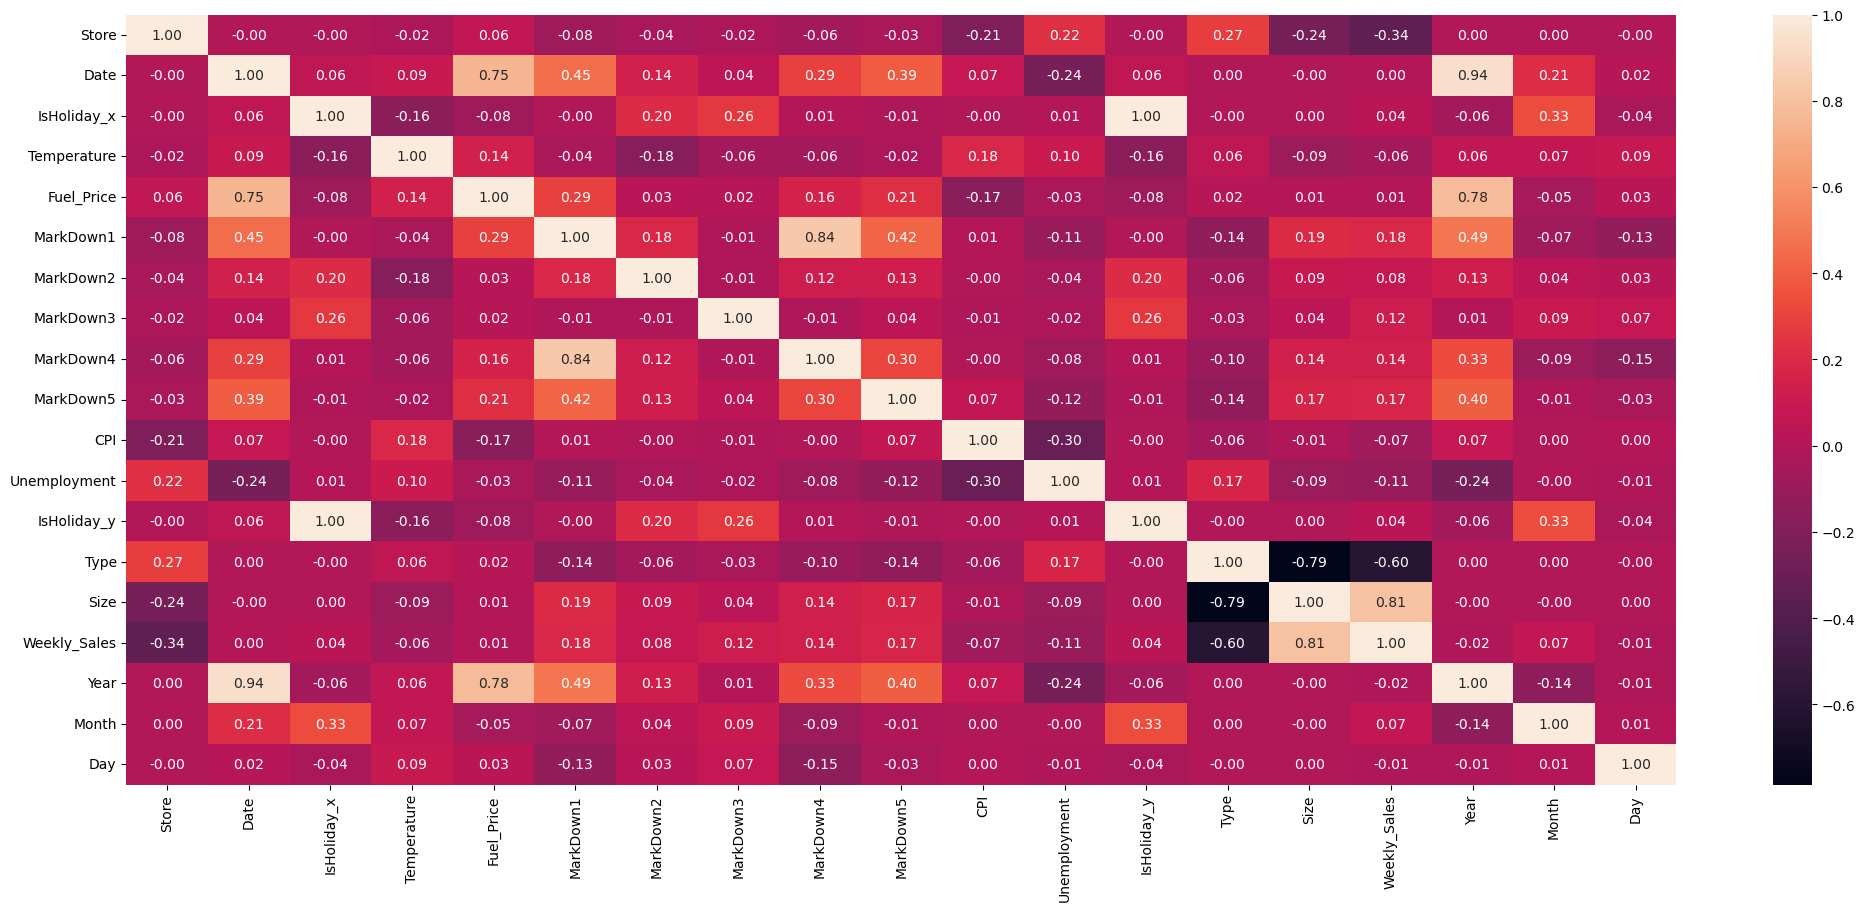

In [42]:
w = final_two.corr()
plt.figure(figsize=(25, 10))  
sns.heatmap(w, annot=True, fmt=".2f")
plt.show()

In [43]:
# negatively corr column are :
#             (type & (size == -0.79 and weekly sales == -0.60))
# Positive corr column are :
#              size and weekly_sales = 0.81
#              holiday_X & holiday_Y = 1
#              date & year = 0.9
#              fule_price & year = 0.78

In [44]:
# "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"
x = final_two.drop(columns=["IsHoliday_x", "Date", "Weekly_Sales"])
y = final_two["Weekly_Sales"]
x

Store  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0         1        71.89       2.603       0.00       0.00       0.00   
1         1        62.27       2.719       0.00       0.00       0.00   
2         1        80.91       2.669       0.00       0.00       0.00   
3         1        39.93       2.514       0.00       0.00       0.00   
4         1        46.63       2.561       0.00       0.00       0.00   
...     ...          ...         ...        ...        ...        ...   
6430     45        78.65       3.722   17868.84      50.60      57.66   
6431     45        56.47       3.969    2004.02       0.00       3.18   
6432     45        58.85       3.882    4018.91      58.08     100.00   
6433     45        61.24       3.889   12611.18       0.00      21.36   
6434     45        54.47       4.000    1956.28       0.00       7.89   

      MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday_y  Type  \
0          0.00       0.00  211.671989         7.838            0     1   
1          0.00       0.00  210.820450         7.808            0     1   
2          0.00       0.00  211.223533         7.787            0     1   
3          0.00       0.00  211.289143         8.106            0     1   
4          0.00       0.00  211.319643         8.106            0     1   
...         ...        ...         ...           ...          ...   ...   
6430    2593.93    1890.59  191.162613         8.684            0     2   
6431     437.73    1537.49  192.330854         8.667            0     2   
6432     211.94     858.33  192.308899         8.667            0     2   
6433    1667.39    2313.12  190.976417         8.567            0     2   
6434     599.32    3990.54  192.327265         8.667            0     2   

        Size  Year  Month  Day  
0     151315  2010      1   10  
1     151315  2010      2    4  
2     151315  2010      2    7  
3     151315  2010      2   19  
4     151315  2010      2   26  
...      ...   ...    ...  ...  
6430  118221  2012     10    8  
6431  118221  2012     10   19  
6432  118221  2012     10   26  
6433  118221  2012     11    5  
6434  118221  2012     12   10  

[6435 rows x 16 columns]

### Checking for outliers using box plot

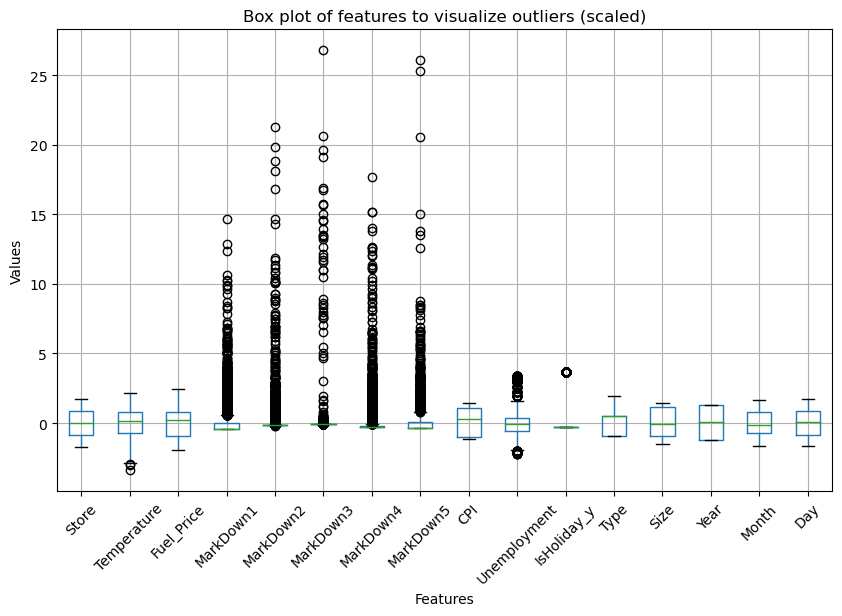

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()  

X_scaled = scaler.fit_transform(x)

X_scaled_df = pd.DataFrame(X_scaled, columns=x.columns)

plt.figure(figsize=(10, 6))
X_scaled_df.boxplot()
plt.xticks(rotation=45)
plt.title('Box plot of features to visualize outliers (scaled)')
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


### Checking with all Regressor algo's

In [47]:
def all_ml_algorithum(x_train, x_test, y_train, y_test, algo):
    
    model = algo().fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    accuracy = {'algo': algo.__name__,
                'R2' : r2,
                'MSE' : mse,
                'RMSE'  : rmse,
                'MAE' : mae,
               }
    print(accuracy)
    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

all_ml_algorithum(x_train, x_test, y_train, y_test, DecisionTreeRegressor)
all_ml_algorithum(x_train, x_test, y_train, y_test, ExtraTreesRegressor)
all_ml_algorithum(x_train, x_test, y_train, y_test, RandomForestRegressor)
all_ml_algorithum(x_train, x_test, y_train, y_test, AdaBoostRegressor)
all_ml_algorithum(x_train, x_test, y_train, y_test, GradientBoostingRegressor)
all_ml_algorithum(x_train, x_test, y_train, y_test, XGBRegressor)
all_ml_algorithum(x_train, x_test, y_train, y_test, LinearRegression)
all_ml_algorithum(x_train, x_test, y_train, y_test, Ridge)
all_ml_algorithum(x_train, x_test, y_train, y_test, Lasso)
all_ml_algorithum(x_train, x_test, y_train, y_test, KNeighborsRegressor)
all_ml_algorithum(x_train, x_test, y_train, y_test, SVR)
all_ml_algorithum(x_train, x_test, y_train, y_test, BaggingRegressor)


{'algo': 'DecisionTreeRegressor', 'R2': 0.9038455569481344, 'MSE': 29608387378.424534, 'RMSE': 172070.87893779276, 'MAE': 81709.92787101788}
{'algo': 'ExtraTreesRegressor', 'R2': 0.9573043439539654, 'MSE': 13147073431.698696, 'RMSE': 114660.68825756584, 'MAE': 58415.223761926936}
{'algo': 'RandomForestRegressor', 'R2': 0.9539637782149042, 'MSE': 14175718196.578306, 'RMSE': 119061.82510182812, 'MAE': 59380.05355050502}
{'algo': 'AdaBoostRegressor', 'R2': 0.7568640101371464, 'MSE': 74867726805.02147, 'RMSE': 273619.6754713035, 'MAE': 229855.63586930596}
{'algo': 'GradientBoostingRegressor', 'R2': 0.950116528247225, 'MSE': 15360383863.283184, 'RMSE': 123937.01571073585, 'MAE': 85711.64679404823}
{'algo': 'XGBRegressor', 'R2': 0.9807702947947453, 'MSE': 5921313075.288415, 'RMSE': 76950.06871529366, 'MAE': 45716.38643065268}
{'algo': 'LinearRegression', 'R2': 0.7115113957905543, 'MSE': 88832944964.24765, 'RMSE': 298048.5614195238, 'MAE': 229285.99725601677}
{'algo': 'Ridge', 'R2': 0.7115144

### Hyper tuning best algo which is xgb_regressor

In [48]:
# Initialize XGBRegressor
xgb_regressor = XGBRegressor()

# Define hyperparameters grid for grid search
param_grid = {
    'n_estimators': [300, 500, 700, 1000],  # Number of trees in the ensemble
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate (shrinkage)
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.3]  # Minimum loss reduction required to make a further partition on a leaf node
}

# Initialize GridSearchCV with XGBRegressor and parameters grid
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Perform grid search
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

Best parameters found: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 1000}


In [49]:
# Check the structure of cv_results_
cv_results_df = pd.DataFrame(grid_search.cv_results_)
print(cv_results_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_colsample_bytree', 'param_gamma', 'param_learning_rate',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [50]:
# Display the top 10 results with relevant columns
pd.DataFrame(grid_search.cv_results_)[["param_colsample_bytree", "param_gamma", 
                                       "param_learning_rate", "param_max_depth", "param_n_estimators",
                                       "mean_test_score", "std_test_score", "rank_test_score"]].sort_values(by='rank_test_score', ascending=True).head(50)


param_colsample_bytree param_gamma param_learning_rate param_max_depth  \
139                    0.8           0                 0.2               5   
211                    0.8         0.3                 0.2               5   
175                    0.8         0.1                 0.2               5   
174                    0.8         0.1                 0.2               5   
138                    0.8           0                 0.2               5   
210                    0.8         0.3                 0.2               5   
137                    0.8           0                 0.2               5   
209                    0.8         0.3                 0.2               5   
173                    0.8         0.1                 0.2               5   
127                    0.8           0                 0.1               5   
199                    0.8         0.3                 0.1               5   
163                    0.8         0.1                 0.1               5   
235                    1.0           0                 0.1               5   
271                    1.0         0.1                 0.1               5   
307                    1.0         0.3                 0.1               5   
172                    0.8         0.1                 0.2               5   
208                    0.8         0.3                 0.2               5   
136                    0.8           0                 0.2               5   
198                    0.8         0.3                 0.1               5   
126                    0.8           0                 0.1               5   
162                    0.8         0.1                 0.1               5   
270                    1.0         0.1                 0.1               5   
306                    1.0         0.3                 0.1               5   
234                    1.0           0                 0.1               5   
247                    1.0           0                 0.2               5   
283                    1.0         0.1                 0.2               5   
319                    1.0         0.3                 0.2               5   
282                    1.0         0.1                 0.2               5   
318                    1.0         0.3                 0.2               5   
246                    1.0           0                 0.2               5   
245                    1.0           0                 0.2               5   
281                    1.0         0.1                 0.2               5   
317                    1.0         0.3                 0.2               5   
161                    0.8         0.1                 0.1               5   
125                    0.8           0                 0.1               5   
197                    0.8         0.3                 0.1               5   
269                    1.0         0.1                 0.1               5   
233                    1.0           0                 0.1               5   
305                    1.0         0.3                 0.1               5   
316                    1.0         0.3                 0.2               5   
280                    1.0         0.1                 0.2               5   
244                    1.0           0                 0.2               5   
91                     0.6         0.3                 0.1               5   
55                     0.6         0.1                 0.1               5   
19                     0.6           0                 0.1               5   
54                     0.6         0.1                 0.1               5   
18                     0.6           0                 0.1               5   
90                     0.6         0.3                 0.1               5   
232                    1.0           0                 0.1               5   
268                    1.0         0.1                 0.1               5   

    param_n_estimators  m

In [51]:
best_xgb_regressor = XGBRegressor(**best_params)

# Train the model with the best parameters
best_xgb_regressor.fit(x_train, y_train,
                       eval_set=[(x_train, y_train), (x_test, y_test)],
                       verbose=10
                      )


[0]	validation_0-rmse:470655.78747	validation_1-rmse:460442.12030
[10]	validation_0-rmse:145168.78377	validation_1-rmse:145824.97103
[20]	validation_0-rmse:95168.93674	validation_1-rmse:102076.92165
[30]	validation_0-rmse:78252.46498	validation_1-rmse:88840.19612
[40]	validation_0-rmse:70298.78744	validation_1-rmse:82452.74014
[50]	validation_0-rmse:64995.80144	validation_1-rmse:77642.43865
[60]	validation_0-rmse:60471.31587	validation_1-rmse:74322.08069
[70]	validation_0-rmse:56102.68802	validation_1-rmse:71938.04622
[80]	validation_0-rmse:53079.84604	validation_1-rmse:70654.94875
[90]	validation_0-rmse:50406.10303	validation_1-rmse:69514.34260
[100]	validation_0-rmse:48178.86881	validation_1-rmse:68619.95228
[110]	validation_0-rmse:45698.49499	validation_1-rmse:67271.28682
[120]	validation_0-rmse:44609.93054	validation_1-rmse:66959.73624
[130]	validation_0-rmse:42694.27758	validation_1-rmse:66577.64581
[140]	validation_0-rmse:41457.54359	validation_1-rmse:66232.98790
[150]	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [52]:
# Make predictions
y_pred = best_xgb_regressor.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
accuracy = {'R2' : r2,
            'MSE' : mse,
            'RMSE'  : rmse,
            'MAE' : mae,
               }
print(accuracy)

{'R2': 0.987570447850045, 'MSE': 3827373788.6213617, 'RMSE': 61865.772351287764, 'MAE': 40707.37105089355}


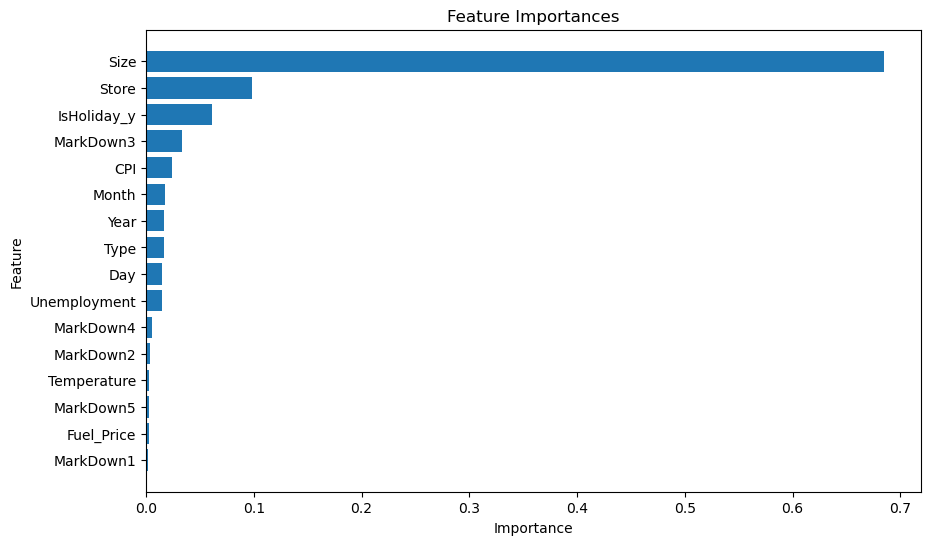

In [53]:
feature_importances = best_xgb_regressor.feature_importances_

column_names = x_train.columns

feature_importance_df = pd.DataFrame({'Feature': column_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

# Forecasting selling Price with Department

In [54]:
final_one.head()

Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-05-02      24924.50        False        42.31       2.572   
1      1     2 2010-05-02      50605.27        False        42.31       2.572   
2      1     3 2010-05-02      13740.12        False        42.31       2.572   
3      1     4 2010-05-02      39954.04        False        42.31       2.572   
4      1     5 2010-05-02      32229.38        False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.096358   
2        NaN        NaN        NaN        NaN        NaN  211.096358   
3        NaN        NaN        NaN        NaN        NaN  211.096358   
4        NaN        NaN        NaN        NaN        NaN  211.096358   

   Unemployment  IsHoliday_y Type    Size  
0         8.106        False    A  151315  
1         8.106        False    A  151315  
2         8.106        False    A  151315  
3         8.106        False    A  151315  
4         8.106        False    A  151315

In [55]:
final_one.shape

(421570, 17)

In [56]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(final_one["Dept"].value_counts())

Dept
1     6435
16    6435
92    6435
38    6435
40    6435
2     6435
82    6435
46    6435
95    6435
81    6435
79    6435
21    6435
90    6435
91    6435
14    6435
4     6435
13    6435
3     6435
10    6435
8     6435
7     6435
67    6435
11    6434
74    6430
17    6412
12    6409
42    6401
87    6391
25    6354
9     6354
5     6347
97    6278
52    6268
28    6124
59    6106
31    6067
85    6055
72    6046
20    6032
6     5986
32    5956
93    5913
83    5908
80    5891
56    5872
98    5836
23    5774
60    5772
26    5739
94    5685
27    5619
55    5596
22    5543
44    5471
24    5406
41    5393
33    5390
34    5326
71    5309
29    5308
35    5297
36    5295
30    5291
18    5029
96    4854
54    4767
49    4482
58    4390
19    4119
37    2577
45    1936
48    1742
50    1562
51    1394
99     862
47     646
78     235
77     150
65     143
39      16
43      12
Name: count, dtype: int64


In [57]:
final_one["IsHoliday_x"] = final_one["IsHoliday_x"].astype(int)
final_one["IsHoliday_y"] = final_one["IsHoliday_y"].astype(int)
column_names = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
final_one[column_names] = final_one[column_names].fillna(0)
ordinal_mapping = {'A': 1, 'B': 2, 'C': 3}
final_one['Type'] = final_one['Type'].map(ordinal_mapping)

final_one["Year"] = final_one.Date.dt.year
final_one["Month"] = final_one.Date.dt.month
final_one["Day"] = final_one.Date.dt.day

In [58]:
final_one.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday_x              int32
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday_y              int32
Type                     int64
Size                     int64
Year                     int32
Month                    int32
Day                      int32
dtype: object

In [59]:
final_one.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday_x              int32
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday_y              int32
Type                     int64
Size                     int64
Year                     int32
Month                    int32
Day                      int32
dtype: object

In [60]:
final_one.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
Year            0
Month           0
Day             0
dtype: int64

In [61]:
final_one.shape

(421570, 20)

In [62]:
final_one.head()

Store  Dept       Date  Weekly_Sales  IsHoliday_x  Temperature  Fuel_Price  \
0      1     1 2010-05-02      24924.50            0        42.31       2.572   
1      1     2 2010-05-02      50605.27            0        42.31       2.572   
2      1     3 2010-05-02      13740.12            0        42.31       2.572   
3      1     4 2010-05-02      39954.04            0        42.31       2.572   
4      1     5 2010-05-02      32229.38            0        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.096358   
2        0.0        0.0        0.0        0.0        0.0  211.096358   
3        0.0        0.0        0.0        0.0        0.0  211.096358   
4        0.0        0.0        0.0        0.0        0.0  211.096358   

   Unemployment  IsHoliday_y  Type    Size  Year  Month  Day  
0         8.106            0     1  151315  2010      5    2  
1         8.106            0     1  151315  2010      5    2  
2         8.106            0     1  151315  2010      5    2  
3         8.106            0     1  151315  2010      5    2  
4         8.106            0     1  151315  2010      5    2

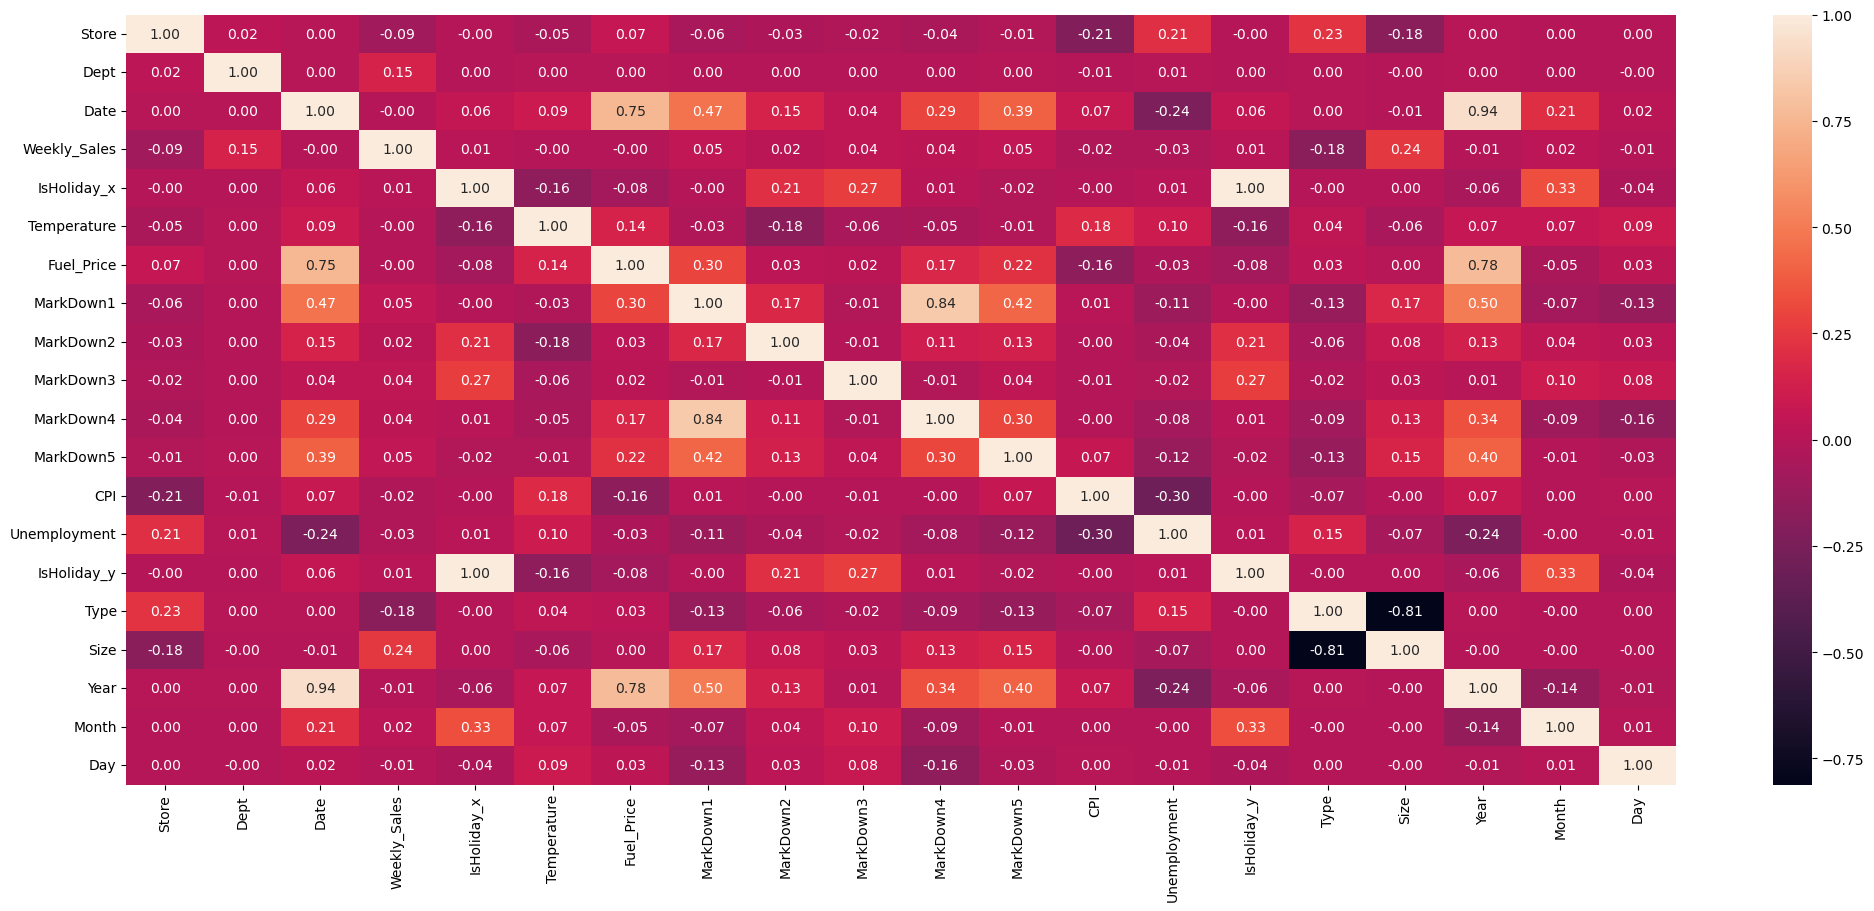

In [63]:
w = final_one.corr()
plt.figure(figsize=(25, 10))  
sns.heatmap(w, annot=True, fmt=".2f")
plt.show()

In [64]:
x1 = final_one.drop(columns=["IsHoliday_x", "Date", "Weekly_Sales"])
y1 = final_one["Weekly_Sales"]
x1

Store  Dept  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0           1     1        42.31       2.572       0.00       0.00        0.0   
1           1     2        42.31       2.572       0.00       0.00        0.0   
2           1     3        42.31       2.572       0.00       0.00        0.0   
3           1     4        42.31       2.572       0.00       0.00        0.0   
4           1     5        42.31       2.572       0.00       0.00        0.0   
...       ...   ...          ...         ...        ...        ...        ...   
421565     45    93        58.85       3.882    4018.91      58.08      100.0   
421566     45    94        58.85       3.882    4018.91      58.08      100.0   
421567     45    95        58.85       3.882    4018.91      58.08      100.0   
421568     45    97        58.85       3.882    4018.91      58.08      100.0   
421569     45    98        58.85       3.882    4018.91      58.08      100.0   

        MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday_y  Type  \
0            0.00       0.00  211.096358         8.106            0     1   
1            0.00       0.00  211.096358         8.106            0     1   
2            0.00       0.00  211.096358         8.106            0     1   
3            0.00       0.00  211.096358         8.106            0     1   
4            0.00       0.00  211.096358         8.106            0     1   
...           ...        ...         ...           ...          ...   ...   
421565     211.94     858.33  192.308899         8.667            0     2   
421566     211.94     858.33  192.308899         8.667            0     2   
421567     211.94     858.33  192.308899         8.667            0     2   
421568     211.94     858.33  192.308899         8.667            0     2   
421569     211.94     858.33  192.308899         8.667            0     2   

          Size  Year  Month  Day  
0       151315  2010      5    2  
1       151315  2010      5    2  
2       151315  2010      5    2  
3       151315  2010      5    2  
4       151315  2010      5    2  
...        ...   ...    ...  ...  
421565  118221  2012     10   26  
421566  118221  2012     10   26  
421567  118221  2012     10   26  
421568  118221  2012     10   26  
421569  118221  2012     10   26  

[421570 rows x 17 columns]

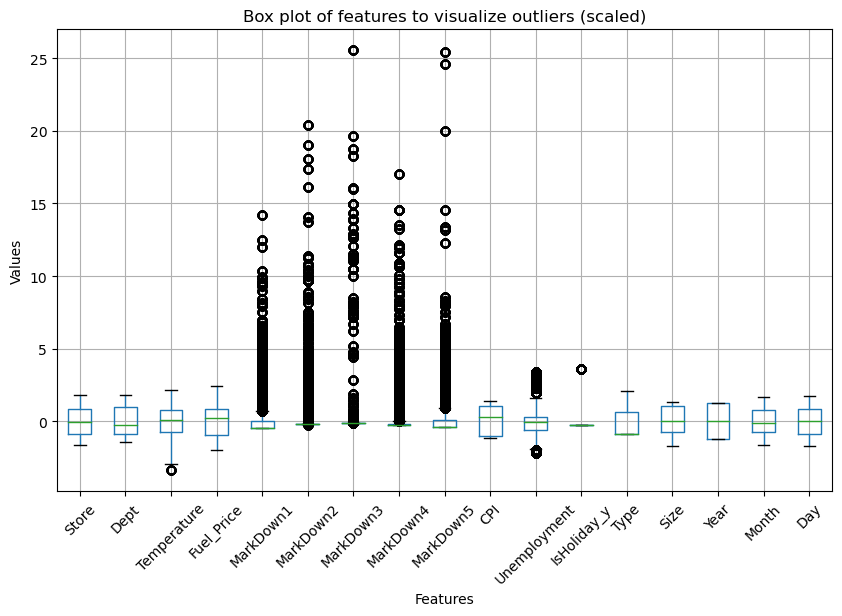

In [65]:

X_scaled = scaler.fit_transform(x1)

X_scaled_df = pd.DataFrame(X_scaled, columns=x1.columns)

plt.figure(figsize=(10, 6))
X_scaled_df.boxplot()
plt.xticks(rotation=45)
plt.title('Box plot of features to visualize outliers (scaled)')
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()

In [66]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=40)

all_ml_algorithum(x1_train, x1_test, y1_train, y1_test, DecisionTreeRegressor)
all_ml_algorithum(x1_train, x1_test, y1_train, y1_test, ExtraTreesRegressor)
all_ml_algorithum(x1_train, x1_test, y1_tain, y1_test, RandomForestRegressor)
all_ml_algorithum(x1_train, x1_test, y1_train, y1_test, GradientBoostingRegressor)
all_ml_algorithum(x1_train, x1_test, y1_train, y1_test, XGBRegressor)

{'algo': 'DecisionTreeRegressor', 'R2': 0.9331958271140237, 'MSE': 35201053.16293973, 'RMSE': 5933.047544301304, 'MAE': 2051.964551675878}
{'algo': 'ExtraTreesRegressor', 'R2': 0.9604985433713106, 'MSE': 20814461.35368513, 'RMSE': 4562.286855699138, 'MAE': 1560.5773426666983}
{'algo': 'RandomForestRegressor', 'R2': 0.9627062220122122, 'MSE': 19651171.54935346, 'RMSE': 4432.9641944587665, 'MAE': 1539.6317969554284}
{'algo': 'GradientBoostingRegressor', 'R2': 0.7251068526711217, 'MSE': 144849159.49439126, 'RMSE': 12035.329637961366, 'MAE': 6873.100189930639}
{'algo': 'XGBRegressor', 'R2': 0.9312364504619778, 'MSE': 36233505.459185, 'RMSE': 6019.427336481852, 'MAE': 3171.470505218705}


In [75]:
best_RandomForestRegressor = RandomForestRegressor(n_estimators=200)

In [76]:
best_RandomForestRegressor.fit(x1_train, y1_train)

RandomForestRegressor(n_estimators=200)

In [77]:
y1_pred = best_RandomForestRegressor.predict(x1_test)
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y1_test, y1_pred)
mae = mean_absolute_error(y1_test, y1_pred)
accuracy = {'R2' : r2,
            'MSE' : mse,
            'RMSE'  : rmse,
            'MAE' : mae,
               }
print(accuracy)

{'R2': 0.9632382229472294, 'MSE': 19370844.851375557, 'RMSE': 4401.232196939348, 'MAE': 1535.4645383328984}


In [78]:
best_RandomForestRegressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [88]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    d = final_one[["Dept", "Weekly_Sales"]].groupby("Dept").agg({ "Weekly_Sales": "sum"}).sort_values(by="Weekly_Sales", ascending=False)
    print(d)

      Weekly_Sales
Dept              
92    4.839433e+08
95    4.493202e+08
38    3.931181e+08
72    3.057252e+08
90    2.910685e+08
40    2.889360e+08
2     2.806112e+08
91    2.167817e+08
13    1.973216e+08
8     1.942808e+08
94    1.899125e+08
4     1.671467e+08
93    1.596987e+08
7     1.554776e+08
79    1.413965e+08
23    1.381803e+08
5     1.356074e+08
9     1.283933e+08
46    1.283444e+08
1     1.236388e+08
10    1.178974e+08
81    9.955203e+07
82    9.954708e+07
14    9.569467e+07
11    9.332928e+07
16    9.167068e+07
97    8.949651e+07
74    8.878199e+07
87    8.576008e+07
34    8.322363e+07
3     7.589245e+07
96    7.383392e+07
80    7.177406e+07
17    6.531982e+07
55    5.997046e+07
22    5.972311e+07
25    5.711122e+07
67    4.788078e+07
26    4.390001e+07
32    4.069896e+07
98    3.982892e+07
18    3.689749e+07
49    3.657290e+07
33    3.488397e+07
24    3.434759e+07
20    3.334965e+07
42    3.321929e+07
21    3.206465e+07
71    3.038302e+07
29    3.000960e+07
6     2.8420

In [117]:
f = final_one.groupby(['Date']).agg({'IsHoliday_x': 'first', 'Temperature': 'first', 'Fuel_Price': 'first', 
'MarkDown1': 'first', 'MarkDown2': 'first', 'MarkDown3': 'first', 'MarkDown4': 'first', 'MarkDown5': 'first', 'CPI': 'first', 'Unemployment': 'first', 'IsHoliday_y': 'first', 'Type': 'first', 'Size': 'first','Weekly_Sales': 'sum'}).reset_index()

In [118]:
f["IsHoliday_x"] = f["IsHoliday_x"].astype(int)
f["IsHoliday_y"] = f["IsHoliday_y"].astype(int)
column_names = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
f[column_names] = f[column_names].fillna(0)
ordinal_mapping = {'A': 1, 'B': 2, 'C': 3}
f['Type'] = f['Type'].map(ordinal_mapping)

f["Year"] = f.Date.dt.year
f["Month"] = f.Date.dt.month
f["Day"] = f.Date.dt.day

In [110]:
q = f[f["IsHoliday_y"] == 1]
q["Month"].value_counts()

Month
11    3
12    3
10    2
9     1
7     1
Name: count, dtype: int64

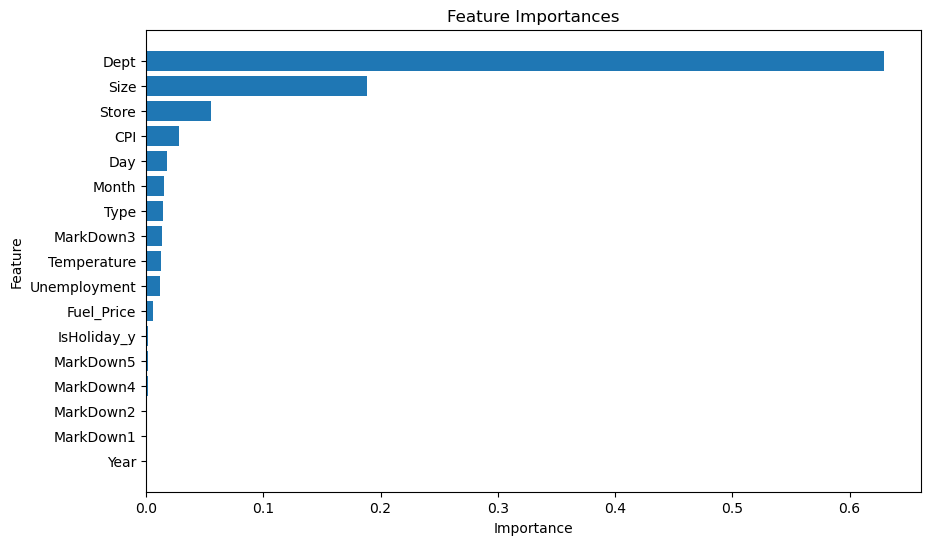

In [80]:
feature_importances = best_RandomForestRegressor.feature_importances_

column_names = x1_train.columns

feature_importance_df = pd.DataFrame({'Feature': column_names, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [79]:
## saving both model
import pickle
with open('model_without_Department', 'wb') as file:
    pickle.dump(best_xgb_regressor, file)
with open('model_with_Department', 'wb') as file:
    pickle.dump(best_RandomForestRegressor, file)

# Observation
    1. At holiday which is falls in month of Oct, Nov, Dec we can see large increase in weekely sales.
    2. Store Size also have large impact in sales.
    3. Particular department always have very high sales when compared to other.
    4. CPI & Markdown 3 column also small impact on sales.
    5. Can a pattern in sales along time Serious data.